<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px;
    border: 2px solid #2e7d32;
    padding: 20px;
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);
        font-weight: bold;
        margin-bottom: 10px;
        font-size: 36px;
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🏦 Bank Marketing 💵
    </h1>
</div>


# 📂 Overview

* **Background** <br>
  In a highly competitive financial environment, banks strive to optimize marketing campaigns for better customer acquisition. One of the key strategies involves **predicting which clients will subscribe to a term deposit** based on past interactions and customer attributes.

* **Goal of the Project** <br>
  Using historical marketing data, we aim to build a predictive model that identifies the likelihood of a customer subscribing to a term deposit, helping the bank to **target potential clients more effectively** and **optimize marketing efforts**.

**Key Features**

**Target Variable**

* `y`: *whether the client has subscribed to a term deposit (binary: 'yes','no')*

**Customer & Contact Attributes** <br>

* `age`: Age of the client.
* `job`: Type of job (e.g., admin, technician, blue-collar, etc.)
* `marital`: Marital status (married, single, divorced).
* `education`: Client's education level.
* `default`: Whether the client has credit in default.
* `balance`: Average yearly balance in euros.
* `housing`: Whether the client has a housing loan.
* `loan`: Whether the client has a personal loan.

**Contact Communication Details** <br>

* `contact`: Contact communication type (cellular or telephone).
* `day`: Last contact day of the month.
* `month`: Last contact month of the year.
* `duration`: Last contact duration in seconds (note: this feature highly affects the target and should be handled carefully in modeling).

**Campaign-Related Attributes** <br>

* `campaign`: Number of contacts performed during this campaign.
* `pdays`: Number of days since the client was last contacted from a previous campaign.
* `previous`: Number of contacts performed before this campaign.
* `poutcome`: Outcome of the previous marketing campaign.

**Files Provided**

* `train.csv`: The train dataset.
* `test.csv`: The test dataset (no target).
* `bank_full.csv`: The original dataset.
* `sample_submission.csv`: Template file for submitting predictions.

(Source: [Kaggle Dataset s5e8](https://www.kaggle.com/competitions/playground-series-s5e8)) <br>
(Source: [Kaggle Dataset – Bank Marketing Dataset Full](https://www.kaggle.com/datasets/sushant097/bank-marketing-dataset-full/data))

**Project Objective**

The primary objective of this notebook is to **perform EDA and build predictive models** to classify whether a client will subscribe to a term deposit.

Key components of the approach include:

* **Exploratory Data Analysis (EDA):** Visualize distributions and examine relationships between variables and the target.
* **Feature Engineering:** Encode categorical variables, deal with imbalances, and preprocess durations and campaign-related features.
* **Modeling:** Train multiple classification models (e.g., Logistic Regression, Random Forest, XGBoost) to compare performance.
* **Evaluation Framework:**

  * Metrics: Accuracy, F1-score, ROC-AUC.
  * Tools: Confusion matrix, ROC Curve.
  * Strategy: Cross-validation and hyperparameter tuning.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Import Libraries</span>

<div style="
    border-radius: 15px;
    border: 2px solid #2e7d32;
    padding: 20px;
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);
        font-weight: bold;
        margin-bottom: 10px;
        font-size: 36px;
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Import Libraries
    </h1>
</div>


In [1]:
# Core data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Statistical functions
from scipy.stats import skew

# Display utilities for Jupyter notebooks
from IPython.display import display

# Machine learning preprocessing and modeling
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Metrics
from sklearn.metrics import (roc_curve, roc_auc_score, classification_report, confusion_matrix,
                             precision_recall_curve, auc)

# Statistical
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, probplot
from scipy.stats import mannwhitneyu
from scipy.stats import levene
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import kruskal
from scipy.stats import anderson
from scipy.stats import normaltest
import scikit_posthocs as sp

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 500) # To display all the columns of dataframe
pd.set_option("max_colwidth", None) # To set the width of the column to maximum

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Load Data</span>

<div style="
    border-radius: 15px;
    border: 2px solid #2e7d32;
    padding: 20px;
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);
        font-weight: bold;
        margin-bottom: 10px;
        font-size: 36px;
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Load Data
    </h1>
</div>

In [2]:
# Load the datasets
df_train = pd.read_csv("train.csv")
df_origin = pd.read_csv("bank-full.csv", sep=";")
df_test = pd.read_csv("test.csv")

# Verify shapes
print("Train Data Shape:", df_train.shape)
print("\nOrigin Data Shape:", df_origin.shape)
print("\nTest Data Shape:", df_test.shape)

Train Data Shape: (750000, 18)

Origin Data Shape: (45211, 17)

Test Data Shape: (250000, 17)


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px;
    border: 2px solid #2e7d32;
    padding: 20px;
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);
        font-weight: bold;
        margin-bottom: 10px;
        font-size: 36px;
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preview and Info
    </h1>
</div>

In [3]:
# Display few rows of each dataset
print("Train Data Preview:")
display(df_train.head())

print("\nOrigin Data Preview:")
display(df_origin.head())

print("\nTest Data Preview:")
display(df_test.head())

Train Data Preview:


id  age          job  marital  education default  balance housing loan  \
0   0   42   technician  married  secondary      no        7      no   no   
1   1   38  blue-collar  married  secondary      no      514      no   no   
2   2   36  blue-collar  married  secondary      no      602     yes   no   
3   3   27      student   single  secondary      no       34     yes   no   
4   4   26   technician  married  secondary      no      889     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  y  
0  cellular   25   aug       117         3     -1         0  unknown  0  
1   unknown   18   jun       185         1     -1         0  unknown  0  
2   unknown   14   may       111         2     -1         0  unknown  0  
3   unknown   28   may        10         2     -1         0  unknown  0  
4  cellular    3   feb       902         1     -1         0  unknown  1


Origin Data Preview:


age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no


Test Data Preview:


id  age            job  marital  education default  balance housing  \
0  750000   32    blue-collar  married  secondary      no     1397     yes   
1  750001   44     management  married   tertiary      no       23     yes   
2  750002   36  self-employed  married    primary      no       46     yes   
3  750003   58    blue-collar  married  secondary      no    -1380     yes   
4  750004   28     technician   single  secondary      no     1950     yes   

  loan   contact  day month  duration  campaign  pdays  previous poutcome  
0   no   unknown   21   may       224         1     -1         0  unknown  
1   no  cellular    3   apr       586         2     -1         0  unknown  
2  yes  cellular   13   may       111         2     -1         0  unknown  
3  yes   unknown   29   may       125         1     -1         0  unknown  
4   no  cellular   22   jul       181         1     -1         0  unknown

In [4]:
# Display information about the DataFrames
print("Train Data Info:")
df_train.info()

print("\nOrigin Data Info:")
df_origin.info()

print("\nTest Data Info:")
df_test.info()

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB

Origin Data Info:
<

## Insights from Initial Data Exploration

**Dataset Size and Structure**  
   - The **training dataset** contains **750000** samples with 18 columns, including the target variable `y`.
   - The **original dataset** has **45211** samples and 17 columns, similar in structure but smaller in size.
   - The **test dataset** includes **250000** samples with 17 columns (without the target), ready for prediction.

**Feature Overview**
* The dataset includes all relevant attributes for predicting customer response to marketing campaigns:
  * **Numerical features:** `age`, `balance`, `day`, `duration`, `campaign`, `pdays`, `previous`.
  * **Categorical features:** `job`, `marital`, `education`, `default`, `housing`, `loan`, `contact`, `month`, `poutcome`.
* The target variable is categorical, representing whether the client has subscribed to a term deposit (`y`: `'yes'` or `'no'`).

**Data Consistency and Completeness**  
   - The datasets have **no missing values**, which simplifies preprocessing and modeling.
   - Data types are appropriate: numerical features are float64 and int64, and categorical features are objects (strings).
   - The column `id` is not meaningful for analysis. So this column is not really a part of the information we should care about. We can drop this column for both train and test data.

**Differences Between Datasets**  
   - The training data has an additional `id` column, which uniquely identifies each sample.  
   - The original dataset excludes the `id` column but contains the same features and target.

In [5]:
df_train.drop("id", axis=1, inplace=True)
list_test_id = df_test["id"].copy().to_list()
df_test.drop("id", axis=1, inplace=True)

In [6]:
print("Train Data describe:")
cm = sns.light_palette("green", as_cmap=True)
display(df_train.drop(columns="y", axis=1).describe().T.style.background_gradient(cmap=cm))

print("\nOrigin Data describe:")
display(df_origin.drop(columns="y", axis=1).describe().T.style.background_gradient(cmap=cm))

print("\nTest Data describe:")
display(df_test.describe().T.style.background_gradient(cmap=cm))

Train Data describe:



Origin Data describe:



Test Data describe:


## Numerical Feature Summary — Data Analyst Perspective

**1. `age` – Customer Age**

* **Consistent distribution** across the `origin`, `train`, and `test` datasets.
* Age ranges from **18 to 95**, with an average around **41 years old**.

**2. `balance` – Yearly Average Balance (EUR)**

* Includes negative values down to **-8019 EUR**, and extreme values up to over **102,000 EUR** → **skewed distribution** with clear **outliers**.
* The mean balance in `train` and `test` sets is slightly lower compared to the `origin` dataset.

**3. `day` – Day of Last Contact**

* Represents the **day of the month** (1–31) when the contact occurred.
* Fairly uniform distribution, with a mean of approximately **16**.

**4. `duration` – Last Contact Duration (seconds)**

* Average duration is around **256 seconds**, with high standard deviation (±270s); some calls lasted up to **4918 seconds (\~82 minutes)**.

**5. `campaign` – Number of Contacts During Current Campaign**

* Average around **2.6 contact attempts**, with some clients being contacted up to **63 times**.

**6. `pdays` – Days Since Previous Campaign Contact**

* The value **-1 is dominant**, indicating the client **was never contacted before**.

**7. `previous` – Number of Past Contacts**

* Mostly **0** (no previous contact), though some cases reach **200 (Train data), 275 (Origin data), 150 (Test data)**.
* Very low average (\~0.3), with a highly skewed distribution.

**Overall Insights**

* These numerical features reflect both **demographic characteristics** and **interaction levels** in the marketing campaign.
* Some variables (like `duration`, `pdays`) carry important behavioral signals, but **must be carefully handled** to avoid misinterpretation or data leakage.

In [7]:
print("Train Data describe:")
display(df_train.drop(columns="y", axis=1).describe(include=["category", "object"]).T)

print("Origin Data describe:")
display(df_origin.drop(columns="y", axis=1).describe(include=["category", "object"]).T)

print("Test Data describe:")
display(df_test.describe(include=["category", "object"]).T)

Train Data describe:


count unique         top    freq
job        750000     12  management  175541
marital    750000      3     married  480759
education  750000      4   secondary  401683
default    750000      2          no  737151
housing    750000      2         yes  411288
loan       750000      2          no  645023
contact    750000      3    cellular  486655
month      750000     12         may  228411
poutcome   750000      4     unknown  672450

Origin Data describe:


count unique          top   freq
job        45211     12  blue-collar   9732
marital    45211      3      married  27214
education  45211      4    secondary  23202
default    45211      2           no  44396
housing    45211      2          yes  25130
loan       45211      2           no  37967
contact    45211      3     cellular  29285
month      45211     12          may  13766
poutcome   45211      4      unknown  36959

Test Data describe:


count unique         top    freq
job        250000     12  management   58636
marital    250000      3     married  160412
education  250000      4   secondary  133724
default    250000      2          no  245843
housing    250000      2         yes  136534
loan       250000      2          no  214957
contact    250000      3    cellular  162462
month      250000     12         may   76009
poutcome   250000      4     unknown  224115

## Categorical Feature Summary — Data Analyst Perspective

**1. `job` – Type of Job**

* Contains **12 job categories** (e.g., admin, technician, blue-collar, etc.).
* Most frequent categories:

  * `Origin`: **blue-collar** (\~21.5%)
  * `Train` & `Test`: **management** (\~23%)
* Distribution varies across datasets.

**2. `marital` – Marital Status**

* 3 categories: `married`, `single`, `divorced`.
* `married` is the most common (\~60–64%) in all datasets.

**3. `education` – Education Level**

* 4 categories: `primary`, `secondary`, `tertiary`, `unknown`.
* `secondary` is the most common (\~50–53%) across all datasets.

**4. `default` – Has Credit in Default**

* Binary: `yes`/`no`, with `no` being the dominant value (≥97%).

**5. `housing` – Has Housing Loan**

* Binary: `yes`/`no`.
* Fairly balanced: `yes` accounts for \~55% in all datasets.

**6. `loan` – Has Personal Loan**

* Binary: `yes`/`no`.
* Most customers do not have personal loans (`no` \~85–86%).

**7. `contact` – Contact Communication Type**

* 3 values: `cellular`, `telephone`, `unknown`.
* `cellular` is the most common (\~65%+).

**8. `month` – Last Contact Month**

* All **12 months** are represented, but distribution is highly skewed.

  * `may` is the dominant month (>30% in all datasets).

**9. `poutcome` – Outcome of Previous Campaign**

* 4 categories: `success`, `failure`, `other`, `unknown`.
* `unknown` dominates (\~85–90%) across datasets.

**Overall Insights**

* Features like `marital`, `education`, `housing`, and `loan` have **stable and informative distributions**.
* Some features are **highly imbalanced** (`default`, `poutcome`, `job`) and may require special treatment before modeling.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Quality Checks</span>

<div style="
    border-radius: 15px;
    border: 2px solid #2e7d32;
    padding: 20px;
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);
        font-weight: bold;
        margin-bottom: 10px;
        font-size: 36px;
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Quality Checks
    </h1>
</div>


## Missing Value

In [8]:
def displayNULL(df, dataset_name=None):
    total_rows = len(df)

    missing_df = df.isnull().sum().reset_index()
    missing_df.columns = ["Feature", "Missing_Count"]
    missing_df = missing_df[missing_df["Missing_Count"] > 0]
    missing_df["Missing_%"] = (missing_df["Missing_Count"] / total_rows * 100).round(2)
    missing_df = missing_df.sort_values(by="Missing_Count", ascending=False).reset_index(drop=True)

    total_missing = missing_df["Missing_Count"].sum()

    print("=" * 40)
    if dataset_name:
        print(f"🔎 Missing Value Summary for: {dataset_name}")
    else:
        print("🔎 Missing Value Summary:")
    print("=" * 40)

    if total_missing == 0:
        print(f"✅ No missing values detected in {total_rows:,} rows.")
    else:
        try:
            from tabulate import tabulate
            print(tabulate(missing_df, headers="keys", tablefmt="pretty", showindex=False, colalign=("left", "left", "left")))
        except ImportError:
            print(missing_df.to_string(index=False))

        print(f"\n⚠️  Total missing values: {total_missing:,} out of {total_rows:,} rows.")

print("Missing value train dataset: ")
displayNULL(df_train, dataset_name="Train Set")

print("\nMissing value Origin dataset: ")
displayNULL(df_origin, dataset_name="Origin Set")

print("\nMissing value test dataset: ")
displayNULL(df_test, dataset_name="Test Set")

Missing value train dataset: 
🔎 Missing Value Summary for: Train Set
✅ No missing values detected in 750,000 rows.

Missing value Origin dataset: 
🔎 Missing Value Summary for: Origin Set
✅ No missing values detected in 45,211 rows.

Missing value test dataset: 
🔎 Missing Value Summary for: Test Set
✅ No missing values detected in 250,000 rows.


## Checking duplicate Value

In [9]:
def check_duplicates_report(df, dataset_name):
    duplicates_count = df.duplicated().sum()
    total_rows = len(df)

    print("=" * 40)
    print(f"🔍 {dataset_name} Duplicate Analysis")
    print("=" * 40)

    if duplicates_count == 0:
        print(f"✅ No duplicates found in {total_rows:,} rows")
    else:
        print(f"⚠️  {duplicates_count} duplicates found ({duplicates_count/total_rows:.2%})")
        print(f"    Total rows affected: {duplicates_count:,}/{total_rows:,}")

datasets = {
    "Training Data": df_train,
    "Origin Data":  df_origin,
    "Test Data": df_test
}

duplicate_summary = {}
for name, data in datasets.items():
    check_duplicates_report(data, name)
    duplicate_summary[name] = {
        "duplicates": data.duplicated().sum(),
        "total_rows": len(data)
    }
    print()

🔍 Training Data Duplicate Analysis
✅ No duplicates found in 750,000 rows

🔍 Origin Data Duplicate Analysis
✅ No duplicates found in 45,211 rows

🔍 Test Data Duplicate Analysis
✅ No duplicates found in 250,000 rows



## Checking Outlier Value

In [10]:
num_features = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]
cat_features = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]

def checking_outlier(list_feature, df, dataset_name):
    print("=" * 40)
    print(f"🔍 {dataset_name} Checking outlier")
    print("=" * 40)
    outlier_info = []
    for feature in list_feature:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        if len(outliers) == 0:
            pass
        else:
            outlier_info.append({
            "Feature": feature,
            "Outlier Count": len(outliers),
            # "Outlier Detail": outliers.tolist()
            })
    return pd.DataFrame(outlier_info)

checking_outlier(list_feature=num_features, df=df_train, dataset_name="Training data")

🔍 Training data Checking outlier


Feature  Outlier Count
0       age           4903
1   balance          57745
2  duration          46118
3  campaign          40686
4     pdays          77566
5  previous          77569

In [11]:
checking_outlier(list_feature=num_features, df=df_origin, dataset_name="Origin data")

🔍 Origin data Checking outlier


Feature  Outlier Count
0       age            487
1   balance           4729
2  duration           3235
3  campaign           3064
4     pdays           8257
5  previous           8257

In [12]:
checking_outlier(list_feature=num_features, df=df_test, dataset_name="Test data")

🔍 Test data Checking outlier


Feature  Outlier Count
0       age           1637
1   balance          19137
2  duration          16531
3  campaign          13560
4     pdays          25888
5  previous          25890

## Data Quality Insights: Missing Values, Duplicates and Outliers.

**Missing Values Analysis**

* We conducted a thorough examination for missing values across the **train**, **test**, and **original** datasets.

* **No missing values** were detected — ensuring clean synthetic data for model training.

**Duplicate Records Analysis**

* We performed a check for exact duplicate rows that could artificially inflate performance or introduce bias.

* **No duplicates** detected across the **train**, **test**, and **original** datasets. — ensuring test predictions are made on unique samples.

**Outlier Analysis**

* We also examined the datasets for checking outliers.
* **The outliers** were found in dataset at features. But we can not remove them since these outliers reflect reality.
* Both **train**, **origin** and **test** datasets contain **notable outliers** in `age`, `balance`, `duration`, `campaign`, `pdays`, `previous`.

**Conclusion**

* The **training, origin and test datasets** exhibit excellent data quality with **no missing or duplicate entries**.
* The outlier value exist across the **train**, **test**, and **original** datasets.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Exploratory Data Analysis (EDA)</span>

<div style="
    border-radius: 15px;
    border: 2px solid #2e7d32;
    padding: 20px;
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);
        font-weight: bold;
        margin-bottom: 10px;
        font-size: 36px;
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Exploratory Data Analysis (EDA)
    </h1>
</div>

**Statistical**

✅ Are the Assumptions of T-Test and ANOVA the Same?
Yes — T-Test and ANOVA share very similar assumptions, as both are parametric tests used to compare group means. However, there are slight differences due to their intended use.

✅ Common Assumptions for Both T-Test and ANOVA

| **Assumption**                 | **T-Test**                                        | **ANOVA**                             |
| ------------------------------ | ------------------------------------------------- | ------------------------------------- |
| **1. Dependent variable**      | Continuous                                        | Continuous                            |
| **2. Grouping variable**       | Categorical with **2 groups**                     | Categorical with **3 or more groups** |
| **3. Normality**               | Data in each group should be normally distributed | Same as T-Test                        |
| **4. Homogeneity of variance** | Equal variances across groups (`equal_var=True`)  | Same as T-Test                        |
| **5. Independence**            | Observations must be independent                  | Same as T-Test                        |

🔄 Key Differences Between T-Test and ANOVA

| **Criterion**           | **T-Test**                   | **ANOVA**                                       |
| ----------------------- | ---------------------------- | ----------------------------------------------- |
| Number of groups        | Compares **2 groups**        | Compares **3 or more groups**                   |
| Post-hoc tests required | Not required                 | Required if significant (e.g., **Tukey’s HSD**) |
| Types of tests          | Independent or Paired T-Test | One-Way or Repeated Measures ANOVA              |

📌 Alternatives When Assumptions Are Violated

| **Violation**           | **T-Test Alternative**  | **ANOVA Alternative**   |
| ----------------------- | ----------------------- | ----------------------- |
| Non-normal distribution | **Mann–Whitney U Test** | **Kruskal–Wallis Test** |
| Unequal variances       | **Welch’s T-Test**      | **Welch’s ANOVA**       |

In [13]:
def color(n_colors=2):
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    positions = np.linspace(0, 1, n_colors)
    colors = [cmap(p) for p in positions]
    return colors

In [14]:
def cal_ChiSquare(cat_feature, target_feature, df, show_expected=False, show_residuals=False):
    """
    Perform a Chi-Square test of independence to evaluate whether two categorical variables
    are statistically associated (i.e., dependent) or independent from each other.

    This function tests the null hypothesis that the two categorical variables are independent.
    It prints the test statistic, degrees of freedom, p-value, and an interpretation based on the p-value.
    Optionally, it displays the expected frequency table under independence, and standardized residuals
    (including a heatmap) which help to identify specific group-level deviations.

    Parameters
    ----------
    cat_feature : str
        Name of the first categorical variable (typically the feature).

    target_feature : str
        Name of the second categorical variable (typically the target label).

    df : pd.DataFrame
        The input DataFrame containing the data.

    show_expected : bool, default=False
        If True, prints the expected frequencies under the assumption of independence.

    show_residuals : bool, default=False
        If True, prints the standardized residuals and shows them as a heatmap
        to identify where the strongest associations/deviations occur.

    Returns
    -------
    None
        Prints the Chi-Square test result, including statistical significance interpretation.
        Optionally prints expected values and standardized residuals.

    Notes
    -----
    - Hypotheses:
        H₀ (Null):     The two variables are independent (no association).
        H₁ (Alt.):      There is a dependency or association between the variables.

    - Interpretation:
        If p-value < 0.05 → Reject H₀ → Conclude that the variables are significantly associated.
        If p-value ≥ 0.05 → Fail to reject H₀ → No statistically significant association found.

    - Standardized residuals:
        - Values > +2 or < -2 indicate strong deviation from expected frequency (local dependency).
        - Useful for identifying specific group-level contributions to the overall Chi-Square result.

    References
    ----------
    - https://en.wikipedia.org/wiki/Chi-squared_test
    - https://www.scribbr.com/statistics/chi-square-test-of-independence/
    """
    print(f"\n🔍 Chi-Square Test of Independence: '{cat_feature}' vs. '{target_feature}'")

    # Contingency table
    crosstab = pd.crosstab(df[cat_feature], df[target_feature])
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"Chi-squared statistic: {chi2:.3f}")
    print(f"Degrees of freedom: {dof}")
    print(f"p-value: {p:.6f}")

    if p < 0.05:
        print("✅ Result: p-value < 0.05 → Reject H₀")
        print(f"→ There is a **statistically significant association** between '{cat_feature}' and '{target_feature}'.")
    else:
        print("❎ Result: p-value ≥ 0.05 → Fail to reject H₀")
        print(f"→ No statistically significant association between '{cat_feature}' and '{target_feature}'.")

    # Optional: show expected frequencies
    if show_expected:
        print("\n📊 Expected Frequencies:")
        print(pd.DataFrame(expected, index=crosstab.index, columns=crosstab.columns))
    else:
        pass

    # Optional: show standardized residuals
    if show_residuals:
        cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
        residuals = (crosstab - expected) / np.sqrt(expected)
        print("\n📈 Standardized Residuals:")
        print(round(residuals, 2))

        # Heatmap of residuals
        plt.figure(figsize=(6, 4))
        sns.heatmap(residuals, annot=True, cmap=cmap, center=0, fmt=".2f", linewidths=0.5)
        plt.title(f"Standardized Residuals Heatmap: {cat_feature} vs {target_feature}", weight="bold", fontsize=13, pad=25)
        plt.ylabel(cat_feature)
        plt.xlabel(target_feature)
        plt.tight_layout()
        plt.show()
    else:
        pass

def cal_shapiro(cat_feature, num_feature, df, plot_result=False):
    """
    Perform the Shapiro–Wilk test to assess normality of a numerical feature
    within each group defined by a categorical feature.

    This function iterates through all unique, non-null values of a categorical variable,
    and applies the Shapiro–Wilk test to the corresponding subgroup of the numeric variable.
    Optionally, it displays a Q-Q plot to visually assess the distribution.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    plot_result : bool, optional (default=False)
        If True, displays a Q-Q plot for each group to visually assess normality.

    Returns
    -------
    None
        Prints the Shapiro–Wilk test statistic and p-value for each group,
        and optionally shows a Q-Q plot.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - The test is not reliable for n > 5000 (as per scipy recommendation).
    - Requires at least 3 non-null values per group.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
    - https://www.statskingdom.com/shapiro-wilk-test.html
    """

    print(f"🔎 Shapiro-Wilk Normality Test for {num_feature} across {cat_feature} groups")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        if n < 3:
            print(f"⚠️ Group {group} has too few values ({n}) to perform Shapiro-Wilk test.")
        elif n > 5000:
            print(f"⚠️ Group {group} has {n} samples. Shapiro-Wilk may not be reliable for n > 5000.")
        else:
            stat, p = shapiro(data)
            print(f"Group: {group}")
            print(f"  Shapiro-Wilk statistic: {stat:.3f}")
            print(f"  p-value: {p}")
            if p > 0.05:
                print(f" 🟢 Group '{group}' appears to follow a normal distribution.\n")
            else:
                print(f" ⚪ Group '{group}' does not appear to follow a normal distribution.\n")

            if plot_result:
                probplot(data, dist="norm", plot=plt)
                plt.title(f"QQ Plot - {group}")
                plt.show()
            else:
                pass

def cal_levene(dataframe, categorical_feature, num_feature, center="mean"):
    """
    Perform Levene’s test to assess the equality (homogeneity) of variances
    for a numeric feature across two or more groups defined by a categorical feature.

    Levene's test is used to verify the assumption of equal variances
    (homoscedasticity), which is important for parametric tests such as the
    independent t-test and ANOVA.

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the features to test.

    categorical_feature : str
        The name of the categorical column that defines the grouping.

    num_feature : str
        The name of the numerical column whose variance is being compared across groups.

    center : str, optional (default="mean")
        Specifies the measure of central tendency to use when calculating deviations:
        - "mean": classic Levene's test (sensitive to non-normal data)
        - "median": more robust to non-normal distributions (Brown–Forsythe test)

    Returns
    -------
    None
        Prints the Levene test statistic, p-value, and an interpretation of whether
        the variances are equal or significantly different.

    Notes
    -----
    - H₀ (Null Hypothesis): All groups have equal variances.
    - H₁ (Alternative Hypothesis): At least one group has different variance.
    - If p > 0.05 → Fail to reject H₀ → Variances are approximately equal.
    - If p ≤ 0.05 → Reject H₀ → Variances are significantly different (heteroscedasticity).

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
    - https://www.geeksforgeeks.org/levenes-test-in-python/
    """

    print(f"🔍 Levene’s test: {num_feature} ~ {categorical_feature}")
    # Extract unique group labels
    groups = dataframe[categorical_feature].unique()
    # Create a list of values for each group
    data_groups = [dataframe[dataframe[categorical_feature] == g][num_feature] for g in groups]
    # Perform Levene’s test
    stat, p = levene(*data_groups, center=center)

    print(f"Levene statistic: {stat:.3f}")
    print(f"p-value: {p}")
    if p > 0.05:
        print("🟢 Variances are approximately equal across groups.")
    else:
        print("⚪ Variances are significantly different across groups.")

def cal_mannwhitneyu(dataframe, categorical_feature, num_feature):
    """
    Perform the Mann–Whitney U test (Wilcoxon rank-sum test) to assess whether there
    is a statistically significant difference in the distribution of a numerical feature
    between two independent groups defined by a binary categorical feature.

    The function also compares medians, calculates the effect size (r), provides interpretation,

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the data.

    categorical_feature : str
        Column name of the categorical feature (must contain exactly 2 unique values).

    num_feature : str
        Column name of the numerical feature to compare.

    Returns
    -------
    None
        Prints the U statistic, p-value, medians, Z-score, effect size r, and interpretation.

    Notes
    -----
    - H₀ (Null Hypothesis): The two groups have the same distribution.
    - H₁ (Alternative Hypothesis): The distributions are different.
    - If p ≤ 0.05 → reject H₀ → significant difference.
    - Effect size r helps interpret how strong the difference is:
        * Small ~0.1, Medium ~0.3, Large ≥0.5
    """

    groups = dataframe[categorical_feature].dropna().unique()

    if len(groups) != 2:
        print(f"❌ Error: Mann-Whitney U test requires exactly 2 groups, but found {len(groups)}.")
        return

    print(f"🔍 Mann–Whitney U Test for '{num_feature}' by '{categorical_feature}'\n")
    print("H₀: The distributions of the two groups are equal.")
    print("H₁: The distributions are different.\n")

    group1 = dataframe[dataframe[categorical_feature] == groups[0]][num_feature].dropna()
    group2 = dataframe[dataframe[categorical_feature] == groups[1]][num_feature].dropna()

    stat, p = mannwhitneyu(group1, group2, alternative="two-sided")

    print(f"U statistic : {stat}")
    print(f"p-value     : {p}")

    # Interpretation
    if p <= 0.05:
        print("\n✅ Result: Statistically significant difference between the two groups (Reject H₀).")
        median1 = group1.median()
        median2 = group2.median()
        if median1 > median2:
            print(f" Interpretation: Group '{groups[0]}' has a higher median '{num_feature}' than Group '{groups[1]}'.")
        elif median1 < median2:
            print(f" Interpretation: Group '{groups[1]}' has a higher median '{num_feature}' than Group '{groups[0]}'.")
        else:
            print(" Interpretation: The medians are equal, but distributions may still differ.")
    else:
        print("\n⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).")


def t_test_with_cohens_d(data, categorical_feature, num_feature, equal_var = False):
    """
    Perform an Independent Two-Sample T-Test and compute Cohen's d to evaluate
    the difference between two independent groups on a numeric variable.

    This function tests whether the means of two independent groups are statistically different,
    and also calculates the magnitude of the difference (effect size) using Cohen's d.

    Parameters
    ----------
    data : pd.DataFrame
        The input DataFrame containing the categorical and numerical features.

    categorical_feature : str
        The name of the categorical column used to define the two groups (must have exactly 2 unique values).

    num_feature : str
        The name of the numerical feature to compare between the two groups.

    equal_var : bool, optional (default=False)
        Assumes equal population variance if True (Student’s t-test). If False (default), performs Welch’s t-test.

    Returns
    -------
    None
        Prints the t-statistic, p-value, Cohen’s d, and interpretation of the effect size.

    Notes
    -----
    - H₀ (null hypothesis): The two groups have equal means.
    - H₁ (alternative): The means are significantly different.
    - Cohen's d interpretation:
        - 0.2  → small effect
        - 0.5  → medium effect
        - 0.8+ → large effect
    - Welch’s t-test is recommended when group variances are unequal (default setting).

    References
    ----------
    - https://www.scribbr.com/statistics/t-test/
    - https://en.wikipedia.org/wiki/Cohen%27s_d
    """

    # Extract unique groups
    groups = data[categorical_feature].dropna().unique()

    if len(groups) > 2:
        print(f"❌ Error: Independent T-Test requires 2 groups.")
        return
    else:
        print(f"🔍 Independent T-Test: {num_feature} ~ {categorical_feature}")
        # Extract values
        x1 = data[data[categorical_feature] == groups[0]][num_feature].dropna()
        x2 = data[data[categorical_feature] == groups[1]][num_feature].dropna()

        # T-test (independent)
        t_stat, p_value = ttest_ind(x1, x2, equal_var=equal_var)  # Welch’s t-test if variances may differ

        # Calculate Cohen’s d
        nx1, nx2 = len(x1), len(x2)
        pooled_std = np.sqrt(((nx1 - 1)*np.var(x1, ddof=1) + (nx2 - 1)*np.var(x2, ddof=1)) / (nx1 + nx2 - 2))
        cohens_d = (np.mean(x1) - np.mean(x2)) / pooled_std

        # Output
        print(f"\n🔍 T-Test between group'{groups[0]}' and group '{groups[1]}':")
        print(f"t-statistic: {t_stat:.3f}")
        print(f"p-value: {p_value:.6f}")

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print(f"\n📏 Cohen's d: {cohens_d:.3f}")
            # Interpretation of Cohen's d
            if abs(cohens_d) < 0.2:
                size = "small"
            elif abs(cohens_d) < 0.5:
                size = "medium"
            else:
                size = "large"
            print(f"🧠 Effect size interpretation: {size} effect")
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_anova_with_tukey(df, numeric_feature, categorical_feature, typ=2):
    """
    Perform a One-Way ANOVA test to determine whether there are statistically
    significant differences between the means of three or more independent groups.

    If the ANOVA test is significant (p < 0.05), Tukey's HSD post-hoc test is performed
    to identify which specific pairs of groups differ from each other.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the numeric and categorical features.

    numeric_feature : str
        The name of the numerical (continuous) response variable.

    categorical_feature : str
        The name of the categorical (independent) variable used to group the data.

    typ : int, optional (default=2)
        The type of sum of squares to use in the ANOVA test:
        - Type I (1): Sequential.
        - Type II (2): Default and commonly used for balanced designs.
        - Type III (3): Use when model includes interaction terms or unbalanced data.

    Returns
    -------
    None
        Prints the ANOVA table, p-value, interpretation, and (if significant) the Tukey HSD test summary.

    Notes
    -----
    - H₀ (null hypothesis): All group means are equal.
    - H₁ (alternative hypothesis): At least one group mean is different.
    - If p < 0.05 → reject H₀ → perform Tukey’s HSD to find which groups differ.
    - Assumptions:
        1. Independence of observations
        2. Normally distributed groups (Shapiro or Anderson test can check this)
        3. Homogeneity of variances (Levene's test)

    References
    ----------
    - https://www.scribbr.com/statistics/one-way-anova/
    - https://en.wikipedia.org/wiki/Analysis_of_variance
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html
    """

    # Extract unique groups
    groups = df[categorical_feature].dropna().unique()

    if len(groups) < 3:
        print(f"❌ Error: ANOVA requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 ANOVA Test: {numeric_feature} ~ {categorical_feature} (Type {typ})")

        # Fit OLS model
        model = ols(f"{numeric_feature} ~ C({categorical_feature})", data=df).fit()

        # Perform ANOVA
        anova_table = anova_lm(model, typ=typ)
        print("\n📊 ANOVA Table:")
        print(anova_table)

        # Extract p-value
        p_value = anova_table["PR(>F)"].iloc[0]

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print("➡️ Performing Tukey's HSD post-hoc test:")

            tukey = pairwise_tukeyhsd(df[numeric_feature], df[categorical_feature])
            print(tukey.summary())
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_kruskal_test(df, categorical_feature, numeric_feature):
    """
    Perform the Kruskal-Wallis H-test to determine whether there are statistically
    significant differences in the distribution of a numeric variable across
    three or more independent groups.

    If the result is significant (p < 0.05), Dunn's post-hoc test with Bonferroni correction
    is performed to identify which group pairs differ.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the categorical and numerical variables.

    categorical_feature : str
        The name of the categorical feature that defines the groups.

    numeric_feature : str
        The name of the numeric feature to be compared across groups.

    Returns
    -------
    None
        Prints the Kruskal-Wallis H-statistic, p-value, interpretation, and
        optionally the results of Dunn's post-hoc test.

    Notes
    -----
    - H₀ (null hypothesis): The distribution of the numeric variable is the same across all groups.
    - H₁ (alternative hypothesis): At least one group has a different distribution.
    - If p < 0.05 → reject H₀ → use Dunn’s test to explore specific group differences.
    - Kruskal-Wallis is a non-parametric alternative to one-way ANOVA.
    - It does not assume normality, but assumes:
        1. Independent samples
        2. Ordinal or continuous response variable
        3. Similar shapes of distributions

    Requirements
    ------------
    - `scipy.stats.kruskal`
    - `scikit-posthocs` package for Dunn’s test (`import scikit_posthocs as sp`)

    References
    ----------
    - https://www.geeksforgeeks.org/kruskal-wallis-test/
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
    - https://scikit-posthocs.readthedocs.io/en/latest/index.html
    """

    # Extract values
    groups = df[categorical_feature].dropna().unique()
    if len(groups) < 3:
        print(f"❌ Error: Kruskal-Wallis H-test requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 Kruskal-Wallis Test: {numeric_feature} ~ {categorical_feature}")
        data_groups = [df[df[categorical_feature] == g][numeric_feature].dropna() for g in groups]

        # Perform kruskal
        stat, p = kruskal(*data_groups)

        print(f"Kruskal-Wallis H-statistic: {stat:.3f}")
        print(f"p-value: {p}")

        if p < 0.05:
            print("🟢 Significant difference found. Running Dunn's Post-Hoc Test...")
            dunn_result = sp.posthoc_dunn(df, val_col=numeric_feature, group_col=categorical_feature, p_adjust="bonferroni")
            print(dunn_result)
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def cal_Anderson(df, numerical_col, group_col):
    """
    Perform the Anderson–Darling test to assess whether the data within each group
    follows a normal distribution.

    This function applies the Anderson-Darling normality test for each subgroup
    defined by a categorical column, and optionally plots KDE distributions.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset.

    numerical_col : str
        The name of the numeric column to test for normality.

    group_col : str
        The name of the categorical column defining the groups to be tested separately.

    Returns
    -------
    None
        Prints the Anderson–Darling test statistic, critical values, and interpretation
        for each group. Optionally displays a KDE plot for visual comparison.

    Notes
    -----
    - H₀ (null hypothesis): The data follows a normal distribution.
    - If test statistic > critical value → ❌ Reject H₀ → Data is not normally distributed.
    - If test statistic ≤ critical value → ✅ Fail to reject H₀ → Data may be normal.
    - The test is more sensitive to deviations in the tails of the distribution than other tests like Shapiro-Wilk.

    Limitations
    ----------
    - Not recommended for very small sample sizes (< 8).
    - Not reliable for very large sample sizes where even small deviations may be flagged.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html
    - https://www.itl.nist.gov/div898/handbook/eda/section3/eda35e.htm
    - https://en.wikipedia.org/wiki/Anderson–Darling_test
    """

    groups = df[group_col].dropna().unique()

    print(f"📊 Checking normality of '{numerical_col}' across groups of '{group_col}' using Anderson-Darling Test:\n")
    print("ℹ️  H₀: The data follows a normal distribution.")
    print("ℹ️  If test statistic > critical value → ❌ Reject H₀ → Not normally distributed.\n")

    for group in groups:
        data = df[df[group_col] == group][numerical_col].dropna()
        result = anderson(data, dist="norm")

        print(f"Group = {group}")
        print(f"  - Sample size: {len(data)}")
        print(f"  - Test statistic: {result.statistic:.4f}")

        for sl, cv in zip(result.significance_level, result.critical_values):
            verdict = "❌ Reject H₀ → Not normal" if result.statistic > cv else "✅ Fail to reject H₀ → Possibly normal"
            print(f"    - α = {sl}% | CV = {cv:.4f} → {verdict}")
        print()


def cal_normaltest(cat_feature, num_feature, df):
    """
    Perform D’Agostino and Pearson’s normality test on a numerical feature
    across groups defined by a categorical feature.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    Returns
    -------
    None
        Prints the test statistic and p-value for each group.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - Recommended for n ≥ 20, especially reliable for n > 50.
    - Requires at least 8 non-null values per group (as per scipy recommendation).
    """

    print(f"🔎 D’Agostino and Pearson Normality Test for '{num_feature}' across '{cat_feature}' groups\n")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        print(f" Group: {group} (n = {n})")

        if n < 8:
            print(f"⚠️ Too few observations (< 8) to perform the test.\n")
            continue

        stat, p = normaltest(data)

        print(f"  Statistic : {stat:.3f}")
        print(f"  p-value   : {p:.5f}")

        if p > 0.05:
            print(f"  🟢 Interpretation: Data appears to follow a normal distribution.\n")
        else:
            print(f"  🔴 Interpretation: Data does not appear to follow a normal distribution.\n")

## Subscription Distribution

In [15]:
df_origin["y"] = df_origin["y"].map({"no": 0, "yes": 1})

In [16]:
# Set target variable
target_variable = "y"
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
datasets = [("Train Data", df_train), ("Original Data", df_origin)]

for i, (title, data) in enumerate(datasets):
    ax = axes[i, 0]

    # Vertical barplot
    sns.countplot(x=target_variable, data=data, ax=ax, palette=color(n_colors=2))
    ax.set_title(f"Term Deposit Subscription Distribution — {title}", pad=20, weight="bold")
    ax.set_xlabel("Subscription Status")
    ax.set_ylabel("Count")
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["No", "Yes"])
    ax.grid(axis="y", color="gray", linestyle=":", linewidth=0.7)

    sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)

    # Add count labels on top of bars
    for p in ax.patches:
        height = p.get_height()
        x = p.get_x() + p.get_width() / 2
        ax.text(x, height + max(data[target_variable].value_counts()) * 0.01,
                f"{int(height)}",
                ha="center", va="bottom", fontsize=10, fontweight="bold", color="black")

    # Pie chart
    y_counts = data[target_variable].value_counts().sort_index()
    wedges, texts, autotexts = axes[i, 1].pie(
        y_counts,
        labels=["No", "Yes"],
        autopct="%1.1f%%",
        startangle=90,
        colors=color(n_colors=2),
        wedgeprops=dict(width=0.4, edgecolor="w"),
        radius=1.2,
        explode=(0, 0.08)
    )

    for text in texts + autotexts:
        text.set_fontsize(10)
        text.set_fontweight("bold")

    centre_circle = plt.Circle((0, 0), 0.70, fc="white")
    axes[i, 1].add_artist(centre_circle)
    axes[i, 1].set_title(f"Subscription Rate Breakdown — {title}", pad=20, weight="bold")
    axes[i, 1].axis("equal")

plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.show()

### **Distribution Analysis of Subscription Status**

| Dataset      | No (0)  | Yes (1) | Yes Rate  |
| ------------ | ------- | ------- | --------- |
| **Train**    | 659,512 | 90,488  | **12.1%** |
| **Original** | 39,922  | 5,289   | **11.7%** |

* **Majority class**: `'No'` (customers who did **not** subscribe to the term deposit)
* **Minority class**: `'Yes'` (subscribed)
* Both datasets show a **highly imbalanced target variable**, with only **\~12% positive class** (Yes).

## Numerical Feature Distributions

In [17]:
def plot_numerical_features(df_train, df_test, df_origin, num_features):
    colors = color(n_colors=3)
    n = len(num_features)

    fig, axes = plt.subplots(n, 2, figsize=(12, n * 4))
    axes = np.array(axes).reshape(n, 2)

    for i, feature in enumerate(num_features):
        sns.histplot(data=df_train[feature], color=colors[0], bins=20, kde=True, ax=axes[i, 0], label="Train data")
        sns.histplot(data=df_origin[feature], color=colors[1], bins=20, kde=True, ax=axes[i, 0], label="Train data")
        sns.histplot(data=df_test[feature], color=colors[2], bins=20, kde=True, ax=axes[i, 0], label="Test data")
        axes[i, 0].set_title(f"Histogram of {feature}", pad=14, weight="bold")
        axes[i, 0].legend()
        axes[i, 0].set_ylabel("")
        # axes[i, 0].grid(color="gray", linestyle=":", linewidth=0.7)
        # axes[i, 0].axvline(df_train[feature].median(), color="green", linestyle="--", label="Median Train")
        # axes[i, 0].axvline(df_origin[feature].median(), color="red", linestyle="--", label="Median Origin")
        # axes[i, 0].axvline(df_test[feature].median(), color="orange", linestyle="--", label="Median Test")
        sns.despine(left=False, bottom=False, ax=axes[i, 0])

        df_plot = pd.concat([
            pd.DataFrame({"Dataset": "Train data", feature: df_train[feature]}),
            pd.DataFrame({"Dataset": "Origin data", feature: df_origin[feature]}),
            pd.DataFrame({"Dataset": "Test data", feature: df_test[feature]})
        ]).reset_index(drop=True)

        sns.boxplot(
            data=df_plot,
            x=feature,
            y="Dataset",
            palette=colors,
            orient="h",
            ax=axes[i, 1]
        )
        axes[i, 1].set_title(f"Horizontal Box plot of {feature}", pad=14, weight="bold")
        sns.despine(left=False, bottom=False, ax=axes[i, 1])

    plt.tight_layout()
    plt.show()

plot_numerical_features(df_train = df_train, df_test = df_test, df_origin = df_origin, num_features=num_features)

In [18]:
def check_skewness(data, dataset_name, numerical_features = num_features, highlight=True, sort=True):
    skewness_dict = {}
    skew_feature = []
    for feature in numerical_features:
        skew = data[feature].skew(skipna=True)
        skewness_dict[feature] = skew

    skew_df = pd.DataFrame.from_dict(skewness_dict, orient="index", columns=["Skewness"])
    if sort:
        skew_df = skew_df.reindex(skew_df["Skewness"].abs().sort_values(ascending=False).index)
    else:
        pass

    print(f"\n🔍 Skewness for {dataset_name}:")
    print("-"*70)
    print(f"{'Feature':<30} | {'Skewness':<9} | {'Remark'}")
    print("-"*70)
    for feature, row in skew_df.iterrows():
        skew = row["Skewness"]
        abs_skew = abs(skew)
        if abs_skew > 1:
            remark = "Highly skewed"
            color = "\033[91m"
        elif abs_skew > 0.5:
            remark = "Moderately skewed"
            color = "\033[93m"
        else:
            remark = "Approximately symmetric"
            color = ""
        endc = "\033[0m" if color else ""
        if highlight and color:
            print(f"{color}{feature:<30} | {skew:>+9.4f} | {remark}{endc}")
            skew_feature.append(feature)
        else:
            print(f"{feature:<30} | {skew:>+9.4f} | {remark}")
    print("-"*70)
    return skew_feature, skew_df

skew_feature_origin, skew_origin_df = check_skewness(df_origin, "Original Data")
skew_feature_train, skew_train_df = check_skewness(df_train, "Train Data")
skew_feature_test, skew_test_df = check_skewness(df_test, "Test Data")


🔍 Skewness for Original Data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
previous                       |  +41.8465 | Highly skewed
balance                        |   +8.3603 | Highly skewed
campaign                       |   +4.8987 | Highly skewed
duration                       |   +3.1443 | Highly skewed
pdays                          |   +2.6157 | Highly skewed
age                            |   +0.6848 | Moderately skewed
day                            |   +0.0931 | Approximately symmetric
----------------------------------------------------------------------

🔍 Skewness for Train Data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
previous                       |  +13.7499 | Highly ske

### Insights on Numerical Feature Distributions

**Distribution Consistency Across Datasets**

- **Histograms** and **box plots** of numerical features (`previous`, `balance`, `campaign`, `pdays`, `duration`, `age`, `day`) indicate that the **train**, **test**, and **original** datasets have **largely similar distributions**, although some variables like `balance` and `previous` show **minor differences in their tails**.

| Feature    | Distribution Match Level | Notes                                                        |
| ---------- | ------------------------ | ------------------------------------------------------------ |
| `age`      | High                   | Very consistent                                              |
| `day`      | High                   | Nearly identical across datasets                             |
| `balance`  | Medium                | Slight differences detected → consider scaling/log-transform |
| `duration` | High                   | Although skewed, the shape is consistent                     |
| `campaign` | High                   | Distribution is consistent                                   |
| `pdays`    | High                   | Majority of values are -1 in all datasets                    |
| `previous` | Medium                | Slight mismatch in the distribution tail (outliers)          |

- This consistency suggests that the synthetic data generation process closely mirrors the original data, minimizing the risk of distributional shift and enhancing model generalization.

**Shape and Spread of Distributions**

– **Histograms** show that several numerical features (e.g., `balance`, `campaign`, `pdays`, `previous`) have long right tails, indicating the presence of extreme values or rare cases.
– **Box plots** provide additional perspective on distribution density, highlighting the presence of outliers and confirming that the location and spread of these variables remain generally consistent across the **train**, **test**, and **original** datasets.

**Skewness Analysis**

- Certain features like `previous`, `balance`, `campaign`, `pdays `, `duration`, `age` exhibit notable skewness (|skewness| > 0.5), meaning their distributions are **asymmetric** and may benefit from transformations such as **log** or **Box-Cox** normalization or **Yeo-Johnson**.
- Addressing skewness is important since it can impact the performance of some machine learning algorithms, making preprocessing a necessary step.

**Feature-Specific Observations**

* **Age, Balance, Campaign:**

  * `age` is moderately right-skewed, with most clients between 33 and 48 years old.
  * `balance` exhibits a highly skewed distribution with a large number of clients near zero or in debt, and a few outliers with extremely high balances.
  * `campaign` shows a long-tailed distribution, where most customers were contacted once or twice, but some received over 60 calls, suggesting rare but aggressive outreach cases.

* **Duration, Pdays, Previous:**

  * `duration` is heavily skewed due to a small number of very long calls; most calls last under 500 seconds.
  * `pdays` has a large spike at `-1`, indicating the majority of customers were never previously contacted.
  * `previous` is dominated by zeros, showing that most clients had no prior campaign interaction, but a few extreme values suggest persistent contact in specific cases.

## Correlation Analysis of Numerical Features

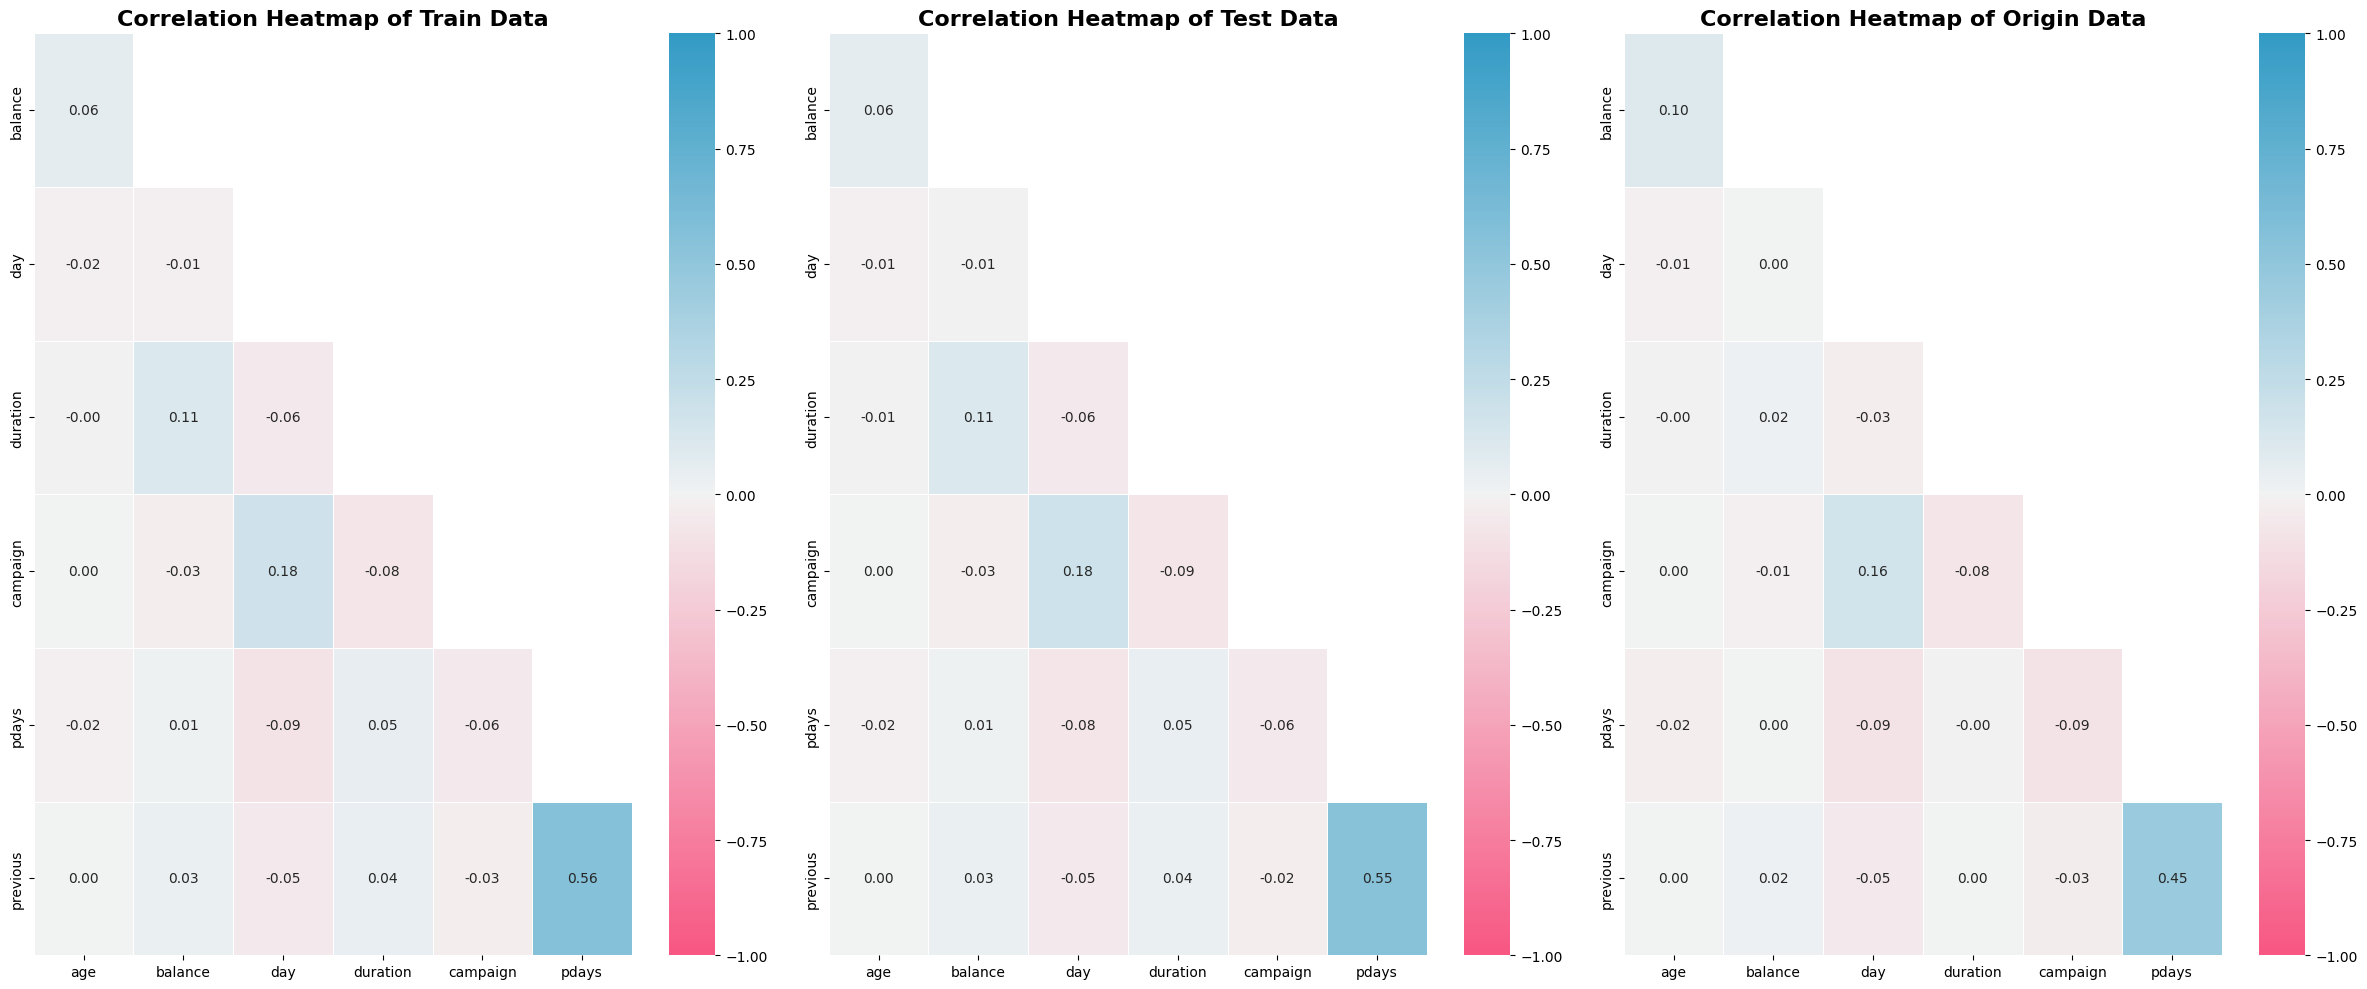

In [19]:
def plot_correlation(df_train, df_origin, df_test, origin_name="Origin Data", train_name="Train Data", test_name="Test Data"):
    corr_train = df_train.corr(numeric_only=True)
    corr_origin = df_origin.corr(numeric_only=True)
    corr_test = df_test.corr(numeric_only=True)

    mask_train = np.triu(np.ones_like(corr_train, dtype=bool))
    adjusted_mask_train = mask_train[1:, :-1]
    adjusted_cereal_corr_train = corr_train.iloc[1:, :-1]

    mask_origin = np.triu(np.ones_like(corr_origin, dtype=bool))
    adjusted_mask_origin = mask_origin[1:, :-1]
    adjusted_cereal_corr_origin = corr_origin.iloc[1:, :-1]

    mask_test = np.triu(np.ones_like(corr_test, dtype=bool))
    adjusted_mask_test = mask_test[1:, :-1]
    adjusted_cereal_corr_test = corr_test.iloc[1:, :-1]

    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    fig, ax = plt.subplots(1, 3, figsize=(24, 10))

    sns.heatmap(data=adjusted_cereal_corr_train, mask=adjusted_mask_train,
                annot=True, fmt=".2f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[0])
    ax[0].set_title(f"Correlation Heatmap of {train_name}", fontsize=16, weight="bold")

    sns.heatmap(data=adjusted_cereal_corr_test, mask=adjusted_mask_test,
                annot=True, fmt=".2f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[1])
    ax[1].set_title(f"Correlation Heatmap of {test_name}", fontsize=16, weight="bold")

    sns.heatmap(data=adjusted_cereal_corr_origin, mask=adjusted_mask_origin,
                annot=True, fmt=".2f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[2])
    ax[2].set_title(f"Correlation Heatmap of {origin_name}", fontsize=16, weight="bold")

    plt.tight_layout()
    plt.show()

plot_correlation(df_train=df_train.drop(columns="y", axis=1),
                 df_origin=df_origin.drop(columns="y", axis=1),
                 df_test=df_test)

### Insights from Correlation Analysis of Numerical Features

**Observation on Correlation Heatmaps**

* The **correlation structure remains highly consistent across the Train, Test, and Original datasets**, indicating **no feature-level data drift**. This consistency reinforces the reliability of data generation or sampling, supporting robust model performance across different dataset splits.

* Most features exhibit **very weak or negligible correlations** (|r| < 0.1), suggesting that they capture distinct aspects of customer behavior. However, one notable relationship stands out:

  * `pdays` and `previous` show a **moderate positive correlation** (\~+0.55), consistently across all datasets. This implies that customers who were contacted more recently (`pdays` is closer to 0) tend to have been contacted more frequently in the past (`previous` > 0).

  * `campaign` has a **weak positive correlation** with `duration` (\~+0.18), possibly indicating that customers receiving more calls may have slightly longer average call durations — although the relationship is not strong enough to be conclusive.

  * All other feature pairs (`balance`, `age`, `day`) have correlations close to zero, confirming their statistical independence.

**Implication – Low Risk of Multicollinearity**

* Given the **lack of strong correlations** among most numerical variables, the risk of **multicollinearity is minimal**.
* This is favorable for models that assume low feature interdependence, such as:

  * **Logistic Regression**
  * **Linear Discriminant Analysis**
  * **Explainability methods** based on coefficient magnitude

**Summary Table**

| Feature Pair             | Correlation Strength      | Interpretation                                                |
| ------------------------ | ------------------------- | ------------------------------------------------------------- |
| `pdays` \~ `previous`    | Moderate (+0.45 to +0.56) | Recently contacted customers tend to have more prior contacts |
| `campaign` \~ `duration` | Weak (+0.16 to +0.18)     | Slight trend of longer calls with more contact attempts       |
| Others                   | Very weak / None          | No notable linear relationships                               |

**Conclusion**:
The absence of strong feature interdependencies ensures that the numerical features contribute **independent signals** to the model, improving interpretability and reducing the risk of coefficient instability in linear models.

## Categorical Feature Distributions

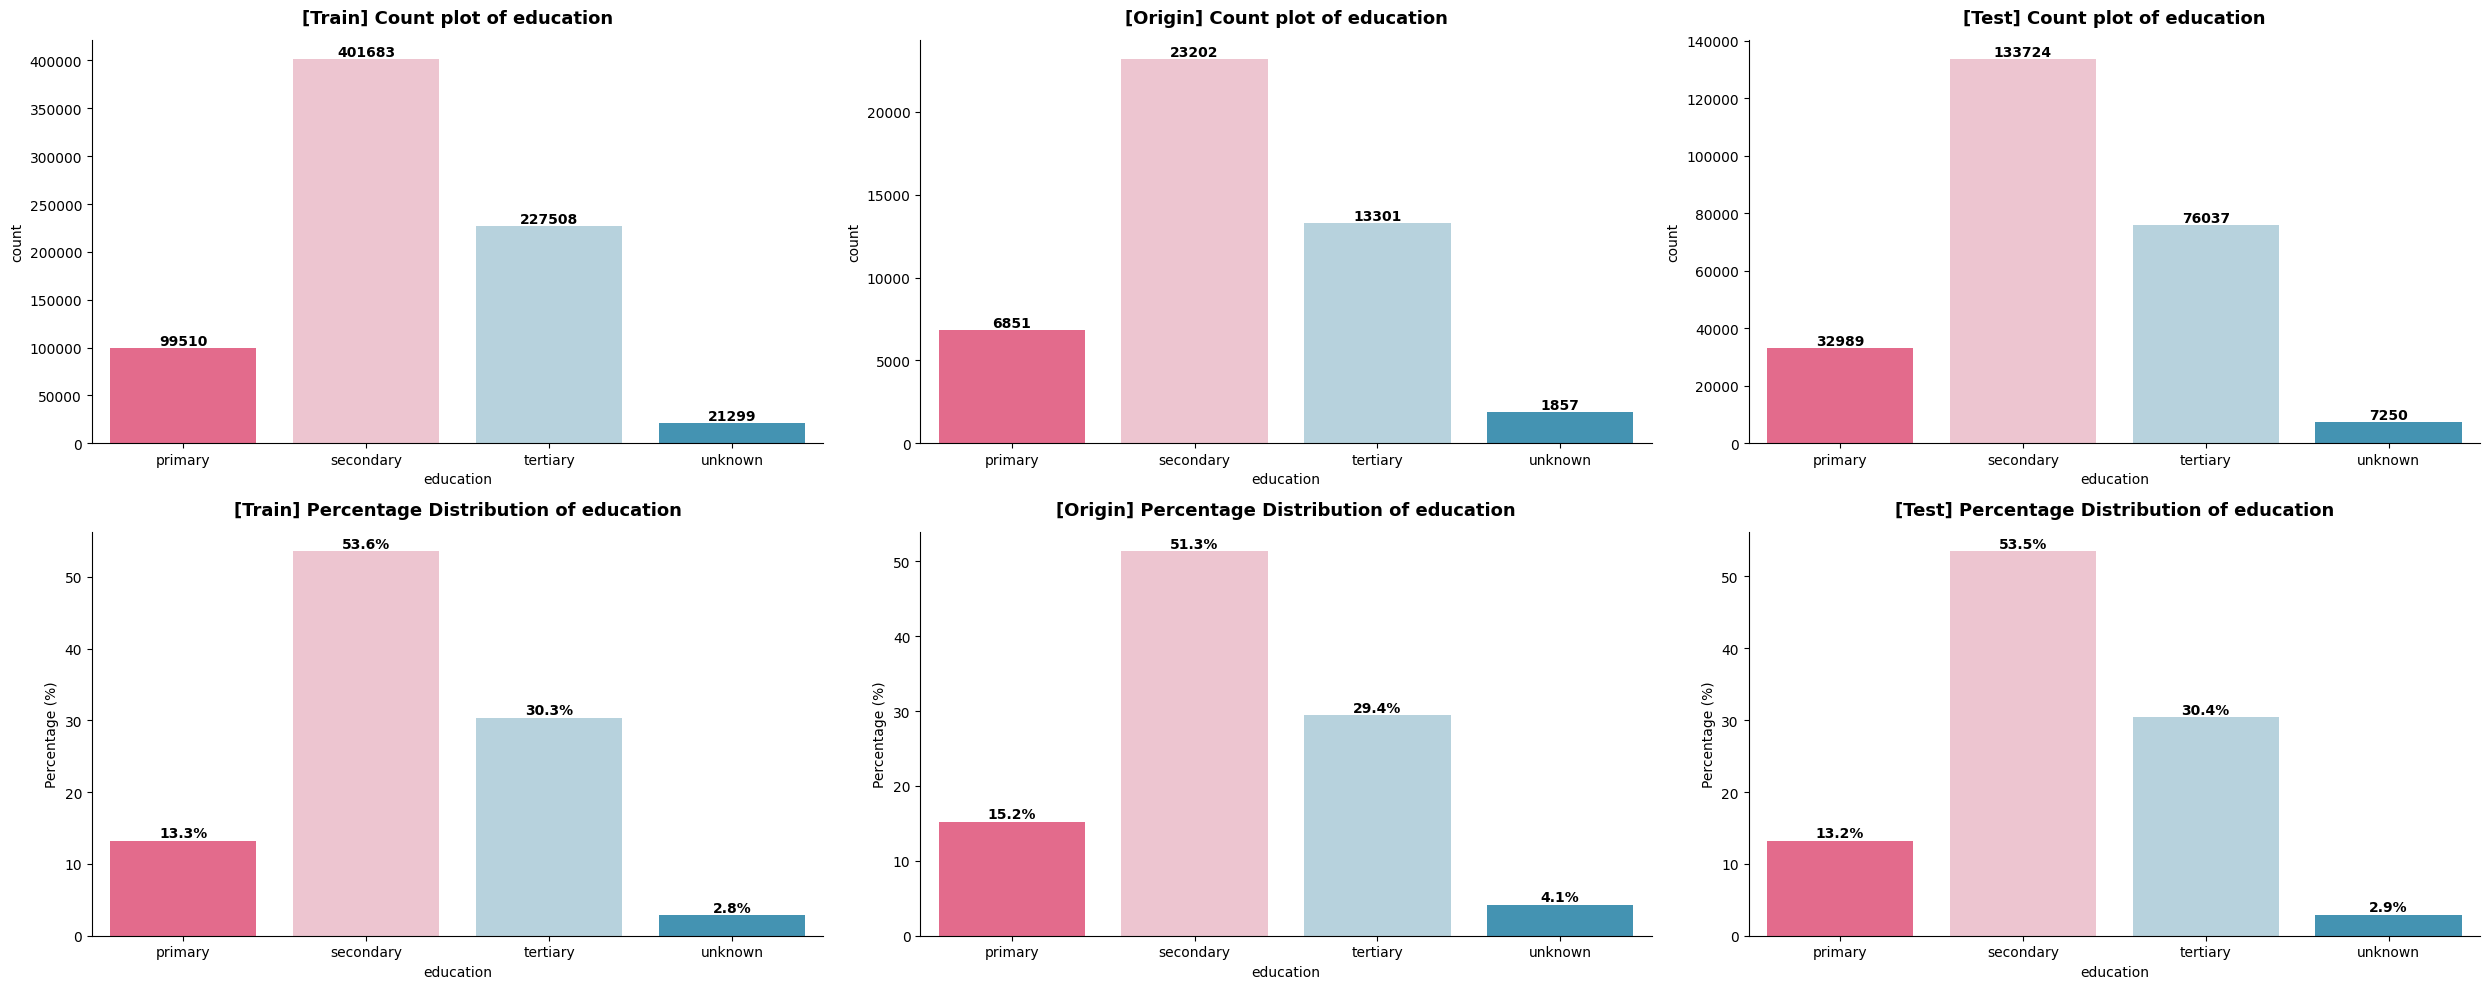

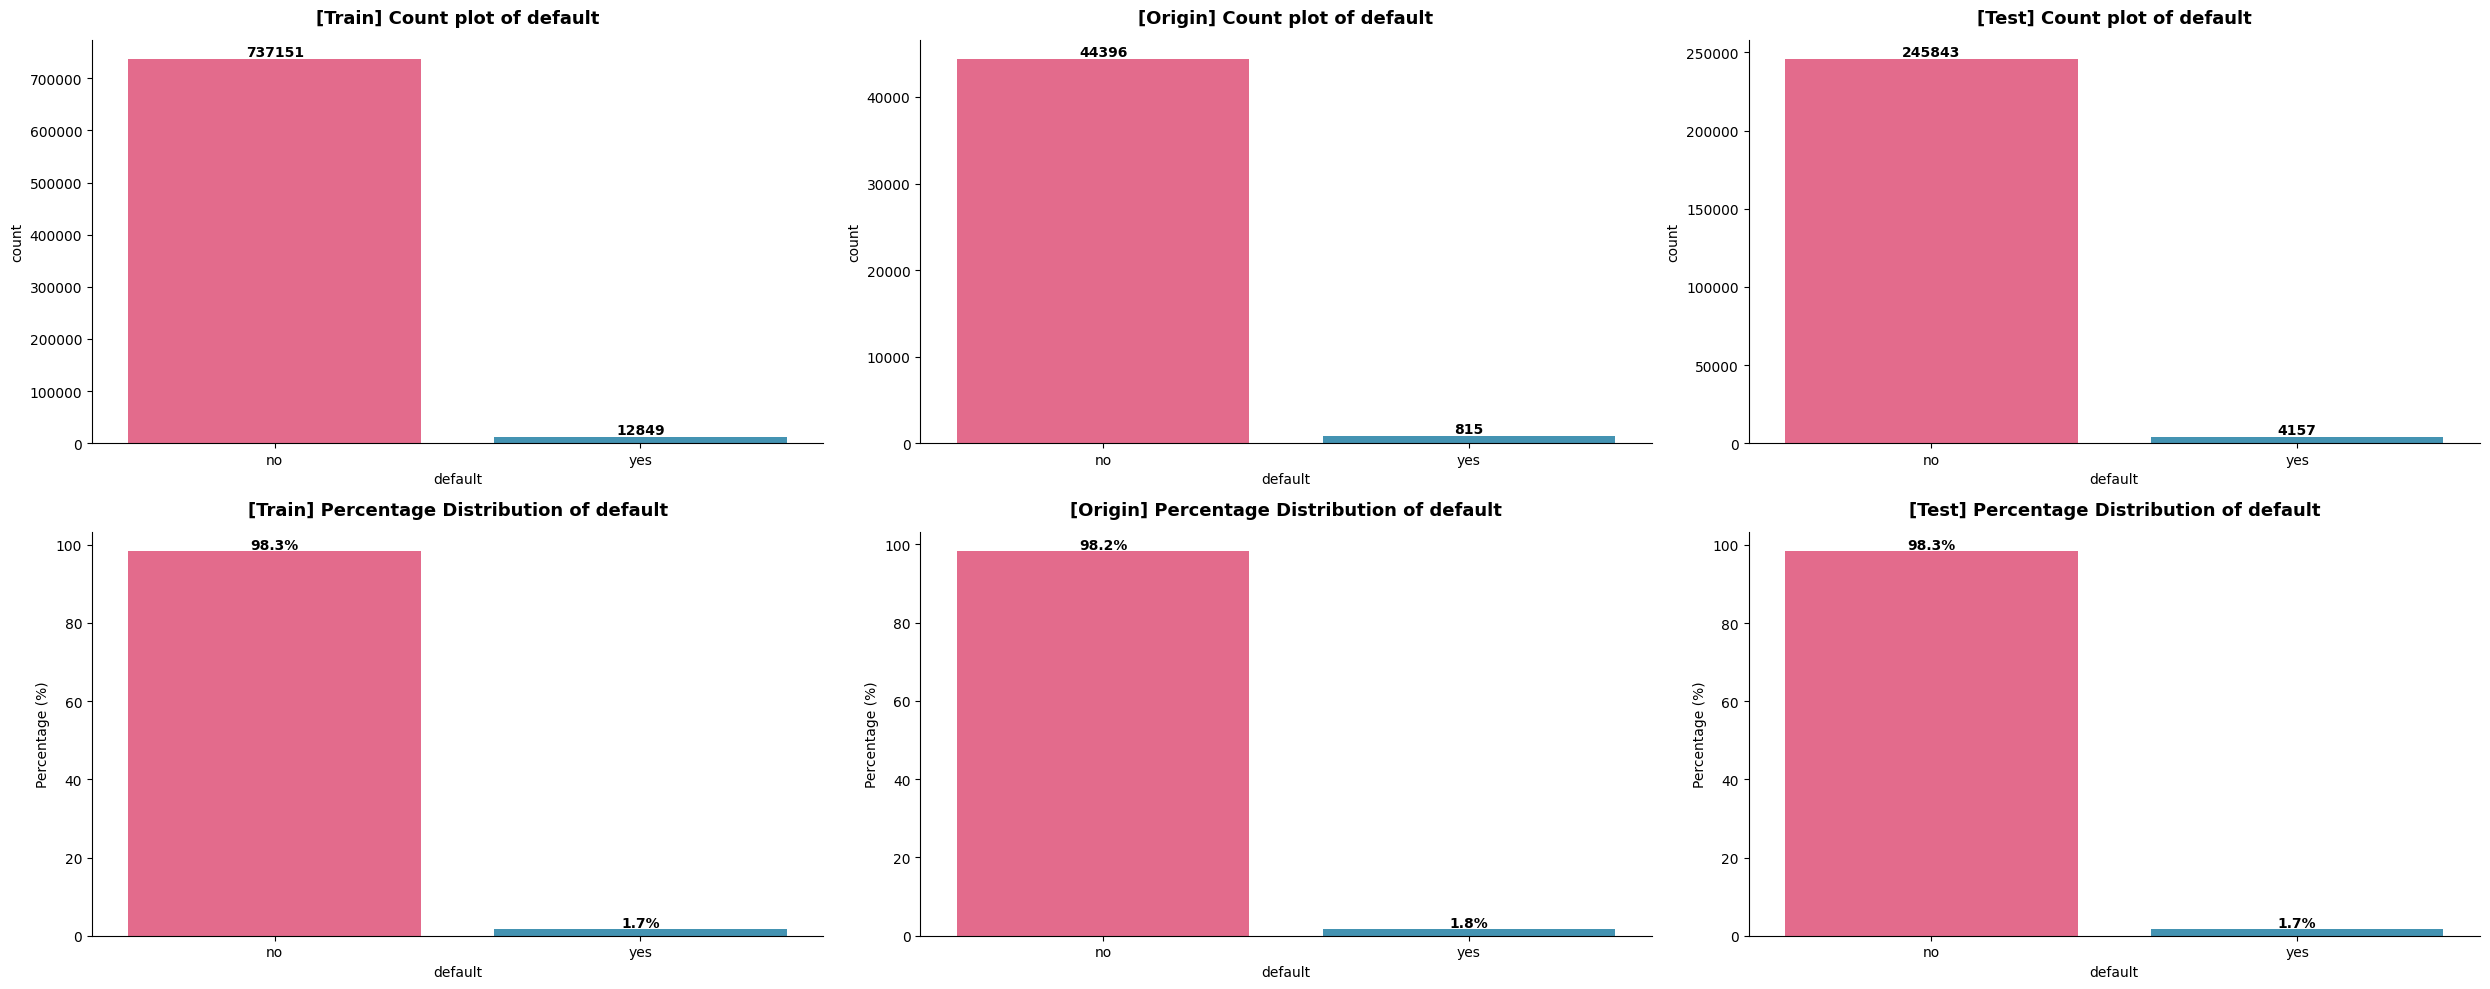

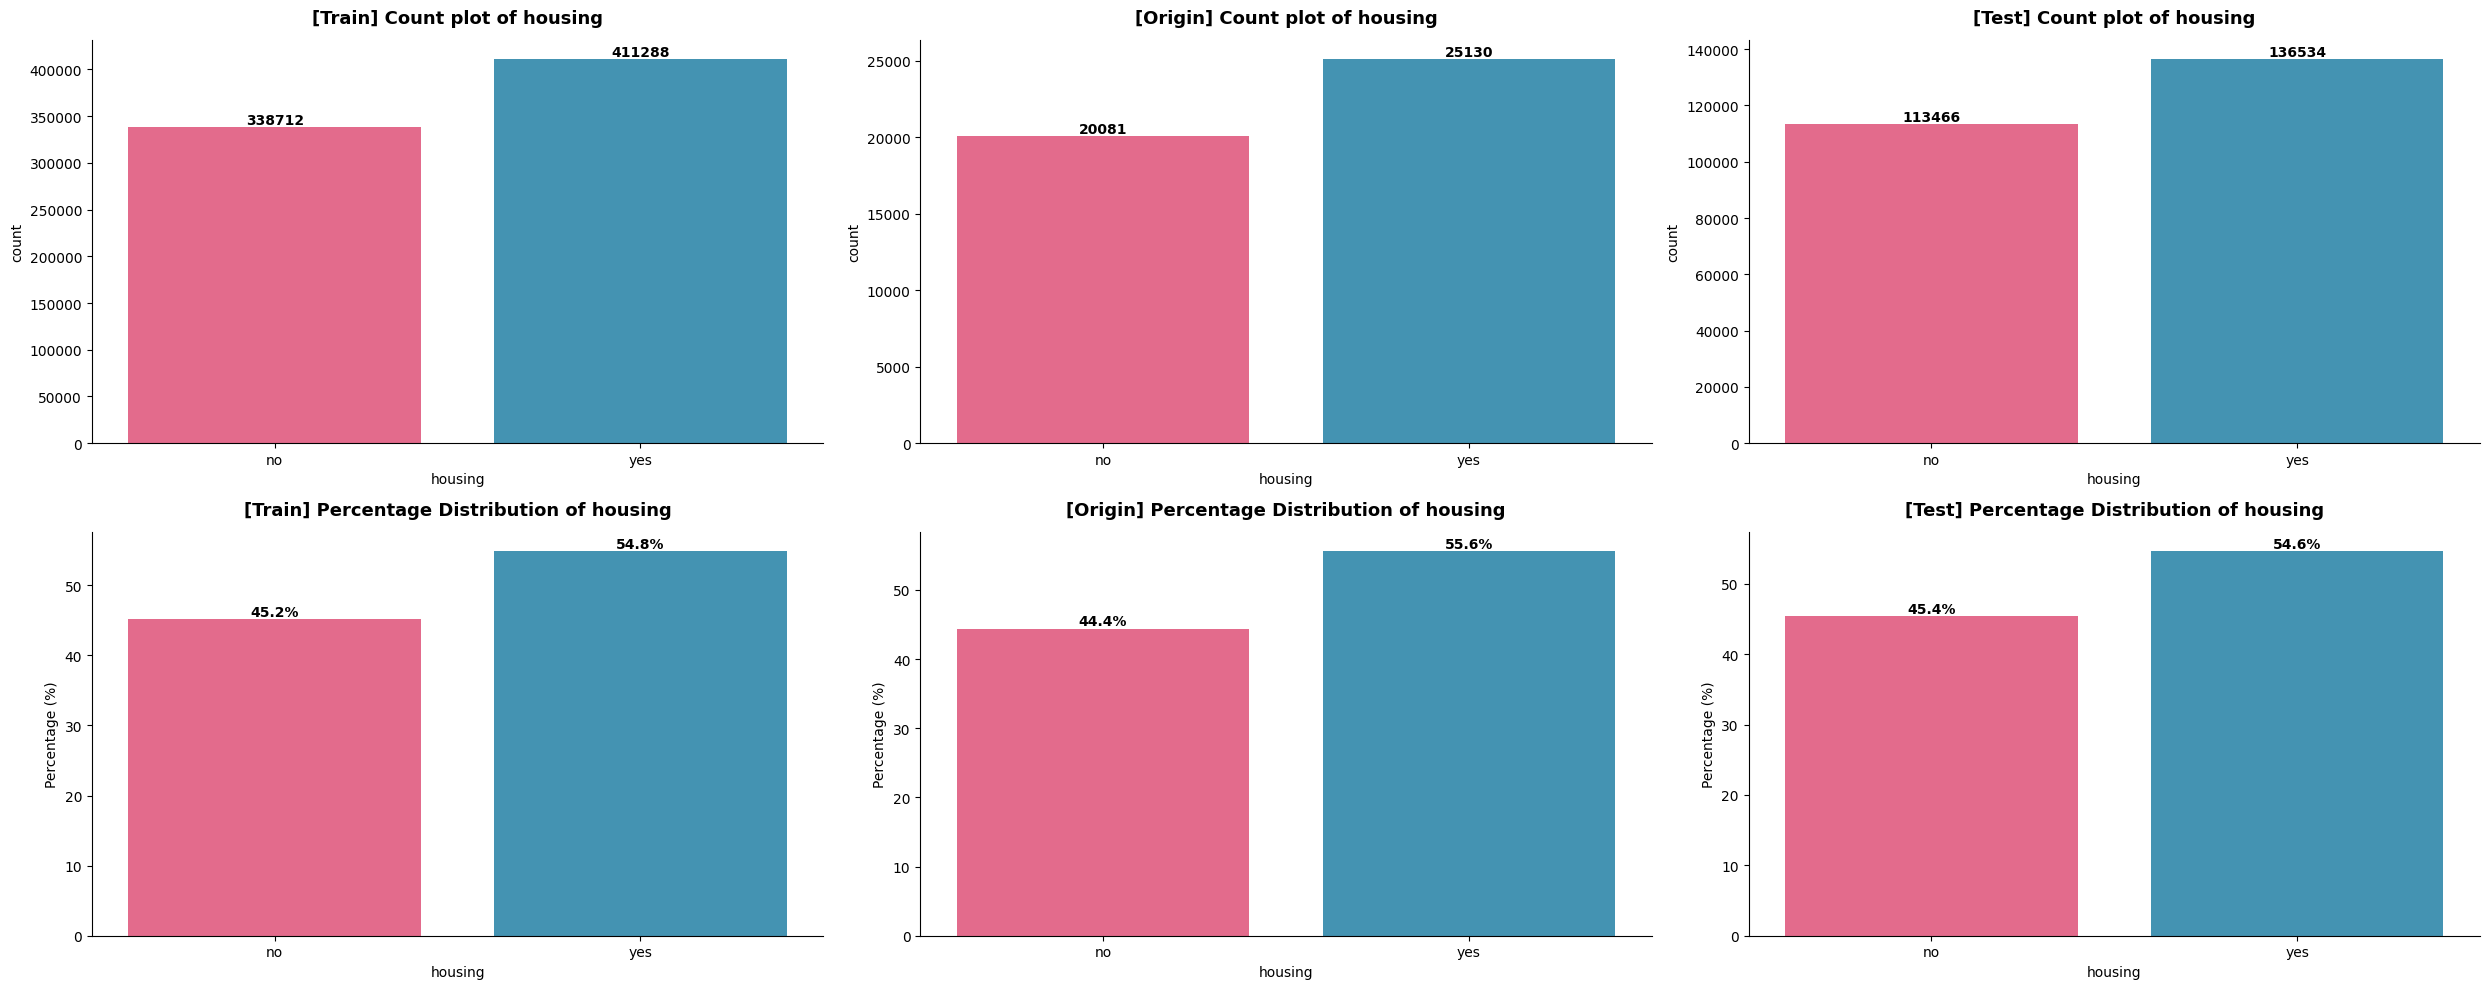

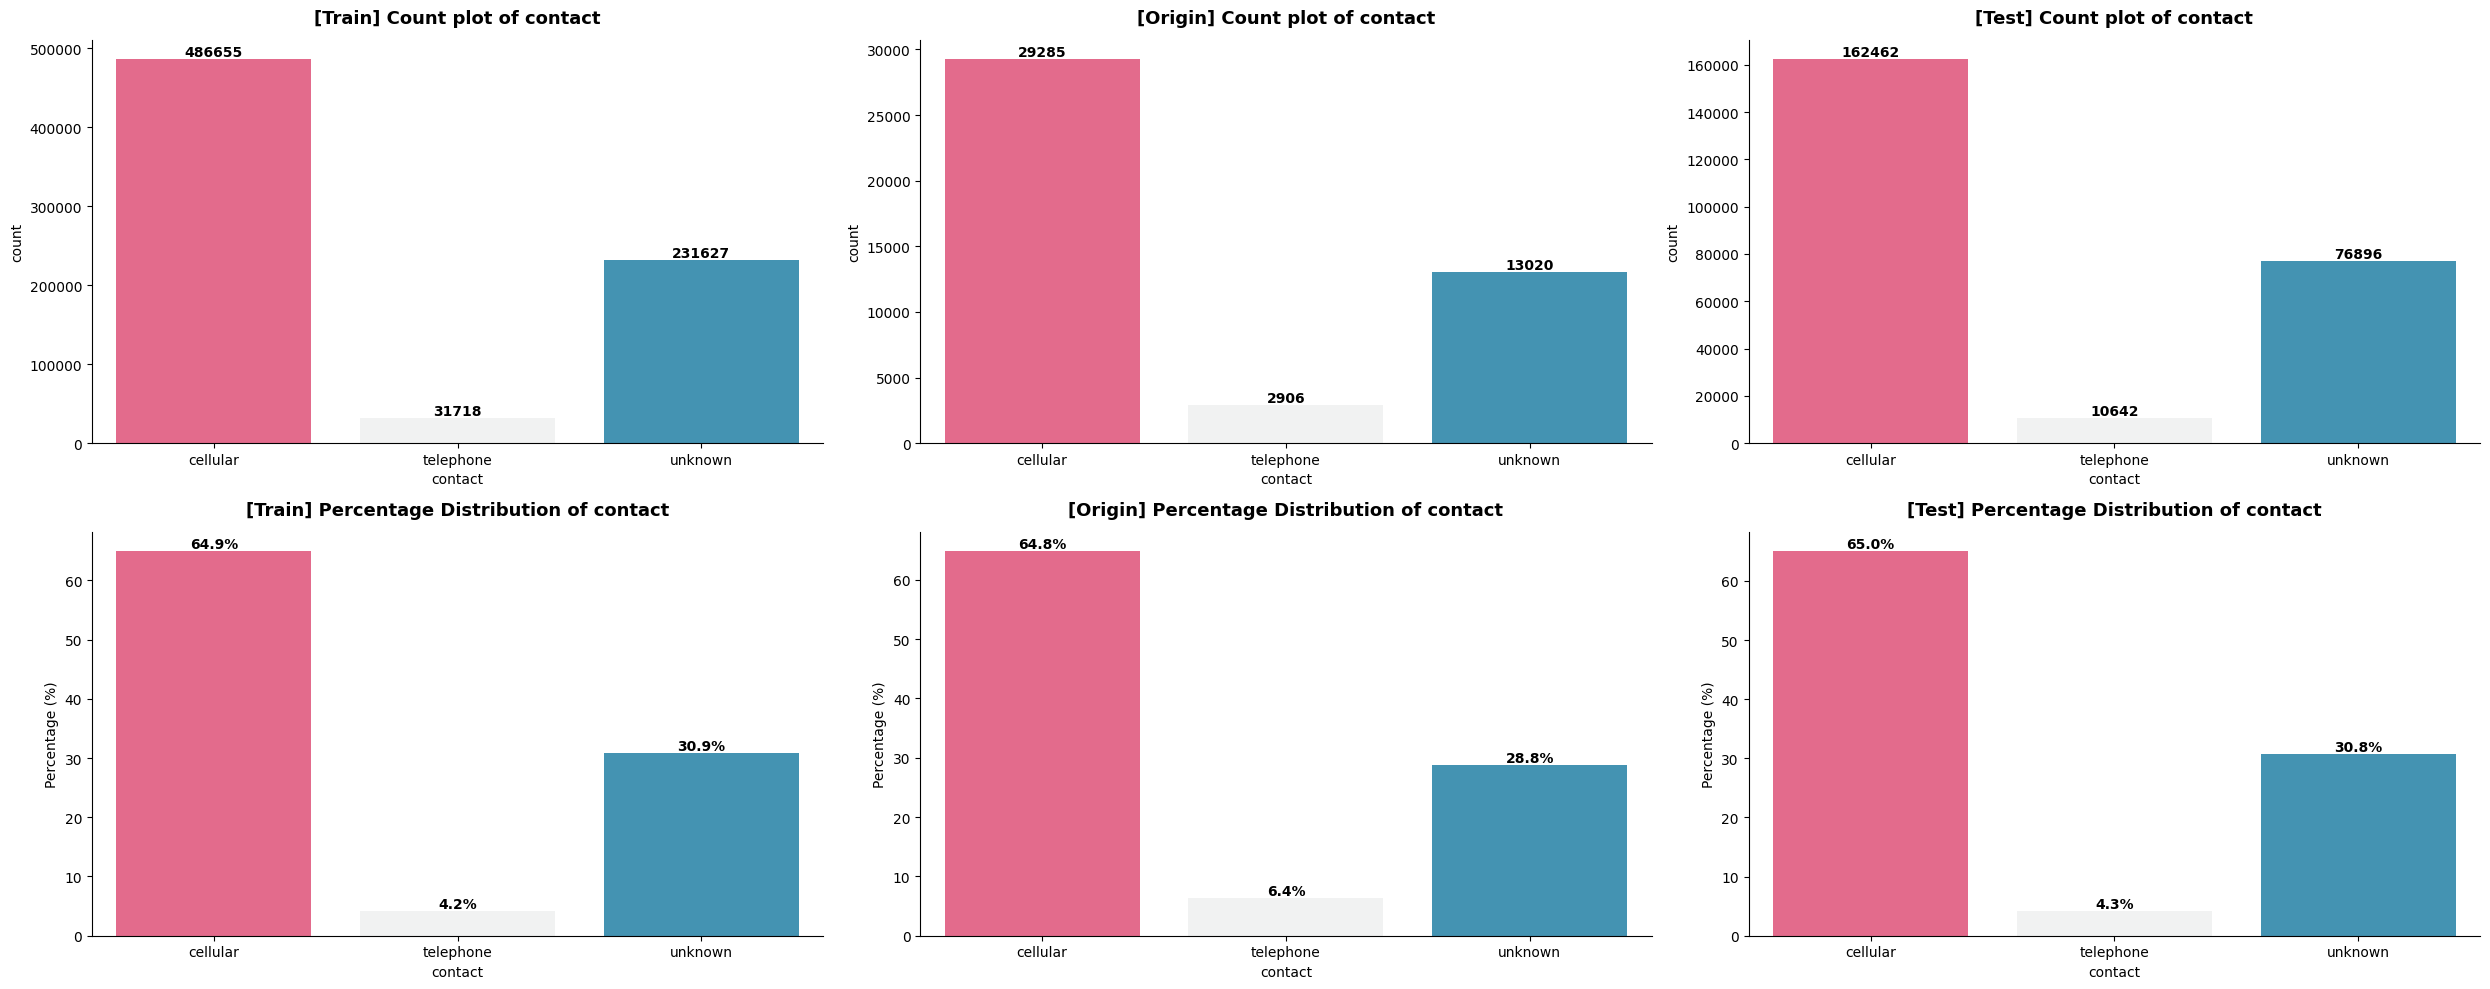

In [20]:
def plot_categorical_distribution(cat_features, df_train, df_test, df_origin, order=None):
    for feature in cat_features:
        fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25, 10))

        # Determine order dynamically if not provided
        if order is None:
            unique_vals = sorted(df_train[feature].dropna().unique())
        else:
            unique_vals = order

        # COUNT PLOT – TRAIN
        sns.countplot(data=df_train, x=feature, ax=ax[0, 0],
                      palette=color(n_colors=len(unique_vals)), order=unique_vals)
        ax[0, 0].set_title(f"[Train] Count plot of {feature}", fontsize=13, pad=12, weight="bold")
        if feature == "job":
            ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=45)
        sns.despine(ax=ax[0, 0], left=False, bottom=False)
        for container in ax[0, 0].containers:
            ax[0, 0].bar_label(container, fmt='%d', label_type="edge", fontsize=10, weight="bold")

        # COUNT PLOT – ORIGIN
        sns.countplot(data=df_origin, x=feature, ax=ax[0, 1],
                      palette=color(n_colors=len(unique_vals)), order=unique_vals)
        ax[0, 1].set_title(f"[Origin] Count plot of {feature}", fontsize=13, pad=12, weight="bold")
        if feature == "job":
            ax[0, 1].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=45)
        sns.despine(ax=ax[0, 1], left=False, bottom=False)
        for container in ax[0, 1].containers:
            ax[0, 1].bar_label(container, fmt='%d', label_type="edge", fontsize=10, weight="bold")

        # COUNT PLOT – TEST
        sns.countplot(data=df_test, x=feature, ax=ax[0, 2],
                      palette=color(n_colors=len(unique_vals)), order=unique_vals)
        ax[0, 2].set_title(f"[Test] Count plot of {feature}", fontsize=13, pad=12, weight="bold")
        if feature == "job":
            ax[0, 2].set_xticklabels(ax[0, 2].get_xticklabels(), rotation=45)
        sns.despine(ax=ax[0, 2], left=False, bottom=False)
        for container in ax[0, 2].containers:
            ax[0, 2].bar_label(container, fmt='%d', label_type="edge", fontsize=10, weight="bold")

        # PERCENTAGE BARPLOT – TRAIN
        train_percent = df_train[feature].value_counts(normalize=True) * 100
        train_percent = train_percent.reindex(unique_vals).fillna(0)
        sns.barplot(x=train_percent.index, y=train_percent.values, ax=ax[1, 0],
                    palette=color(n_colors=len(unique_vals)))
        ax[1, 0].set_title(f"[Train] Percentage Distribution of {feature}", fontsize=13, pad=12, weight="bold")
        ax[1, 0].set_ylabel("Percentage (%)")
        ax[1, 0].set_xlabel(feature)
        if feature == "job":
            ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=45)
        sns.despine(ax=ax[1, 0], left=False, bottom=False)
        for i, v in enumerate(train_percent.values):
            ax[1, 0].text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=10, weight="bold")

        # PERCENTAGE BARPLOT – ORIGIN
        origin_percent = df_origin[feature].value_counts(normalize=True) * 100
        origin_percent = origin_percent.reindex(unique_vals).fillna(0)
        sns.barplot(x=origin_percent.index, y=origin_percent.values, ax=ax[1, 1],
                    palette=color(n_colors=len(unique_vals)))
        ax[1, 1].set_title(f"[Origin] Percentage Distribution of {feature}", fontsize=13, pad=12, weight="bold")
        ax[1, 1].set_ylabel("Percentage (%)")
        ax[1, 1].set_xlabel(feature)
        if feature == "job":
            ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=45)
        sns.despine(ax=ax[1, 1], left=False, bottom=False)
        for i, v in enumerate(origin_percent.values):
            ax[1, 1].text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=10, weight="bold")

        # PERCENTAGE BARPLOT – TEST
        test_percent = df_test[feature].value_counts(normalize=True) * 100
        test_percent = test_percent.reindex(unique_vals).fillna(0)
        sns.barplot(x=test_percent.index, y=test_percent.values, ax=ax[1, 2],
                    palette=color(n_colors=len(unique_vals)))
        ax[1, 2].set_title(f"[Test] Percentage Distribution of {feature}", fontsize=13, pad=12, weight="bold")
        ax[1, 2].set_ylabel("Percentage (%)")
        ax[1, 2].set_xlabel(feature)
        if feature == "job":
            ax[1, 2].set_xticklabels(ax[1, 2].get_xticklabels(), rotation=45)
        sns.despine(ax=ax[1, 2], left=False, bottom=False)
        for i, v in enumerate(test_percent.values):
            ax[1, 2].text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=10, weight="bold")

        plt.tight_layout()
        plt.show()

plot_categorical_distribution(cat_features=cat_features, df_train = df_train, df_test = df_test, df_origin=df_origin)

In [21]:
def top_ratio(df_test = df_test, df_train = df_train, df_origin=df_origin, cat_features = cat_features):
    dataset_names = ["Train", "Test", "Origin"]
    datasets = [df_train, df_origin, df_test]
    for i, (data, name) in enumerate(zip(datasets, dataset_names)):
        print(f"{name} Data")
        flagged = False
        for feature in cat_features:
            freq = data[feature].value_counts(normalize=True)
            top_ratio = freq.iloc[0]
            if top_ratio > 0.99:
                flagged = True
                print(f"⚠️  {feature}: {top_ratio:.1%} là '{freq.index[0]}'")
        if not flagged:
            print("✅ No feature has a category that makes up more than 99% of its values.")
        print("*" * 50)
top_ratio()

Train Data
✅ No feature has a category that makes up more than 99% of its values.
**************************************************
Test Data
✅ No feature has a category that makes up more than 99% of its values.
**************************************************
Origin Data
✅ No feature has a category that makes up more than 99% of its values.
**************************************************


### Overall Consistency in Categorical Feature Distributions

* The **count plots and percentage distribution charts** of categorical variables across the **Train, Test, and Original datasets** show a **high degree of consistency**.
* There are **no noticeable signs of distributional shift** or **sampling bias** across the datasets.

**Detailed Observations:**

* The **proportions of category values (labels)** for each feature remain within acceptable margins of variation across datasets.
  For example:

  * `job`: categories like `blue-collar`, `management`, and `technician` maintain similar proportions across all three datasets.
  * `marital`: the `married` group consistently makes up around **60–64%**.
  * Other features such as `education`, `default`, `housing`, `loan`, `contact`, `month`, and `poutcome` also retain a stable distribution structure.

**Conclusion:**

> The categorical variables exhibit a **high degree of distributional similarity across Train, Test, and Original datasets**, indicating **well-preserved sampling consistency**.
> This enhances **model robustness** and reduces the risk of performance degradation due to dataset mismatch.

## Bivariate Analysis

In [22]:
df_train_combined = pd.concat([df_train, df_origin], axis=0, ignore_index=True)
# Re-check duplicate

datasets = {
    "Training Data": df_train_combined,
    "Test Data": df_test
}

duplicate_summary = {}
for name, data in datasets.items():
    check_duplicates_report(data, name)
    duplicate_summary[name] = {
        "duplicates": data.duplicated().sum(),
        "total_rows": len(data)
    }
    print()

🔍 Training Data Duplicate Analysis
✅ No duplicates found in 795,211 rows

🔍 Test Data Duplicate Analysis
✅ No duplicates found in 250,000 rows



🔎 D’Agostino and Pearson Normality Test for 'age' across 'y' groups

 Group: 0 (n = 699434)
  Statistic : 29906.790
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 95777)
  Statistic : 8550.297
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'age' by 'y'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 34820543361.0
p-value     : 3.50790870183308e-88

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '0' has a higher median 'age' than Group '1'.


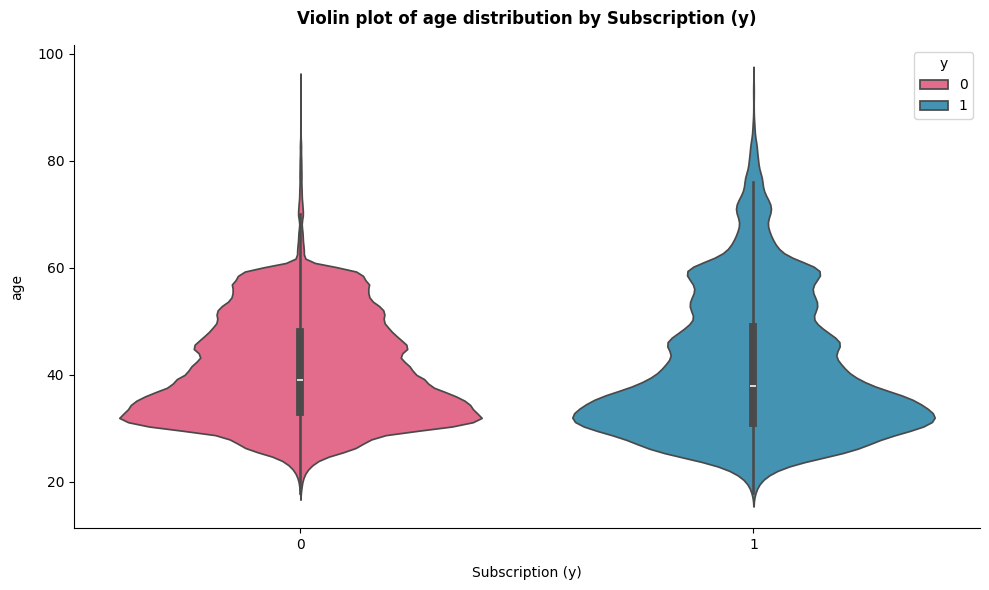

🔎 D’Agostino and Pearson Normality Test for 'balance' across 'y' groups

 Group: 0 (n = 699434)
  Statistic : 1255391.976
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 95777)
  Statistic : 141723.668
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'balance' by 'y'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 22056113590.5
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '1' has a higher median 'balance' than Group '0'.


🔎 D’Agostino and Pearson Normality Test for 'day' across 'y' groups

 Group: 0 (n = 699434)
  Statistic : 206287.868
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 95777)
  Statistic : 25501.378
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'day' by 'y'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 36442810786.5
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '0' has a higher median 'day' than Group '1'.


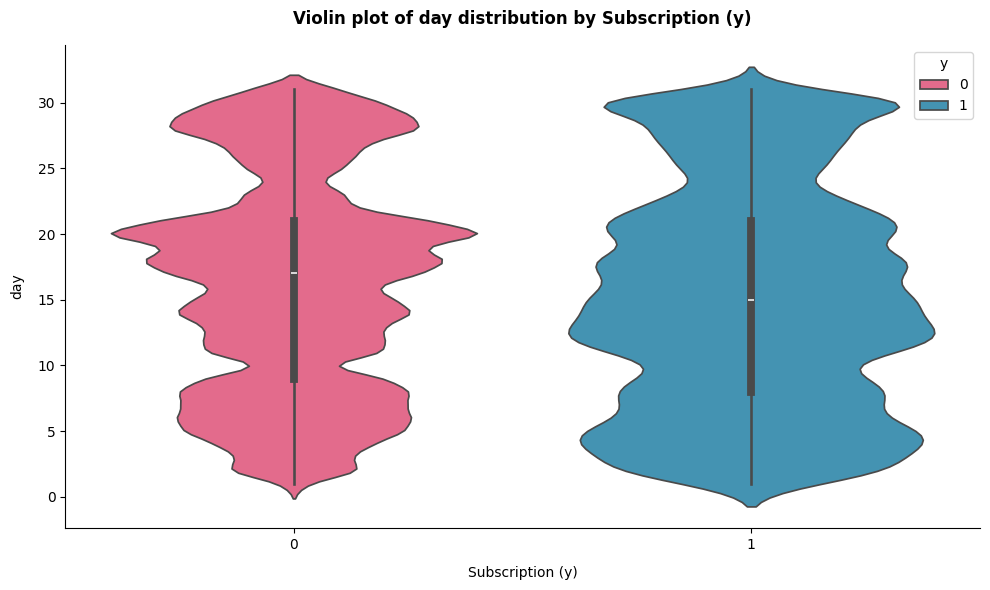

🔎 D’Agostino and Pearson Normality Test for 'duration' across 'y' groups

 Group: 0 (n = 699434)
  Statistic : 395418.733
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 95777)
  Statistic : 10845.135
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'duration' by 'y'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 7655600686.5
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '1' has a higher median 'duration' than Group '0'.


🔎 D’Agostino and Pearson Normality Test for 'campaign' across 'y' groups

 Group: 0 (n = 699434)
  Statistic : 679414.028
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 95777)
  Statistic : 94086.766
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'campaign' by 'y'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 38716648342.5
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '0' has a higher median 'campaign' than Group '1'.


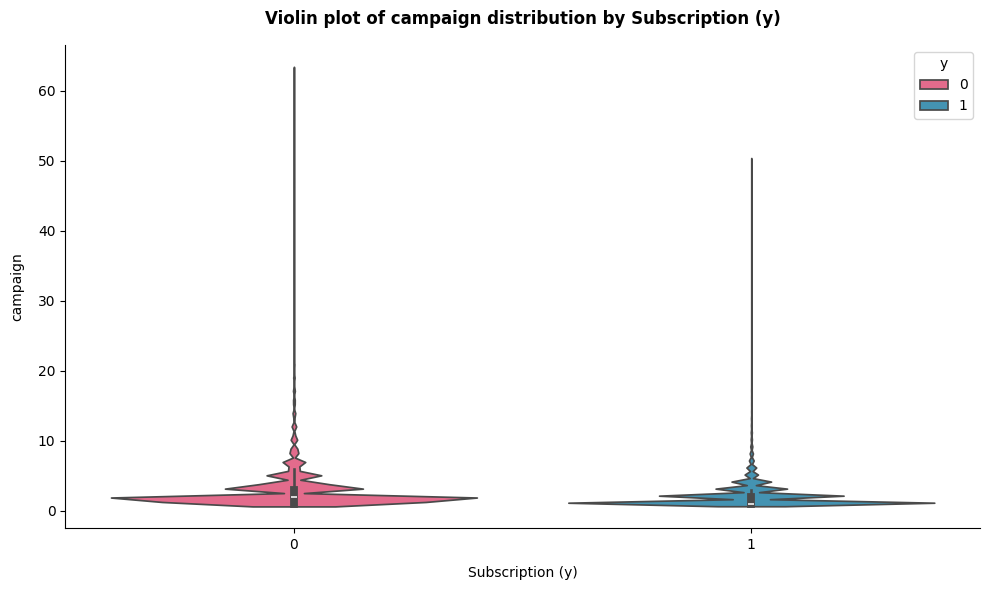

🔎 D’Agostino and Pearson Normality Test for 'pdays' across 'y' groups

 Group: 0 (n = 699434)
  Statistic : 527895.319
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 95777)
  Statistic : 54656.315
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'pdays' by 'y'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 28411330534.0
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: The medians are equal, but distributions may still differ.


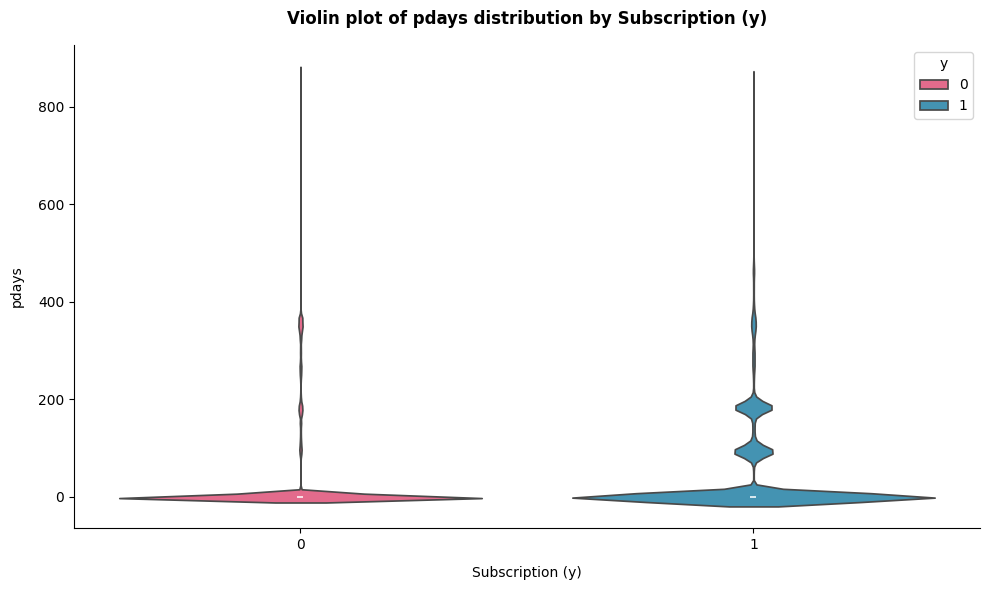

🔎 D’Agostino and Pearson Normality Test for 'previous' across 'y' groups

 Group: 0 (n = 699434)
  Statistic : 1787253.661
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 95777)
  Statistic : 108888.454
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'previous' by 'y'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 28059791842.5
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: The medians are equal, but distributions may still differ.


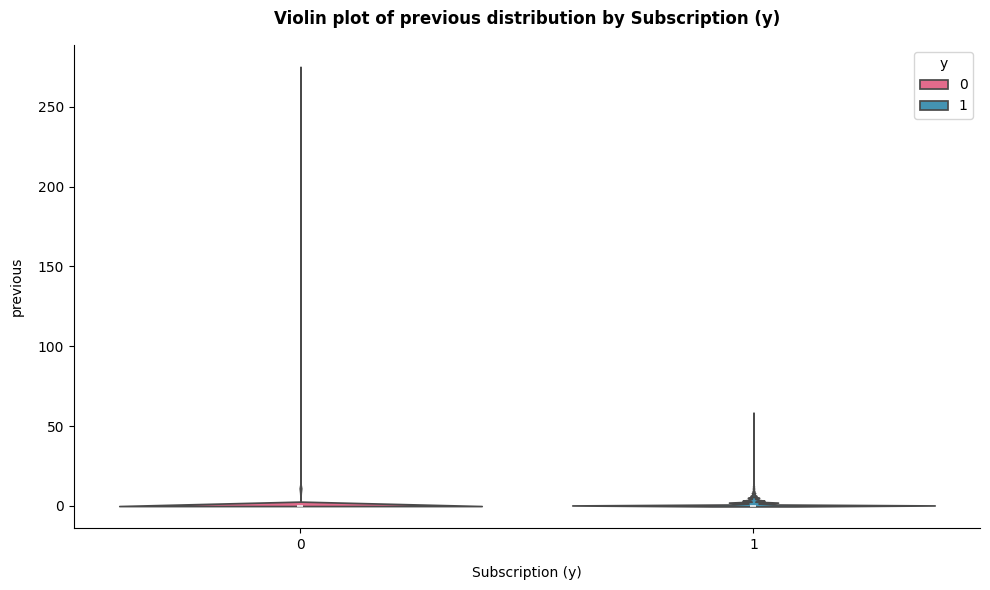

In [23]:
from IPython.core.display import HTML
def perform_statical_testing(feature, df_train = df_train_combined, total_categories = 2, target_feature = "y"):
    cal_normaltest(cat_feature=target_feature, num_feature=feature, df=df_train)
    if total_categories == 2:
        cal_mannwhitneyu(dataframe=df_train, categorical_feature=target_feature, num_feature=feature)
    else:
        perform_kruskal_test(df=df_train, categorical_feature=target_feature, numeric_feature=feature)

def plot_numerical_distribution(feature, df_train = df_train_combined, target_feature = "y", order = None):
    """
    Performs statical testing for each groups (distribution by target_feature) by ANOVA, T-test, Mann-Whitney U test,... <br>
    Draw violinplot and histogram to display the distribution for each groups of feature.
    Parameters:
        feature (str): The name of the column representing the numerical variable.
        df_train (pd.DataFrame): The input dataset.
        target_feature (str): The name of the column representing the target feature.
        order (list): Order items in plot.

    Returns:
        None
    """

    # Summary information
    df_summary_feature = df_train.groupby(by = target_feature, as_index= False)\
    .agg (
        Count = (feature, "count"),
        Mean = (feature, "mean"),
        Median = (feature, "median"),
        Std = (feature, "std")
    )
    df_summary_feature = df_summary_feature.sort_values(by="Mean", ascending=False)

    summary_data = [
        ("Overall Mean", f"{df_train[feature].mean():.2f}"),
        ("Overall Median", f"{df_train[feature].median()}"),
        ("Overall Std", f"{df_train[feature].std():.2f}")
    ]
    summary_html = "<ul>" + "".join([f"<li><b>{k}:</b> {v}</li>" for k, v in summary_data]) + "</ul>"
    display(HTML(summary_html))
    display(df_summary_feature.style.background_gradient(cmap=cm).set_table_attributes('style="width:75%; margin:auto;"'))

    perform_statical_testing(feature=feature, target_feature=target_feature, total_categories=df_train[target_feature].nunique())

    # Plot distribution
    fig, ax = plt.subplots(figsize=(10, 6))
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    colors = [cmap(0.0), cmap(1.0)]
    sns.violinplot(x=target_feature, y=feature, data=df_train, hue=target_feature, palette=colors, ax=ax)
    ax.set_title(f"Violin plot of {feature} distribution by Subscription (y)", pad=15, weight = "bold")
    ax.set_xlabel("Subscription (y)", labelpad=10)
    ax.set_ylabel(feature, labelpad=10)
    sns.despine(left=False, bottom=False, ax=ax)
    plt.tight_layout()
    plt.show()

for feature in num_features:
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:green;'><b>Distribution of {feature} by Subscription</b></h2>"))
    plot_numerical_distribution(feature=feature, df_train = df_train_combined)

### Insight Numerical Features vs Subscription

`Age`

Even though the average age between the two groups isn’t much different, the **distribution of ages among subscribed customers (`y = 1`) is notably different**, and this difference is **statistically significant**. Therefore, **age is a relevant feature linked to subscription behavior**.

`balance`

Customers who **subscribed (Group 1)** have **significantly higher median and mean balances** compared to those who did not subscribe (Group 0). In other words, **subscribed customers tend to maintain higher balances**, suggesting a **potential link between financial capability and subscription decision**.

`day`

There is a **statistically significant difference** between the two groups (p-value = 0.0).

* The **median and mean** of the **subscribed group** (`y = 1`) are **lower** than those of the **non-subscribed group** (`y = 0`).
* In other words, for the subscribed group, the **last contact day** tends to be **earlier** in the month compared to the non-subscribed group.

This suggests that **earlier contact in the month may be linked to a higher likelihood of subscription**.

`duration`

The last call duration (`duration`) is a strong distinguishing factor between the two groups. Customers who **subscribe (y=1)** tend to have **longer calls**, which may indicate that they were given more thorough consultations or showed greater interest.

`campaign`

* There is a **statistically significant difference** between the two groups. The **median** and **mean** of the **non-subscribed group (y=0)** are **higher** than those of the **subscribed group (y=1)**.
* Although the difference is relatively small, it is still statistically significant. In other words, **non-subscribers tend to have slightly more contact attempts (campaign calls)** than subscribers.

`pdays`

* **The `pdays` variable is significantly associated with subscription behavior.**
* While the majority of customers were not previously contacted, those who were contacted more recently (lower non-negative `pdays`) were **more likely to subscribe**, suggesting that **timely follow-up contact is effective**.

`previous`

* Even though most customers in both groups had no prior contact (median = 0), customers who eventually subscribed (**Group 1**) had **more prior contacts on average** than those who did not subscribe.
* This suggests that **past interactions may positively influence** subscription likelihood.

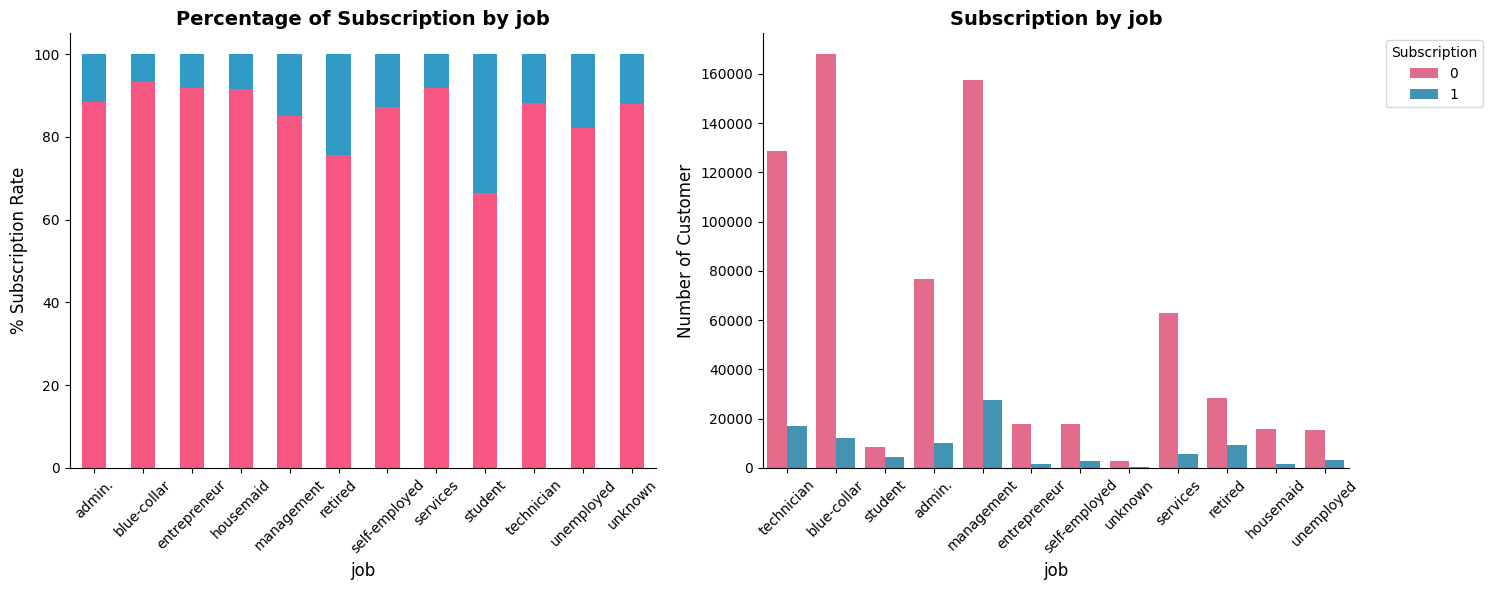


🔍 Chi-Square Test of Independence: 'job' vs. 'y'
Chi-squared statistic: 19344.466
Degrees of freedom: 11
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'job' and 'y'.

📈 Standardized Residuals:
y                  0      1
job                        
admin.          1.15  -3.10
blue-collar    23.86 -64.49
entrepreneur    5.76 -15.55
housemaid       4.96 -13.42
management    -13.43  36.31
retired       -25.73  69.53
self-employed  -1.25   3.37
services       10.41 -28.14
student       -26.00  70.27
technician      1.03  -2.78
unemployed     -8.46  22.87
unknown         0.00  -0.00


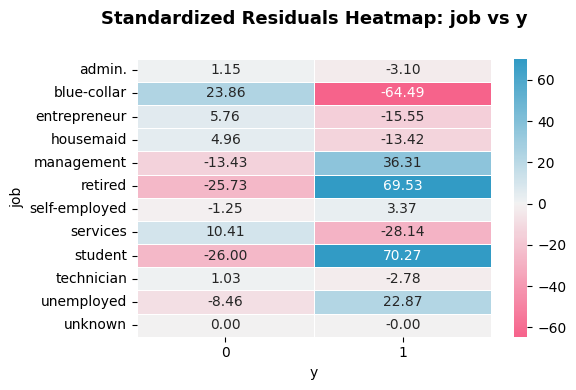

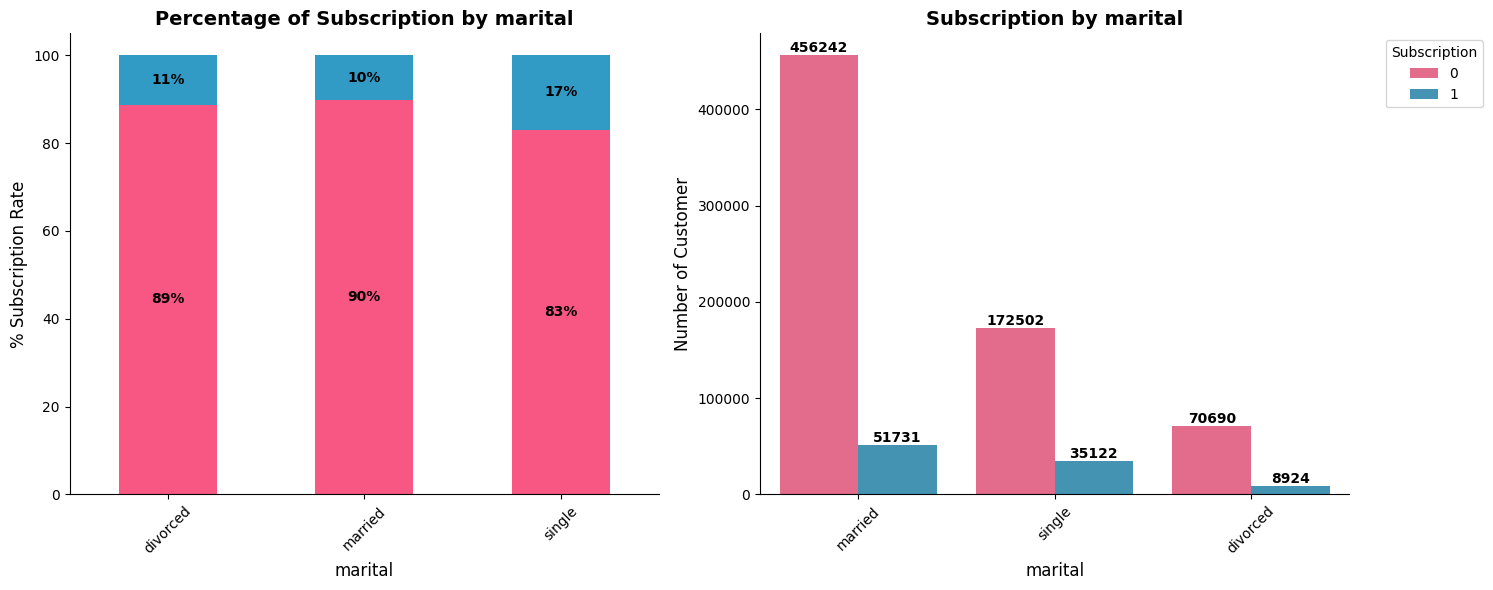


🔍 Chi-Square Test of Independence: 'marital' vs. 'y'
Chi-squared statistic: 6364.037
Degrees of freedom: 2
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'marital' and 'y'.

📈 Standardized Residuals:
y             0      1
marital               
divorced   2.51  -6.79
married   14.14 -38.21
single   -23.67  63.97


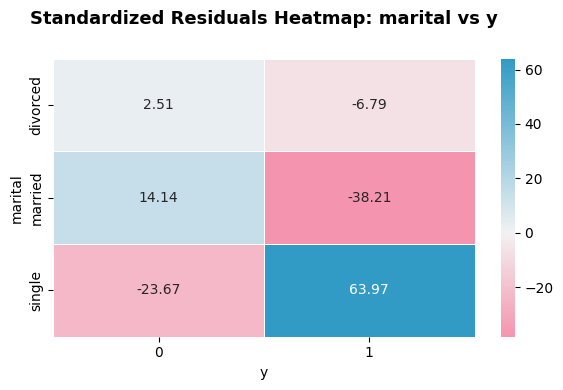

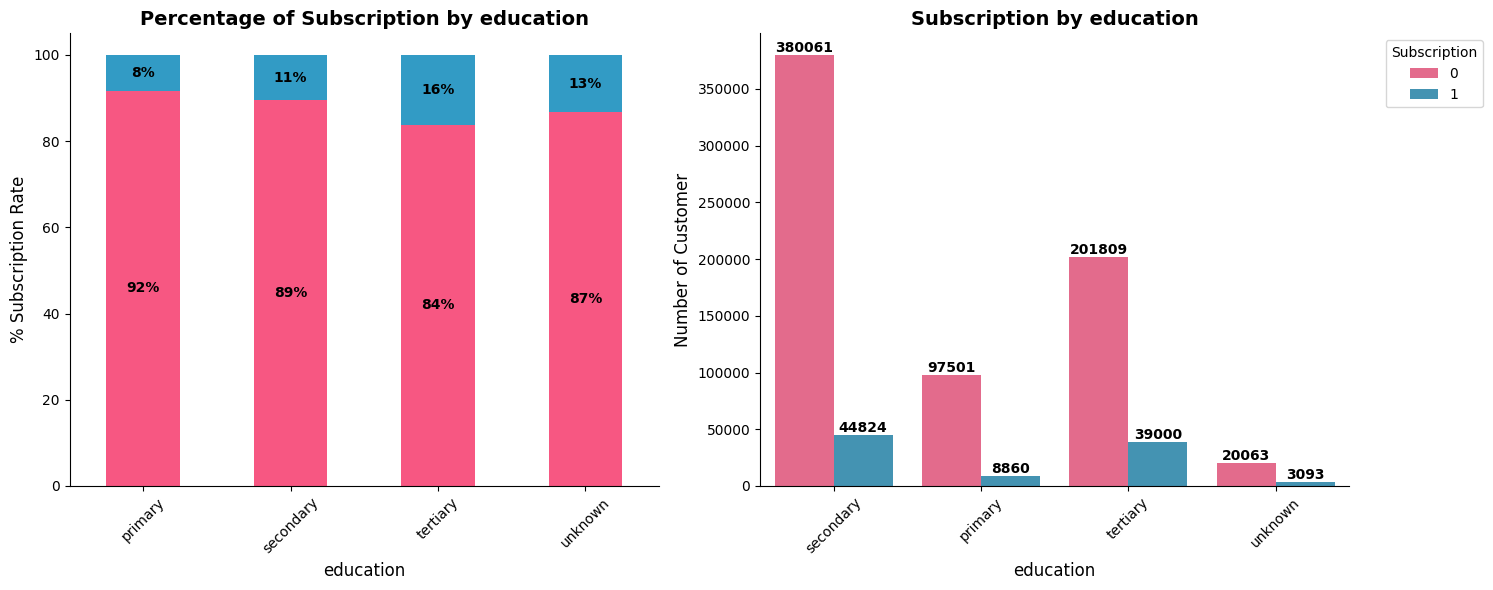


🔍 Chi-Square Test of Independence: 'education' vs. 'y'
Chi-squared statistic: 6235.728
Degrees of freedom: 3
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'education' and 'y'.

📈 Standardized Residuals:
y              0      1
education              
primary    12.92 -34.90
secondary  10.39 -28.07
tertiary  -21.72  58.70
unknown    -2.13   5.76


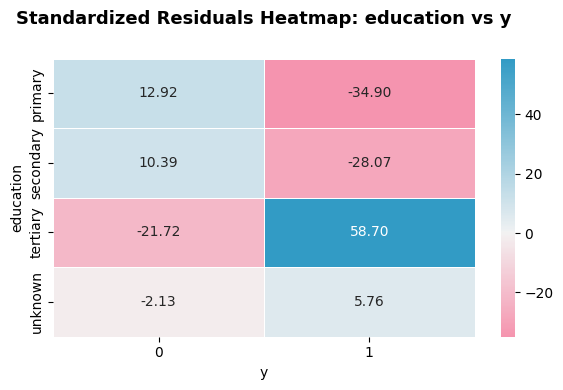

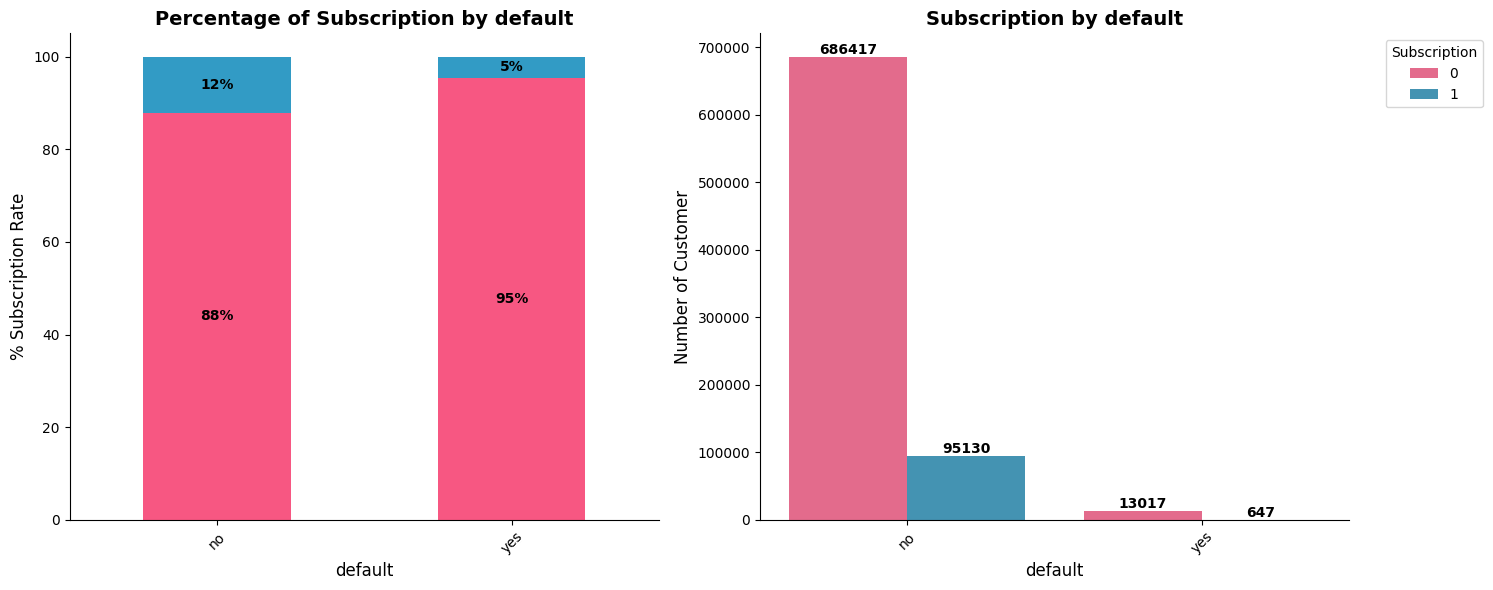


🔍 Chi-Square Test of Independence: 'default' vs. 'y'
Chi-squared statistic: 700.424
Degrees of freedom: 1
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'default' and 'y'.

📈 Standardized Residuals:
y           0      1
default             
no      -1.20   3.26
yes      9.11 -24.62



🔍 Chi-Square Test of Independence: 'housing' vs. 'y'
Chi-squared statistic: 18562.637
Degrees of freedom: 1
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'housing' and 'y'.

📈 Standardized Residuals:
y            0      1
housing              
no      -35.03  94.66
yes      31.76 -85.83



🔍 Chi-Square Test of Independence: 'loan' vs. 'y'
Chi-squared statistic: 5198.610
Degrees of freedom: 1
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'loan' and 'y'.

📈 Standardized Residuals:
y         0      1
loan              
no    -9.40  25.40
yes   23.19 -62.67


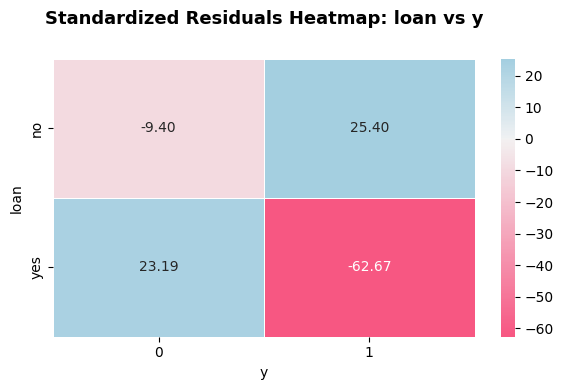


🔍 Chi-Square Test of Independence: 'contact' vs. 'y'
Chi-squared statistic: 20208.170
Degrees of freedom: 2
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'contact' and 'y'.

📈 Standardized Residuals:
y              0       1
contact                 
cellular  -27.36   73.92
telephone  -3.20    8.65
unknown    40.93 -110.61


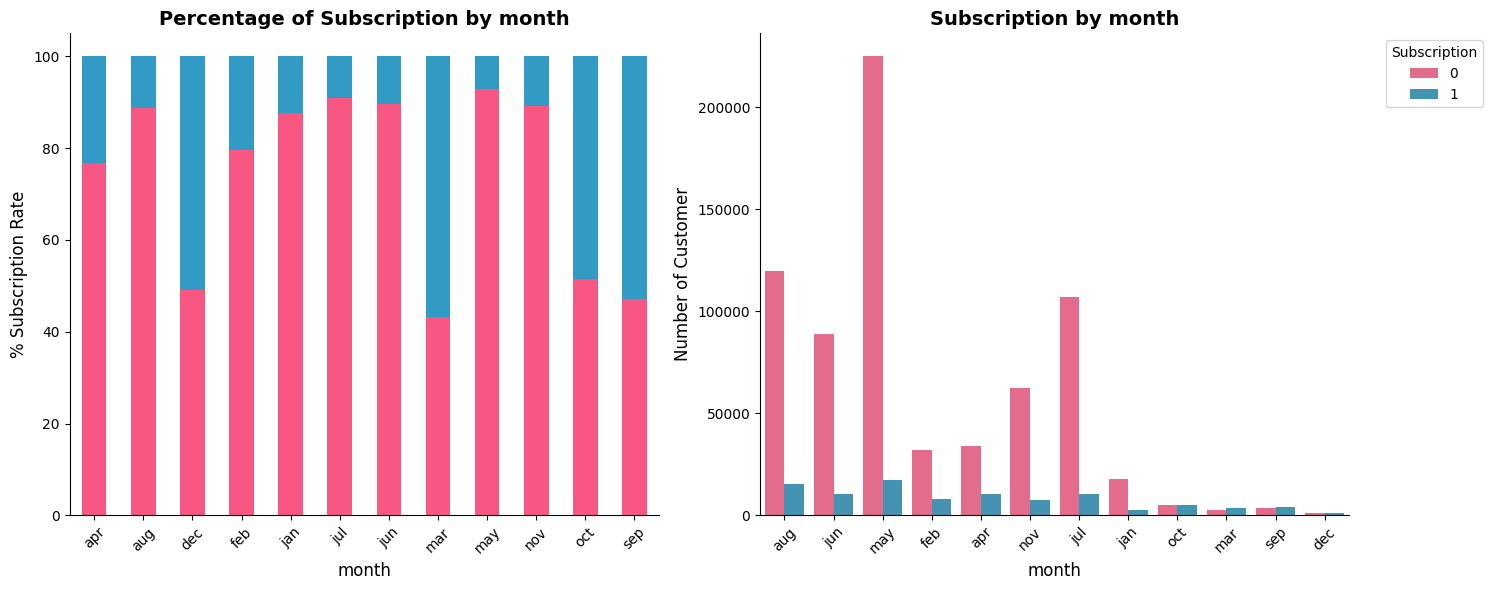


🔍 Chi-Square Test of Independence: 'month' vs. 'y'
Chi-squared statistic: 55205.121
Degrees of freedom: 11
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'month' and 'y'.

📈 Standardized Residuals:
y          0       1
month               
apr   -25.26   68.27
aug     3.28   -8.87
dec   -19.79   53.49
feb   -17.91   48.40
jan    -0.32    0.87
jul    10.82  -29.23
jun     5.64  -15.23
mar   -37.77  102.06
may    25.88  -69.94
nov     3.13   -8.47
oct   -38.88  105.06
sep   -39.00  105.39



🔍 Chi-Square Test of Independence: 'poutcome' vs. 'y'
Chi-squared statistic: 75784.635
Degrees of freedom: 3
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'poutcome' and 'y'.

📈 Standardized Residuals:
y             0       1
poutcome               
failure   -2.79    7.54
other     -6.37   17.22
success  -93.73  253.30
unknown   17.14  -46.31


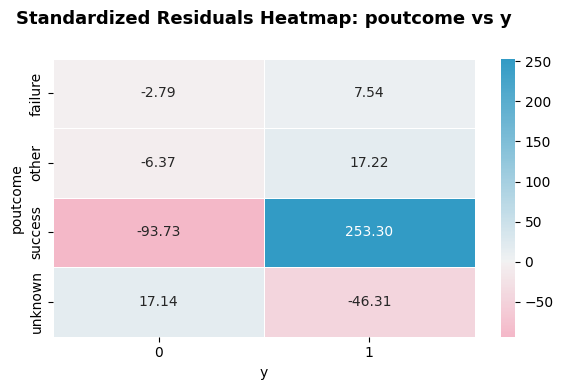

In [24]:
from IPython.core.display import HTML
# defining function for plotting
def bivariate_percent_plot(cat, df, figsize=(15, 6), order = None, rot = 0):

    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:green;'><b>Distribution of {cat} by Subscription</b></h2>"))
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=figsize)
    # Plot 1
    # Calculate the total number of each "cat" by Subscription
    grouped = df.groupby([cat, "y"]).size().unstack(fill_value=0)
    # Calculate the percentages
    percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100
    if order is not None:
        percentages = percentages.loc[order]
        labels = order
    else:
        labels = percentages.index

    # That method uses HUSL colors, so you need hue, saturation, and lightness.
    # I used hsluv.org to select the colors of this chart.
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    # Draw stacked bar plot
    ax[0] = percentages.plot(kind="bar", stacked=True, cmap=cmap, ax = ax[0], use_index=True)
    if feature in ["job", "month"]:
        pass
    else:
        for container in ax[0].containers:
            ax[0].bar_label(container, fmt="%1.0f%%", label_type="center", weight="bold", fontsize=10)

    ax[0].set_title(f"Percentage of Subscription by {cat}", fontsize=14, weight="bold")
    ax[0].set_xlabel(f"{cat}", fontsize=12)
    ax[0].set_ylabel("% Subscription Rate", fontsize=12)
    ax[0].set_xticklabels(labels = labels, rotation = 45)
    ax[0].legend_.remove()
    sns.despine(left=False, bottom=False, ax=ax[0])

    # Plot 2
    sns.countplot(data=df, hue = "y", x = cat,
                palette=color(n_colors=2), ax=ax[1], order=order)
    # Show value for each bar.
    if feature in ["job", "month"]:
        pass
    else:
        for container in ax[1].containers:
            ax[1].bar_label(container, fmt="%d", label_type="edge", fontsize=10, weight="bold")

    ax[1].set_title(f"Subscription by {cat}", fontsize=14, weight="bold")
    ax[1].set_xlabel(f"{cat}", fontsize=12)
    ax[1].set_ylabel("Number of Customer", fontsize=12)
    ax[1].legend(title="Subscription", bbox_to_anchor=(1.05, 1), loc="upper left")
    ax[1].set_xticklabels(labels = ax[1].get_xticklabels(), rotation = 45)

    sns.despine(left=False, bottom=False, ax=ax[1])
    plt.tight_layout()
    plt.show()

    cal_ChiSquare(cat_feature=cat, target_feature="y", df=df, show_residuals=True)

for feature in cat_features:
    bivariate_percent_plot(cat=feature, df= df_train_combined)

### Insight for Categorical Features vs Subscription

`job`

There is a clear association between job type and subscription behavior. Groups like `student`, `retired`, and `management` show high subscription rates, while groups such as `blue-collar`, `services`, and `housemaid` tend to subscribe less than expected.

`marital`

* **Single customers** are the most responsive to the campaign and exceed expected subscription numbers.
* **Married and divorced customers** show **lower-than-expected interest**, suggesting they may require different marketing strategies.

`education`

* Customers with **tertiary education** are **more likely to subscribe** than expected.
* On the other hand, customers with **primary or secondary education** are **less likely to subscribe**.
* The **“unknown” group** also performs slightly better than expected, but with a smaller effect.

`default`

* Customers with **no history of defaulting on credit** are **slightly more likely to subscribe** than expected.
* In contrast, customers with a **default history are significantly less likely to subscribe** than expected.
* This implies that **default risk is negatively associated** with subscription behavior.

`housing`

* Customers **without a housing loan** are **much more likely to subscribe** than statistically expected.
* In contrast, those **with a housing loan** are **less likely to subscribe** than expected.
* This might suggest that customers with **existing financial obligations** (e.g., a mortgage) are more cautious or **less inclined to take on additional commitments**, such as long-term deposits or financial products.

`loan`

* Customers **without a personal loan** tend to **subscribe more than expected**, suggesting this group might be more open to additional financial commitments.
* Meanwhile, customers **with a personal loan** are **significantly less likely to subscribe**, possibly because they already have financial obligations that make them more cautious about new products.

`contact`

* **Cellular contact** is highly effective, leading to **many more subscriptions than expected**.
* **Telephone contact** performs moderately better than expected.
* **Unknown contact method** is **strongly associated with low subscription rates**, indicating it's an ineffective or poorly recorded channel.

`month`

* Months like **September, October, and March** are golden periods for customer outreach, as the number of subscriptions far exceeds expectations.
* In contrast, **May, July, and June** show **lower-than-expected subscription rates**, even though a large number of customers were contacted (as seen in the right-hand chart).

`poutcome`

* **Success outcome** is **extremely effective**, leading to **far more subscriptions than expected** — a highly impactful predictor of conversion.
* **Other outcomes** perform moderately better than expected, suggesting **some positive influence**, but not dominant.
* **Failure outcomes** show **slightly more conversions than expected**, indicating **limited yet noticeable effect**.
* **Unknown outcomes** are **strongly associated with fewer subscriptions than expected**, highlighting an **ineffective or unreliable campaign history**.

### Summary Table: Feature Insights vs. Subscription

| Feature       | Insight Summary                                                                                                                                                                                      |
| ------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **job**       | `Student`, `retired`, and `management` groups have more subscriptions than expected, while `blue-collar`, `services`, and `housemaid` have fewer.                                                    |
| **marital**   | `Single` customers are more responsive than expected, whereas `married` and `divorced` customers are less responsive.                                                                                |
| **education** | `Tertiary`-educated customers subscribe more than expected. `Primary` and `secondary` levels show lower subscription rates. The `unknown` group performs slightly better than expected.              |
| **default**   | Customers with no credit default history subscribe slightly more than expected, while those with a default history are significantly less likely to subscribe.                                       |
| **housing**   | Customers without a housing loan subscribe significantly more, while those with a housing loan subscribe less than expected.                                                                         |
| **loan**      | Customers without a personal loan are more likely to subscribe, while those with a personal loan are significantly less likely.                                                                      |
| **contact**   | `Cellular` contact is highly effective. `Telephone` performs slightly better than expected. `Unknown` contact is ineffective.                                                                        |
| **month**     | `September`, `October`, and `March` see more subscriptions than expected, while `May`, `July`, and `June` underperform despite high contact volume.                                                  |
| **poutcome**  | `Success` outcomes result in far more subscriptions than expected. `Other` outcomes show moderate impact. `Failure` shows limited effect. `Unknown` is strongly associated with fewer subscriptions. |
| **age**       | Although the average age is similar, the age distribution differs significantly between groups, making age a relevant factor.                                                                        |
| **balance**   | Subscribed customers have notably higher median and mean balances, suggesting financial status may influence subscription.                                                                           |
| **day**       | Subscribed customers tend to be contacted earlier in the month. This timing may improve subscription likelihood.                                                                                     |
| **duration**  | Subscribed customers have longer call durations, possibly indicating deeper engagement or interest.                                                                                                  |
| **campaign**  | Non-subscribed customers tend to receive slightly more campaign calls than subscribers.                                                                                                              |
| **pdays**     | Customers recently contacted again (with lower `pdays`) are more likely to subscribe, showing the value of timely follow-ups.                                                                        |
| **previous**  | Subscribed customers had more prior contacts on average, suggesting that past interactions can improve subscription outcomes.

## Multivariate Analysis (Let's address some business questions)

In [25]:
df_train_ba = df_train_combined.copy()

### Customer Targeting & Segmentation

#### Which customer profiles (job, marital status, education level) are the most promising for future campaigns?

**Answer**

Based on the **Distribution of `job`, `marital`, and `education` by subscription status**, we can identify clear patterns in customer responsiveness:

* **Job**:
  Customers working as **`student`**, **`retired`**, or in **`management`** roles show **significantly higher subscription rates** than other job categories.

* **Marital Status**:
  The **`single`** group stands out as the most responsive segment in terms of campaign conversions.

* **Education Level**:
  Customers with a **`tertiary` education** subscribe more than expected, indicating stronger interest and financial awareness.

These segments represent the **most promising target audiences** for upcoming marketing campaigns and should be prioritized in strategy design.

#### Are there customer segments (e.g., `blue-collar`, `married`, `low education`) that require a more tailored or persuasive marketing approach?

**Answer**
Based on the **Distribution of `job`, `marital`, and `education` by subscription status**, we can identify clear patterns in customer responsiveness:

Segments such as:

* **`blue-collar`, `housemaid`** (job)
* **`married`, `divorced`** (marital status)
* **`primary`, `secondary`** (education)

→ are **less responsive** but still **strategically important**. With **customized messaging, simplified communication, and more personalized support**, these segments could become valuable conversion opportunities.

#### Should we deprioritize or approach differently customers with a history of default, personal loans, or housing loans?

**Answer**

Based on the **Distribution of `default`, `loan`, and `housing` by subscription status**

> **Should we deprioritize or change our approach?** <br>
> → **Yes.** <br>
> Customers with **credit defaults and personal loans** should generally be **deprioritized** unless they have strong compensating factors. <br>
> Those with **housing loans** may still be approached but require **careful positioning and messaging** to avoid perceived financial pressure.

### Contact Strategy

####  Is it beneficial to avoid contacting customers too many times within the same campaign (based on the `campaign` feature)?

**Answer:**

**Likely Yes — Excessive contact may be counterproductive**

Analysis of the `campaign` feature shows that:

* Customers who **did not subscribe (`y = 0`)** tend to have a **higher median and mean number of contact attempts** within the same campaign.
* In contrast, those who **did subscribe (`y = 1`)** were generally contacted **fewer times**.

This suggests that **repeated calls within a single campaign may lead to diminishing returns** or even **negatively impact customer perception**.

#### Should we optimize the timing of calls (e.g., earlier in the month or during months like March, September, October)?

**Answer:**

**Yes — Certain months consistently outperform expectations**

Base on Distribution of month by Subscription

| Month   | Residual (y=1) | Interpretation                                         |
| ------- | -------------- | ------------------------------------------------------ |
| **Sep** | +102.62        | Top-performing month – “golden window”                 |
| **Oct** | +102.02        | Extremely effective                                    |
| **Mar** | +98.84         | Very high success potential                            |
| **Apr** | +67.30         | Well above expectations                                |
| **Feb** | +48.10         | Stable and positive impact                             |
| **May** | -67.83         | Highly underperforming – should be avoided if possible |
| **Jul** | -28.54         | Lower-than-average responsiveness                      |
| **Aug** | -8.77          | Slightly underperforms                                 |

* Prioritize calling during: March, September, October, April, February.
* Reduce or avoid calling during: May, July, August.

### Re-engagement & Follow-ups

#### How effective are follow-up contacts (`pdays`, `previous`) in increasing the likelihood of subscription?

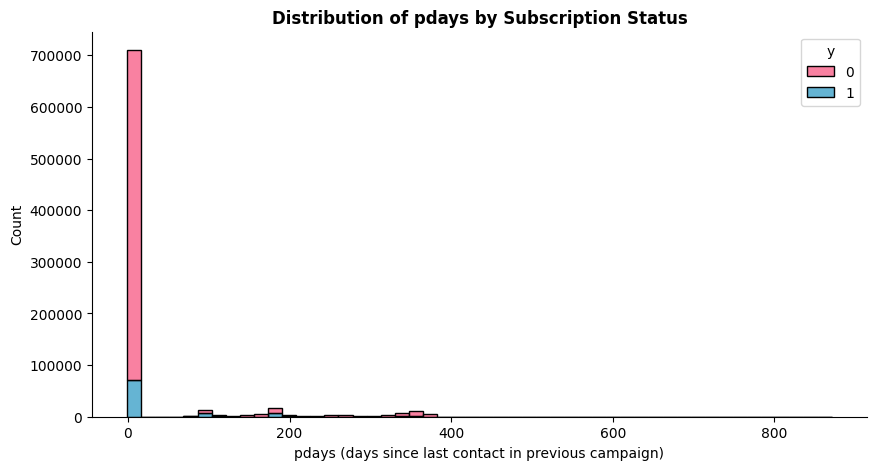

In [26]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_train_ba, x="pdays", hue="y", multiple="stack", bins=50, palette=color(n_colors=2))
plt.title("Distribution of pdays by Subscription Status", weight = "bold")
plt.xlabel("pdays (days since last contact in previous campaign)")
plt.ylabel("Count")
sns.despine(left=False, bottom=False)
plt.show()

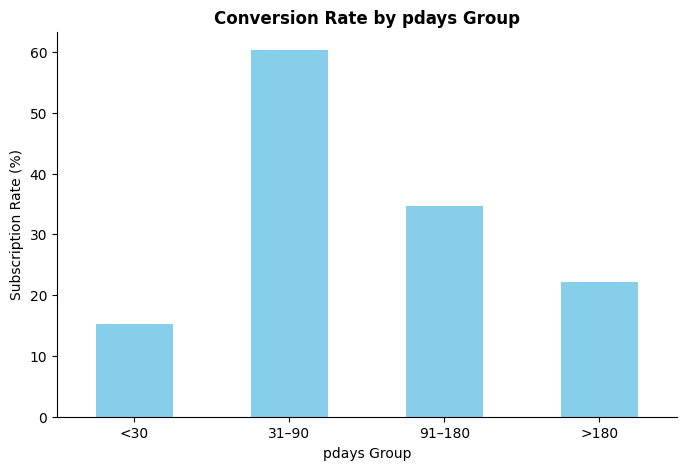

In [27]:
# Create pdays groups (based on number of days since last contact)
df_train_ba["pdays_group"] = pd.cut(
    df_train_ba["pdays"],
    bins=[-1, 30, 90, 180, 999],
    labels=["<30", "31–90", "91–180", ">180"]
)

# Calculate subscription rate for each pdays group
pdays_conv = df_train_ba.groupby("pdays_group")["y"].value_counts(normalize=True).unstack().fillna(0)
pdays_conv.columns = ["No", "Yes"]
pdays_conv["Conversion Rate (%)"] = pdays_conv["Yes"] * 100

# Plot the subscription rate by pdays group
pdays_conv["Conversion Rate (%)"].plot(kind="bar", color="skyblue", figsize=(8, 5))
plt.title("Conversion Rate by pdays Group", weight="bold")
plt.ylabel("Subscription Rate (%)")
plt.xlabel("pdays Group")
sns.despine(left=False, bottom=False)
plt.xticks(rotation=0)
plt.show()

                      No       Yes  Conversion Rate (%)
followup_early                                         
False           0.888511  0.111489            11.148868
True            0.397309  0.602691            60.269058


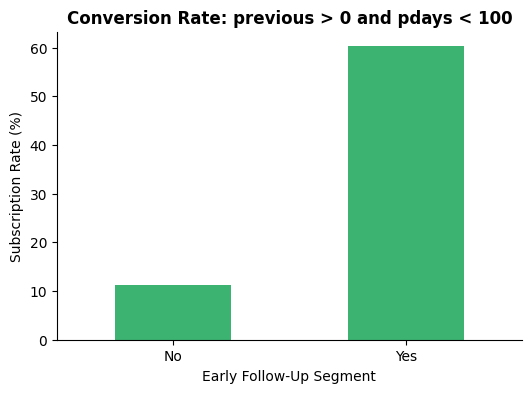

In [28]:
# Flag customers who meet both conditions:
# - Have been previously contacted (previous > 0)
# - Were re-contacted within the last 100 days (pdays < 100)
df_train_ba["followup_early"] = ((df_train_ba["previous"] > 0) & (df_train_ba["pdays"] < 100))

# Calculate subscription rate for each group (followup_early = True/False)
conversion_rate = df_train_ba.groupby("followup_early")["y"].value_counts(normalize=True).unstack().fillna(0)
conversion_rate.columns = ["No", "Yes"]
conversion_rate["Conversion Rate (%)"] = conversion_rate["Yes"] * 100

# Print the subscription rate table
print(conversion_rate)

# Plot the conversion rate by early follow-up segment
conversion_rate["Conversion Rate (%)"].plot(kind="bar", color="mediumseagreen", figsize=(6, 4))
sns.despine(left=False, bottom=False)
plt.title("Conversion Rate: previous > 0 and pdays < 100", weight="bold")
plt.xticks([0, 1], ["No", "Yes"], rotation=0)
plt.ylabel("Subscription Rate (%)")
plt.xlabel("Early Follow-Up Segment")
plt.show()

**Answer**

**Yes — Timely and well-targeted follow-ups significantly boost conversion rates.**

**1. Distribution of `pdays` by Subscription Status**

* A **large majority of customers** were contacted again **very shortly after** the previous campaign (`pdays ≈ 0`).
* However, only a **small portion of these customers subscribed** (`y = 1`), despite the high volume.

This suggests that **immediate follow-ups alone are not effective**, unless other supporting factors are present (e.g., prior engagement).

**2. Conversion Rate by `pdays` Group**

| `pdays` Group | Conversion Rate (%) |
| ------------- | ------------------- |
| `<30`         | \~16%               |
| `31–90`       | **\~63%**           |
| `91–180`      | \~36%               |
| `>180`        | \~23%               |

* Customers contacted **between 31 and 90 days** after the previous campaign **had the highest conversion rate**.
* Both **too early (<30 days)** and **too late (>180 days)** contact attempts were less effective.

The **optimal follow-up window** appears to be **1–3 months** after the last interaction.

**3. Conversion Rate: `previous > 0` and `pdays < 100`**

| Segment Condition                                    | Conversion Rate (%) |
| ---------------------------------------------------- | ------------------- |
| `followup_early = False` (no early follow-up)        | **11.18%**          |
| `followup_early = True` (previous > 0 & pdays < 100) | **62.07%**          |

* Customers who had **prior contact history** and were **followed up within 100 days** showed **dramatically higher subscription rates** (over 5x higher).
* This demonstrates the importance of **both timing and past engagement** in influencing conversion.

**Conclusion**

> Re-contacting customers is highly effective — **but only when done at the right time and with the right audience**.

**Strategic Recommendations**

* **Prioritize follow-ups for customers** with `previous > 0` and `pdays` between **30 and 90 days**.
* **Avoid overly early follow-ups** (<30 days).

### Call Duration & Sales Quality

#### Do longer call durations indicate better engagement, and should training be provided to agents to improve consultation quality?

Answer

**Yes — Longer calls are clearly associated with higher subscription rates.**

**Based on Distribution of `duration` by Subscription**

* Customers who eventually **subscribed (`y = 1`)** tend to have **significantly longer call durations** than those who did not.
* Short calls (especially under 100 seconds) are heavily skewed toward the non-subscription group.
* In contrast, **the longer the call, the higher the chance of a successful conversion**.

This indicates that **call duration is a strong behavioral signal of interest** and **engagement**.

* **Train call agents** to:

  * Improve engagement techniques
  * Extend conversations meaningfully (not just longer, but more relevant)
  * Handle objections and build trust effectively

* Consider setting a **minimum effective call duration benchmark** (e.g., 100–150 seconds) based on historical success data.

#### Could we define a threshold for minimum call duration to qualify a contact as meaningful?

In [29]:
df_train_ba.groupby("y")["duration"].describe()

count        mean        std  min    25%    50%    75%     max
y                                                                   
0  699434.0  204.795540  210.96092  0.0   87.0  124.0  203.0  4918.0
1   95777.0  632.747998  356.27765  1.0  335.0  595.0  851.0  4918.0

**Answer**

 **Yes — Use median duration of subscribed customers as a practical threshold**

**Call Duration Statistics by Subscription (`y`)**

| Metric       | Not Subscribed (`y = 0`) | Subscribed (`y = 1`) |
| ------------ | ------------------------ | -------------------- |
| Mean         | 203.8 seconds            | 638.3 seconds        |
| Median (50%) | 123.0 seconds            | **609.0 seconds**    |
| 25% Quartile | 87.0 seconds             | 358.0 seconds        |
| 75% Quartile | 198.0 seconds            | 855.0 seconds        |

**Threshold Suggestion**

> Based on the data, we propose using **`609 seconds` (median of y = 1)** as the **minimum duration threshold** to classify a contact as **meaningful**.

* This threshold reflects **typical engagement level** for successfully converted calls.
* Calls shorter than this may indicate **low interest or poor interaction**.

### Campaign Effectiveness & Resource Allocation

#### How can we leverage past campaign outcomes (`poutcome = success`) to identify and replicate successful patterns?

From customers with poutcome = success, we should ask:

>What do they have in common?


🔍 Chi-Square Test of Independence: 'poutcome' vs. 'y'
Chi-squared statistic: 75784.635
Degrees of freedom: 3
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'poutcome' and 'y'.

📈 Standardized Residuals:
y             0       1
poutcome               
failure   -2.79    7.54
other     -6.37   17.22
success  -93.73  253.30
unknown   17.14  -46.31


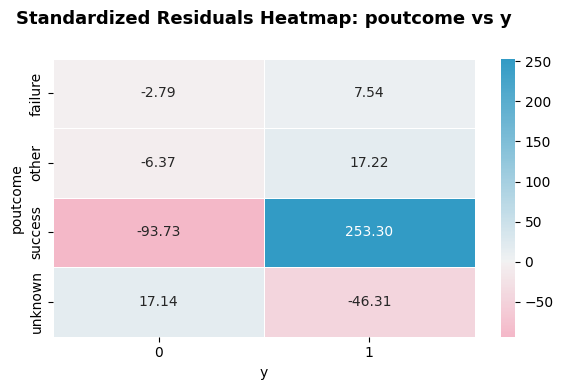

In [30]:
cal_ChiSquare(cat_feature="poutcome", target_feature="y", df=df_train_ba, show_residuals=True)

Based on the standardized residuals heatmap, we can observe the following:

| `poutcome` | Residual (y = 1) | Interpretation                                            |
| ---------- | ---------------- | --------------------------------------------------------- |
| `success`  | **+246.35**      | Extremely high — far more subscriptions than expected     |
| `other`    | **+16.15**       | Positive — more subscriptions than expected               |
| `failure`  | **+7.43**        | Mildly positive                                           |
| `unknown`  | **−44.27**       | Strongly negative — far fewer subscriptions than expected |

To simplify the variable and improve model interpretability, we can combine `success`, `other`, and `failure` into one group, since all three show positive deviation from expected conversions, while unknown behaves oppositely.

**New grouped feature**

| Original `poutcome` | New Category (`poutcome_grouped`) |
| ------------------- | --------------------------------- |
| `success`           | **"known\_positive"**             |
| `other`             | **"known\_positive"**             |
| `failure`           | **"known\_positive"**             |
| `unknown`           | **"unknown"**                     |

In [31]:
df_train_ba["poutcome_grouped"] = df_train_ba["poutcome"].replace({
    "success": "known_positive",
    "other": "known_positive",
    "failure": "known_positive",
    "unknown": "unknown"
})

##### Customer Profile Analysis

In [32]:
categorical_cols = ["job", "marital", "education"]

for col in categorical_cols:
    dist = df_train_ba.groupby(["poutcome_grouped", col]).size().unstack().fillna(0)
    dist_ratio = dist.div(dist.sum(axis=1), axis=0) * 100
    print(f"\n Distribution of {col} by poutcome grouped (in %):\n")
    display(dist_ratio.T.round(2))


 Distribution of job by poutcome grouped (in %):



poutcome_grouped  known_positive  unknown
job                                      
admin.                     12.89    10.66
blue-collar                20.47    22.93
entrepreneur                2.43     2.41
housemaid                   1.49     2.24
management                 23.79    23.20
retired                     6.07     4.54
self-employed               2.85     2.56
services                    7.99     8.67
student                     2.93     1.44
technician                 16.22    18.58
unemployed                  2.57     2.36
unknown                     0.31     0.41


 Distribution of marital by poutcome grouped (in %):



poutcome_grouped  known_positive  unknown
marital                                  
divorced                   10.65     9.93
married                    58.69    64.51
single                     30.66    25.56


 Distribution of education by poutcome grouped (in %):



poutcome_grouped  known_positive  unknown
education                                
primary                    11.18    13.64
secondary                  52.42    53.55
tertiary                   33.22    29.93
unknown                     3.19     2.88

##### Age distribution

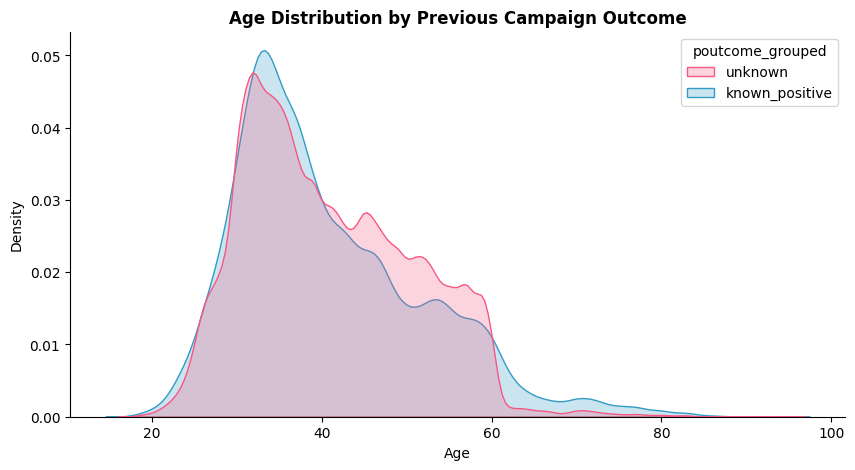

In [33]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df_train_ba, x="age", hue="poutcome_grouped", common_norm=False,
            fill=True, palette=color(n_colors=2))
sns.despine(left=False, bottom=False)
plt.title("Age Distribution by Previous Campaign Outcome", weight="bold")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

##### Financial Behavior Analysis

In [34]:
financial_cols = ["balance", "housing", "loan", "default"]

for col in financial_cols:
    if df_train_ba[col].dtype == "object" or df_train_ba[col].dtype == "bool":
        # Categorical
        dist = df_train_ba.groupby(["poutcome_grouped", col]).size().unstack().fillna(0)
        dist_ratio = dist.div(dist.sum(axis=1), axis=0) * 100
        print(f"\n Distribution of {col} by poutcome_grouped (in %):\n")
        display(dist_ratio.T.round(2))
    else:
        # Numerical (e.g., balance)
        summary = df_train_ba.groupby("poutcome_grouped")[col].describe()
        print(f"\n Summary of {col} by poutcome_grouped:\n")
        display(summary.round(2))



 Summary of balance by poutcome_grouped:



count     mean      std     min   25%    50%     75%  \
poutcome_grouped                                                            
known_positive     85802.0  1561.97  3183.48 -8019.0  15.0  786.0  1779.0   
unknown           709409.0  1170.86  2802.45 -8019.0   0.0  605.0  1354.0   

                       max  
poutcome_grouped            
known_positive     99218.0  
unknown           102127.0


 Distribution of housing by poutcome_grouped (in %):



poutcome_grouped  known_positive  unknown
housing                                  
no                         36.05    46.22
yes                        63.95    53.78


 Distribution of loan by poutcome_grouped (in %):



poutcome_grouped  known_positive  unknown
loan                                     
no                         88.16    85.61
yes                        11.84    14.39


 Distribution of default by poutcome_grouped (in %):



poutcome_grouped  known_positive  unknown
default                                  
no                         99.19    98.17
yes                         0.81     1.83

##### Contact Strategy Analysis

In [35]:
contact_cols = ["contact", "duration", "month", "campaign"]

for col in contact_cols:
    if df_train_ba[col].dtype == "object":
        dist = df_train_ba.groupby(["poutcome_grouped", col]).size().unstack().fillna(0)
        dist_ratio = dist.div(dist.sum(axis=1), axis=0) * 100
        print(f"\n Distribution of {col} by poutcome_grouped (in %):\n")
        display(dist_ratio.T.round(2))
    else:
        summary = df_train_ba.groupby("poutcome_grouped")[col].describe()
        print(f"\n Summary of {col} by poutcome_grouped:\n")
        display(summary.round(2))


 Distribution of contact by poutcome_grouped (in %):



poutcome_grouped  known_positive  unknown
contact                                  
cellular                   93.33    61.44
telephone                   6.12     4.14
unknown                     0.56    34.42


 Summary of duration by poutcome_grouped:



count    mean     std  min    25%    50%    75%     max
poutcome_grouped                                                            
known_positive     85802.0  301.06  277.03  1.0  105.0  168.0  489.0  4903.0
unknown           709409.0  250.93  270.57  0.0   90.0  131.0  308.0  4918.0


 Distribution of month by poutcome_grouped (in %):



poutcome_grouped  known_positive  unknown
month                                    
apr                        12.87     4.68
aug                         6.32    18.28
dec                         1.21     0.18
feb                        10.54     4.40
jan                         5.07     2.25
jul                         2.65    16.25
jun                         3.43    13.54
mar                         1.82     0.66
may                        33.76    30.05
nov                        14.01     8.18
oct                         4.23     0.89
sep                         4.09     0.63


 Summary of campaign by poutcome_grouped:



count  mean   std  min  25%  50%  75%   max
poutcome_grouped                                                
known_positive     85802.0  1.98  1.54  1.0  1.0  1.0  2.0  43.0
unknown           709409.0  2.66  2.84  1.0  1.0  2.0  3.0  63.0

##### Historical Engagement (pdays, previous)

In [36]:
engagement_cols = ["previous", "pdays"]

for col in engagement_cols:
    summary = df_train_ba.groupby("poutcome_grouped")[col].describe()
    print(f"\n Summary of {col} by poutcome_grouped:\n")
    display(summary.round(2))


 Summary of previous by poutcome_grouped:



count  mean   std  min  25%  50%  75%    max
poutcome_grouped                                                 
known_positive     85802.0  2.91  3.29  0.0  1.0  2.0  3.0  275.0
unknown           709409.0  0.00  0.03  0.0  0.0  0.0  0.0   11.0


 Summary of pdays by poutcome_grouped:



count    mean     std  min    25%    50%    75%    max
poutcome_grouped                                                           
known_positive     85802.0  225.25  109.54 -1.0  141.0  188.0  337.0  871.0
unknown           709409.0   -0.99    2.07 -1.0   -1.0   -1.0   -1.0  687.0

In [37]:
conversion = df_train_ba.groupby("poutcome_grouped")["y"].value_counts(normalize=True).unstack().fillna(0)
conversion["Conversion Rate (%)"] = conversion[1] * 100
display(conversion.round(2))

y                    0     1  Conversion Rate (%)
poutcome_grouped                                 
known_positive    0.72  0.28                27.82
unknown           0.90  0.10                10.14

**Answer**

**1. Customer Profile:**

* **Job:** Customers in **management**, **technician**, and **blue-collar** roles appear frequently in the `known_positive` group. These segments may be more responsive to well-executed campaigns.
* **Marital Status:** A higher share of **single** customers in the `known_positive` group suggests this group is more likely to convert.
* **Education:** Customers with **tertiary education** are more prevalent among the `known_positive` group, making them a high-potential target.
* **Age:** The age distribution of the `known_positive` group leans toward **younger adults (around 30–40 years old)**, suggesting higher receptiveness in this range.

**2. Financial Behavior:**

* **Account Balance (`balance`):** The `known_positive` group has significantly **higher mean and median balances**, indicating that financially stable customers are more likely to subscribe.
* **Housing & Personal Loans:** `known_positive` customers are **less likely to have housing or personal loans**, suggesting that those with fewer financial obligations are more open to new offers.
* **Default History:** Very few `known_positive` customers have defaulted on credit — **creditworthiness** is a strong predictor of response.

**3. Contact Strategy:**

* **Contact Channel:** Nearly all `known_positive` cases used **cellular** contact. Future campaigns should prioritize this channel.
* **Call Duration (`duration`):** The `known_positive` group had **longer average call durations**, highlighting the importance of **quality conversations** in converting customers.
* **Month of Contact:** Contacts made in **May, April, November, and February** were more likely to lead to success — future campaigns should align with these high-performing periods.
* **Number of Contact Attempts (`campaign`):** The `known_positive` group had **fewer contact attempts**, implying that **over-contacting may reduce effectiveness**.

**4. Historical Engagement:**

* **Previous Contacts (`previous`):** `known_positive` customers had **more previous interactions**, showing that **re-engagement campaigns are valuable**.
* **Recency (`pdays`)**: The `known_positive` group typically had a non-zero `pdays` value, meaning they had been contacted before — and **recency of engagement contributes to conversion**.

**Strategy Summary:**

To **replicate past campaign success**, future strategies should:

* Focus on segments with **younger, single, higher-educated, and financially stable** profiles.
* **Use mobile contact** and ensure **sufficient call duration** for deeper engagement.
* **Avoid excessive follow-ups** during the same campaign.
* Prioritize **recontacting previously engaged customers**, especially those with positive history.
* Launch campaigns during **proven high-conversion months** (e.g., May, Apr, Nov, Feb).

#### Should we reduce investment in channels or periods with poor historical performance (e.g., `unknown` contact, `May–July`)?

**Answer**

**Contact Method: `unknown`**

* Based on the distribution table and the chart of `poutcome_grouped vs contact`:

  | `poutcome_grouped` | % using `unknown` contact |
  | ------------------ | ------------------------- |
  | known\_positive    | **0.53%**                 |
  | unknown            | **34.38%**                |

* **Analysis:**

  * The `unknown` contact method is **rarely present** in the group with successful campaign outcomes.
  * Nearly **one-third of contacts with unknown channel** fall into the unsuccessful campaign group → This strongly suggests **ineffectiveness or incomplete data recording**.

**Conclusion:** **Investment should be reduced** for contacts via the `unknown` channel, and **data recording processes should be improved** if the issue is system-related.

**Timing of Contact (feature `month`)**

* Based on the distribution table `month vs poutcome_grouped`:

  | Month    | % in `known_positive` | % in `unknown` |
  | -------- | --------------------- | -------------- |
  | **June** | 3.38%                 | 13.54%         |
  | **July** | 2.60%                 | 16.15%         |

* **Analysis:**

  * **June & July** appear more frequently in the group without positive outcomes → suggesting they are **less effective months** for outreach.

**Conclusion:**

* **June and July should be de-prioritized**, as customer response tends to be lower during this period.

### Financial Profile & Readiness

#### Should we prioritize customers with higher account balances for premium financial products?

In [38]:
df_train_ba.groupby("y")["balance"].describe()

count         mean          std     min    25%     50%     75%       max
y                                                                             
0  699434.0  1088.398361  2685.033522 -8019.0    0.0   579.0  1291.0  102127.0
1   95777.0  2123.447289  3712.462176 -8019.0  553.0  1101.0  2544.0   99218.0

**Answer**

**Yes, we should.**
Based on the distribution of `balance` by subscription status:

| Metric              | Not Subscribed (y=0) | Subscribed (y=1) |
| ------------------- | -------------------- | ---------------- |
| **Mean**            | €1,075               | **€2,142**       |
| **Median**          | €584                 | **€1,134**       |
| **75th Percentile** | €1,288               | **€2,552**       |

**Insights:**

* Customers who subscribed to the term deposit had **significantly higher account balances** on average and at all percentiles.
* This suggests that **financial capacity is positively associated** with campaign success.

**Recommendation:**

Prioritize high-balance customers when marketing **premium financial products**.

#### How do financial obligations (housing/personal loans) affect a customer's openness to new financial offers?

In [39]:
housing_conv = df_train_ba.groupby("housing")["y"].value_counts(normalize=True).unstack().fillna(0)
housing_conv["Conversion Rate (%)"] = housing_conv[1] * 100
print(housing_conv)
print("\n")
loan_conv = df_train_ba.groupby("loan")["y"].value_counts(normalize=True).unstack().fillna(0)
loan_conv["Conversion Rate (%)"] = loan_conv[1] * 100
print(loan_conv)

y               0         1  Conversion Rate (%)
housing                                         
no       0.824712  0.175288            17.528770
yes      0.924648  0.075352             7.535207


y            0         1  Conversion Rate (%)
loan                                         
no    0.868890  0.131110            13.111027
yes   0.944485  0.055515             5.551546


**Answer**

Results from the subscription rate (`Conversion Rate`) by loan status:

| Loan Status                            | Conversion Rate (%) |
| -------------------------------------- | ------------------- |
| **No housing loan** (`housing = no`)   | **17.58%**          |
| **Has housing loan** (`housing = yes`) | **7.53%**           |
| **No personal loan** (`loan = no`)     | **13.14%**          |
| **Has personal loan** (`loan = yes`)   | **5.47%**           |

**Insights:**

* Customers with **housing** or **personal loans** have **significantly lower subscription rates** compared to those without loans.
* Notably, customers with **personal loans** appear **highly disengaged** from term deposit products, with a conversion rate of only **\~5.5%**.
* This suggests that customers with ongoing debt obligations may be **financially constrained**, making them **less willing to commit to long-term financial products** like term deposits.

### Multi-Feature Business Questions

#### Are younger, single customers with higher balances and no loan obligations more likely to subscribe?

In [40]:
# Create condition columns for segmentation
df_train_ba["young"] = df_train_ba["age"] < df_train_ba["age"].median()
df_train_ba["high_balance"] = df_train_ba["balance"] > df_train_ba["balance"].median()
df_train_ba["no_loans"] = (df_train_ba["housing"] == "no") & (df_train_ba["loan"] == "no")
df_train_ba["single"] = df_train_ba["marital"] == "single"

# Combine conditions to define the target group
df_train_ba["target_group"] = (
    df_train_ba["young"] &
    df_train_ba["single"] &
    df_train_ba["high_balance"] &
    df_train_ba["no_loans"]
)

# Calculate conversion rate
grouped = df_train_ba.groupby("target_group")["y"].value_counts(normalize=True).unstack().fillna(0)
grouped.columns = ["No", "Yes"]
grouped["Conversion Rate (%)"] = grouped["Yes"] * 100
grouped = grouped.reset_index()

# Plot the bar chart
plt.figure(figsize=(6, 4))
sns.barplot(data=grouped, x="target_group", y="Conversion Rate (%)", palette=color(n_colors=2))
sns.despine(left=False, bottom=False)
plt.xticks([0, 1], ["Others", "Young, Single,\nHigh Balance,\nNo Loans"])
plt.ylabel("Subscription Rate (%)")
plt.xlabel("")
plt.title("Conversion Rate: Target Group vs Others", weight="bold")
plt.tight_layout()
plt.show()

**Answer**

**Young, single customers with high account balances and no loan obligations** have a **subscription rate of 35%**, which is **more than 3 times higher** than the rest of the customer base (**\~11%**).

#### Do customers with a tertiary education and no credit default respond better to longer calls via cellular contact?

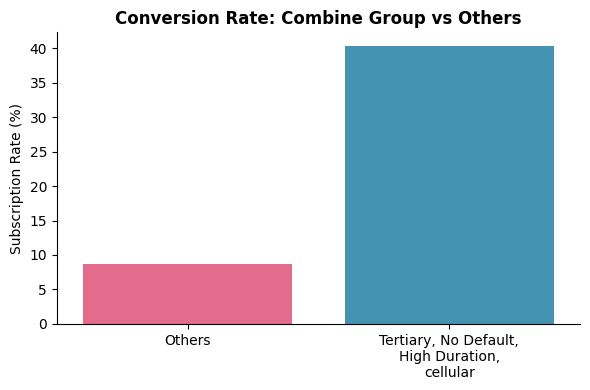

In [41]:
# Create condition columns for segmentation
df_train_ba["tertiary"] = df_train_ba["education"] == "tertiary"
df_train_ba["no_default"] = df_train_ba["default"] == "no"
df_train_ba["high_duration"] = df_train_ba["duration"] >= df_train_ba["duration"].median()
df_train_ba["cellular"] = df_train_ba["contact"] == "cellular"

# Combine conditions to define the target group
df_train_ba["Combine_group"] = (
    df_train_ba["tertiary"] &
    df_train_ba["no_default"] &
    df_train_ba["high_duration"] &
    df_train_ba["cellular"]
)

# Calculate conversion rate
grouped = df_train_ba.groupby("Combine_group")["y"].value_counts(normalize=True).unstack().fillna(0)
grouped.columns = ["No", "Yes"]
grouped["Conversion Rate (%)"] = grouped["Yes"] * 100
grouped = grouped.reset_index()

# Plot the bar chart
plt.figure(figsize=(6, 4))
sns.barplot(data=grouped, x="Combine_group", y="Conversion Rate (%)", palette=color(n_colors=2))
sns.despine(left=False, bottom=False)
plt.xticks([0, 1], ["Others", "Tertiary, No Default,\nHigh Duration,\ncellular"])
plt.ylabel("Subscription Rate (%)")
plt.xlabel("")
plt.title("Conversion Rate: Combine Group vs Others", weight="bold")
plt.tight_layout()
plt.show()

**Answer**

Customers with **tertiary education**, **no credit default**, contacted via **cellular**, and who experienced a **longer call duration** show a **significantly higher subscription rate** compared to others.

* **Conversion rate** for this segment exceeds **40%**, while the general population remains below **10%**.
* This suggests that **investing in quality, longer calls targeting financially reliable and well-educated clients via mobile** is a highly effective strategy.

#### Which combinations of job type and month lead to the highest subscription rates?

In [42]:
# Calculate the conversion rate for each (job, month) combination
job_month_conv = (
    df_train_ba.groupby(["job", "month"])["y"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
    .reset_index()
)

# Rename columns for clarity
job_month_conv.columns.name = None
job_month_conv.rename(columns={0: "No", 1: "Yes"}, inplace=True)
job_month_conv["Conversion Rate (%)"] = job_month_conv["Yes"] * 100

# Sort by highest conversion rate
job_month_conv_sorted = job_month_conv.sort_values("Conversion Rate (%)", ascending=False)

# Display the top 10 combinations with highest subscription rates
top10 = job_month_conv_sorted.head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=top10, x="Conversion Rate (%)", y=top10["job"] + " | " + top10["month"], palette="viridis")
plt.title("Top 10 Job-Month Combinations by Subscription Rate", weight="bold")
plt.xlabel("Subscription Rate (%)")
plt.ylabel("Job | Month")
plt.grid(axis="x")
plt.tight_layout()
plt.show()


**Answer**

* **March** dominates the top-performing combinations, especially for:

  * **Management**
  * **Self-employed**
  * **Services**
  * **Retired**
  * **Unemployed**
  * **Technician**
* **December** also appears as a strong month for:

  * **Services**
  * **Technician**
  * **Student**
* The highest conversion rate is over **60%**, observed in **Management | March**.

#### Is there an optimal contact strategy (channel, day, call length) for high-value customers (with high `balance` and `no default`)?

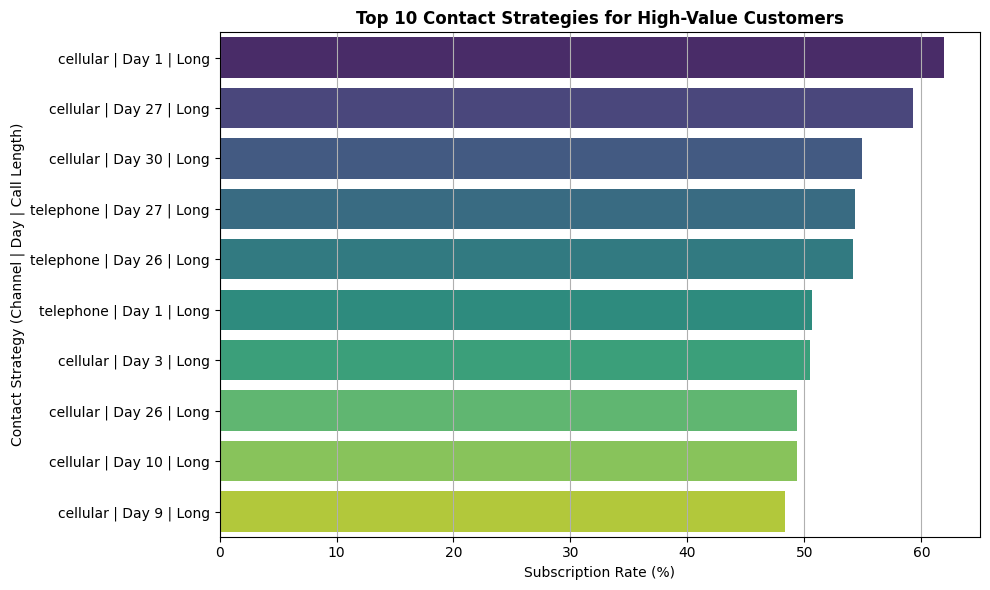

In [43]:
# Create a flag for high-value customers
df_train_ba["high_balance"] = df_train_ba["balance"] > df_train_ba["balance"].median()
df_train_ba["no_default"] = df_train_ba["default"] == "no"
df_train_ba["high_value"] = df_train_ba["high_balance"] & df_train_ba["no_default"]

# Create a column for call duration groups (low vs. high)
df_train_ba["long_call"] = df_train_ba["duration"] >= df_train_ba["duration"].median()

# Analyze by contact strategy: channel, day, and call length
strategy_cols = ["contact", "day", "long_call"]

# Group by high_value + contact strategy
conversion = (
    df_train_ba.groupby(["high_value"] + strategy_cols)["y"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
    .reset_index()
)

# Rename columns and calculate conversion rate
conversion.columns.name = None
conversion.rename(columns={0: "No", 1: "Yes"}, inplace=True)
conversion["Conversion Rate (%)"] = conversion["Yes"] * 100

# Filter only high-value customers to examine the best-performing strategies
conversion_high_value = conversion[conversion["high_value"] == True].sort_values("Conversion Rate (%)", ascending=False)

# Display top 10 most effective contact strategies for high-value customers
top10 = conversion_high_value.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10,
    x="Conversion Rate (%)",
    y=top10["contact"] + " | Day " + top10["day"].astype(str) + " | " + top10["long_call"].map({True: "Long", False: "Short"}),
    palette="viridis"
)
plt.title("Top 10 Contact Strategies for High-Value Customers", weight="bold")
plt.xlabel("Subscription Rate (%)")
plt.ylabel("Contact Strategy (Channel | Day | Call Length)")
plt.grid(axis="x")
plt.tight_layout()
plt.show()

**Answer**

The chart you've shown visualizes the **Top 10 Contact Strategies for High-Value Customers**, based on:

* **Channel** (e.g., cellular or telephone)
* **Day** of the month (e.g., Day 1, Day 27)
* **Call Length** (grouped as "Long" if it's greater than or equal to the median duration)

**Insights from the Chart:**

1. **Long calls via cellular channel** on **Day 1** show the **highest conversion rate**, surpassing 60%.
2. **End-of-month days** like Day 27 and Day 30 (with long calls) also perform well.
3. **Telephone** contacts, when long in duration and well-timed (e.g., Day 26 or 27), also achieve relatively high success rates.
4. All top-performing strategies involve **long-duration calls**, suggesting **extended engagement is key** for high-value customers.

#### Do repeated follow-ups (via `previous`) work better on customers with certain job types or marital statuses?

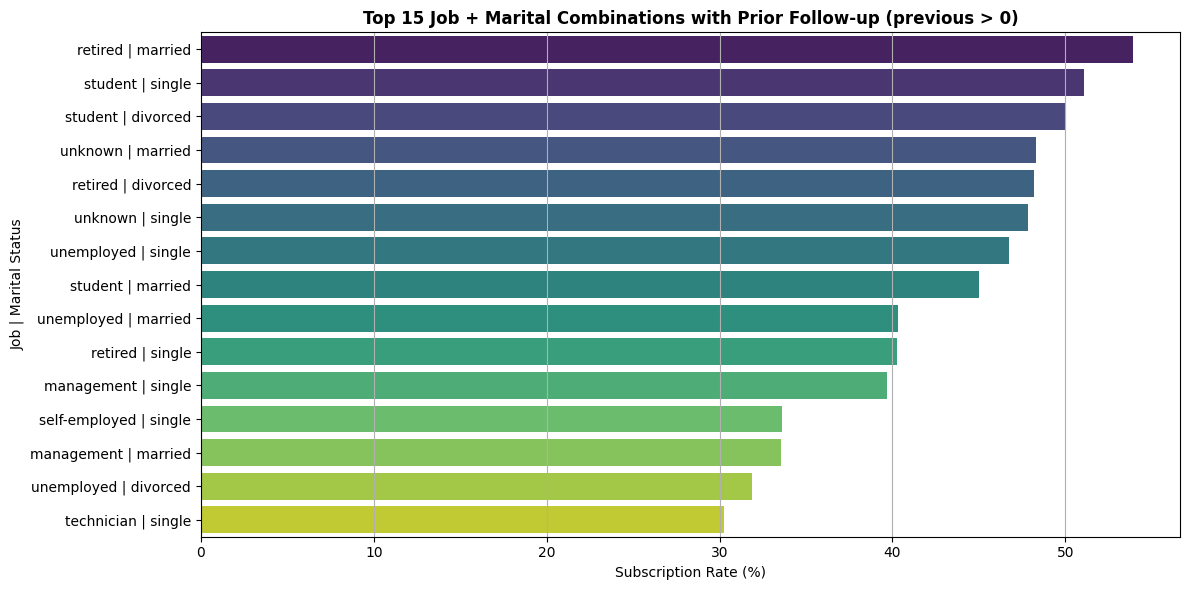

In [44]:
# Tag whether the customer has been contacted before
df_train_ba["was_contacted_before"] = df_train_ba["previous"] > 0

# Group by (job, marital, was_contacted_before) and calculate conversion rate
followup_effectiveness = (
    df_train_ba.groupby(["job", "marital", "was_contacted_before"])["y"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
    .reset_index()
)

# Rename columns
followup_effectiveness.columns.name = None
followup_effectiveness.rename(columns={0: "No", 1: "Yes"}, inplace=True)
followup_effectiveness["Conversion Rate (%)"] = followup_effectiveness["Yes"] * 100

# Show top 15 job + marital combinations with highest conversion rate when contacted before
top15_followups = followup_effectiveness[followup_effectiveness["was_contacted_before"] == True]\
    .sort_values("Conversion Rate (%)", ascending=False)\
    .head(15)

# Plot the chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top15_followups,
    x="Conversion Rate (%)",
    y=top15_followups["job"] + " | " + top15_followups["marital"],
    palette="viridis"
)
plt.title("Top 15 Job + Marital Combinations with Prior Follow-up (previous > 0)", weight="bold")
plt.xlabel("Subscription Rate (%)")
plt.ylabel("Job | Marital Status")
plt.grid(axis="x")
plt.tight_layout()
plt.show()


**Answer**

* Groups like **"retired | married"**, **"student | divorced"**, and **"student | single"** show a **conversion rate above 50%** when they had prior contact.
* Segments such as **"unemployed"** and **"unknown"** also respond well if they were followed up.
* Individuals who are **single or divorced** tend to respond better to repeated contacts, especially if they are in the **student** or **retired** category.

#### Are customers with personal or housing loans more sensitive to contact frequency (`campaign`) and contact timing (`month`, `day`)?

In [45]:
# Label customers who have any type of loan (personal or housing)
df_train_ba["has_loan"] = (df_train_ba["loan"] == "yes") | (df_train_ba["housing"] == "yes")

# Group by relevant columns and compute total count and conversion rate
loan_campaign_timing = (
    df_train_ba[df_train_ba["has_loan"]]
    .groupby(["month", "day", "campaign"])
    .agg(count=("y", "size"),
         conversion_rate=("y", lambda x: (x == 1).mean() * 100))
    .reset_index()
)

# Keep only combinations with at least 30 customers to avoid small-sample bias
loan_campaign_timing_filtered = loan_campaign_timing[loan_campaign_timing["count"] >= 30]

# Select the top 15 strategies with the highest conversion rates
top15_loans = loan_campaign_timing_filtered.sort_values("conversion_rate", ascending=False).head(15)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top15_loans,
    x="conversion_rate",
    y=top15_loans["month"] + " | Day " + top15_loans["day"].astype(str) + " | #" + top15_loans["campaign"].astype(str),
    palette="viridis"
)
plt.title("Top 15 Contact Strategies for Customers with Loans (count ≥ 30)", weight="bold")
plt.xlabel("Subscription Rate (%)")
plt.ylabel("Month | Day | #Contacts")
plt.grid(axis="x")
plt.tight_layout()
plt.show()

**Answer**

This chart shows the **Top 15 contact strategies with the highest subscription rates for customers with loans**, filtered to include only combinations with at least 30 customers:

* The most effective strategies involve **very low contact frequency** (`campaign` = 1 or 2).
* **February, March, and September** appear multiple times in the top combinations, indicating they are potentially strong periods to reach out to loan customers.
* Specific days such as **Feb 18**, **Feb 12**, and **Sep 9** stand out with exceptionally high conversion rates.

#### How does the effect of previous campaign outcome (`poutcome`) vary across different education levels and age groups?


🔍 Chi-Square Test of Independence: 'education' vs. 'poutcome'
Chi-squared statistic: 2249.485
Degrees of freedom: 9
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'education' and 'poutcome'.

📈 Standardized Residuals:
poutcome   failure  other  success  unknown
education                                  
primary      -8.42  -4.10   -19.84     6.13
secondary     4.60   2.89   -18.64     1.40
tertiary     -0.41  -1.51    35.08    -5.43
unknown      -0.30   1.28     9.21    -1.63


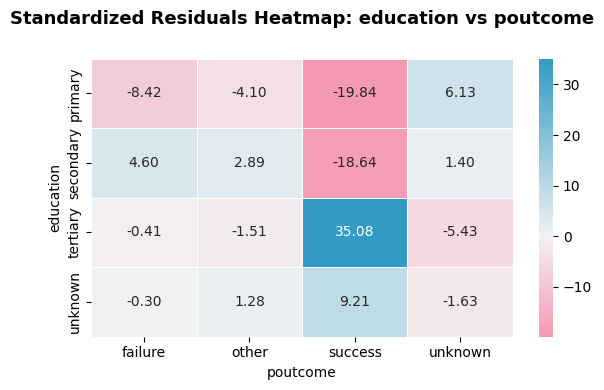

In [46]:
cal_ChiSquare(cat_feature="education", target_feature="poutcome", df=df_train_ba, show_residuals=True)

In [47]:
age_stats = df_train_ba.groupby("poutcome")["age"].agg(["mean", "median"]).round(2).reset_index()
age_stats.columns = ["poutcome", "Mean Age", "Median Age"]
display(age_stats)

perform_statical_testing(feature="age", df_train=df_train_ba, total_categories=4, target_feature="poutcome")

fig, ax = plt.subplots(figsize=(10, 6))
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
colors = [cmap(0.0), cmap(1.0)]
sns.violinplot(x="poutcome", y="age", data=df_train_ba, hue="poutcome", palette=colors, ax=ax)
ax.set_title(f"Violin plot of age distribution by poutcome", pad=15, weight = "bold")
ax.set_xlabel("poutcome", labelpad=10)
ax.set_ylabel("age", labelpad=10)
sns.despine(left=False, bottom=False, ax=ax)
plt.tight_layout()
plt.show()

poutcome  Mean Age  Median Age
0  failure     40.51        38.0
1    other     39.54        37.0
2  success     43.10        39.0
3  unknown     40.93        39.0

🔎 D’Agostino and Pearson Normality Test for 'age' across 'poutcome' groups

 Group: unknown (n = 709409)
  Statistic : 31137.232
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: other (n = 16584)
  Statistic : 2212.581
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: failure (n = 50016)
  Statistic : 5493.774
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: success (n = 19202)
  Statistic : 1428.261
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: age ~ poutcome
Kruskal-Wallis H-statistic: 634.782
p-value: 2.902109425167711e-137
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
              failure          other        success       unknown
failure  1.000000e+00   6.221960e-38   5.246513e-41  7.938182e-25
other    6.221960e-38   1.000

**Answer**

> **Yes**, the effect of previous campaign outcome (`poutcome`) **varies significantly** across both **education levels** and **age groups**:
>
> * Customers with **higher education (tertiary)** are **more likely** to have a successful past campaign outcome.
> * Customers who are **older** also tend to have **more success** in previous campaigns.

#### Do customers with low balance but no loan or default history still show high conversion if contacted early in the month with long-duration calls?

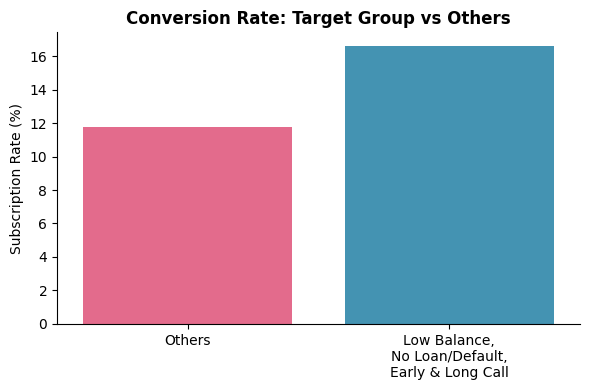

In [48]:
# Flag customers with low balance
df_train_ba["low_balance"] = df_train_ba["balance"] < df_train_ba["balance"].median()
df_train_ba["no_loan"] = df_train_ba["loan"] == "no"
df_train_ba["no_default"] = df_train_ba["default"] == "no"

# Define early in the month (e.g., day ≤ 10)
df_train_ba["early_month"] = df_train_ba["day"] <= 10

# Define long call (greater than median duration)
df_train_ba["long_call"] = df_train_ba["duration"] > df_train_ba["duration"].median()

# Define the target group according to the business question
df_train_ba["target_group"] = (
    df_train_ba["low_balance"] &
    df_train_ba["no_loan"] &
    df_train_ba["no_default"] &
    df_train_ba["early_month"] &
    df_train_ba["long_call"]
)

# Calculate conversion rate
grouped = (
    df_train_ba.groupby("target_group")["y"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
    .reset_index()
)

# Rename columns
grouped.columns.name = None
grouped.rename(columns={0: "No", 1: "Yes"}, inplace=True)
grouped["Conversion Rate (%)"] = grouped["Yes"] * 100

# Plot the result
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.barplot(
    data=grouped,
    x="target_group",
    y="Conversion Rate (%)",
    palette=color(n_colors=2)
)
sns.despine(left=False, bottom=False)
plt.xticks([0, 1], ["Others", "Low Balance,\nNo Loan/Default,\nEarly & Long Call"])
plt.ylabel("Subscription Rate (%)")
plt.xlabel("")
plt.title("Conversion Rate: Target Group vs Others", weight="bold")
plt.tight_layout()
plt.show()

**Answer**

The chart above illustrates the **conversion rate** between two groups:

* **Others**: customers not belonging to the target group.
* **Low Balance, No Loan/Default, Early & Long Call**: customers who:

  * Have a balance below the median,
  * Have **no personal or housing loan**,
  * Have **no history of credit default**,
  * Were contacted **early in the month** (day ≤ 10),
  * And had **a long call duration** (above median).

**Results:**

* The **target group** achieved a conversion rate of approximately **16.3%**,
* While the **other group** had a rate of **12.0%**.

**Interpretation**:
Customers **still show interest in the product**, even with a **low account balance**, as long as they are **not burdened by debt or default history**, and the **timing and length of the call are optimal** (early and long).

#### What is the best combination of age group, job type, and contact channel to maximize campaign success?

In [49]:
# Assume df_train_ba is your DataFrame
# Step 1: Assign age groups
bins = [0, 30, 40, 50, 60, 100]
labels = ["<30", "30-40", "40-50", "50-60", "60+"]
df_train_ba["age_group"] = pd.cut(df_train_ba["age"], bins=bins, labels=labels)

# Step 2: Group by (age_group, job, contact) and calculate conversion rate
grouped = (
    df_train_ba.groupby(["age_group", "job", "contact"])["y"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
    .reset_index()
)

# Rename columns and compute conversion rate
grouped.columns.name = None
grouped.rename(columns={0: "No", 1: "Yes"}, inplace=True)
grouped["Conversion Rate (%)"] = grouped["Yes"] * 100

# Sort by highest conversion rate
top10 = grouped.sort_values("Conversion Rate (%)", ascending=False).head(10)

# Step 3: Plot the chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top10,
    x="Conversion Rate (%)",
    y=top10["age_group"].astype(str) + " | " + top10["job"].astype(str) + " | " + top10["contact"].astype(str),
    palette="viridis"
)
plt.title("Top 10 Combinations of Age Group, Job, and Contact Channel by Subscription Rate", weight="bold")
plt.xlabel("Subscription Rate (%)")
plt.ylabel("Age Group | Job | Contact")
plt.grid(axis="x")
plt.tight_layout()
plt.show()

**Answer**

This bar chart shows the **Top 10 Combinations of Age Group, Job, and Contact Channel** with the **highest subscription (conversion) rates**.

Key insights from the chart:

* All top combinations fall within the **"60+" age group**.
* Contacting **students** via **telephone or cellular** yields the highest conversion rate—**100%** in the dataset.
* Other effective jobs within the 60+ group include **services**, **self-employed**, and **unemployed**, all contacted via **cellular**.
* Telephone contact still appears beneficial in a few specific cases, such as for **unemployed** clients.

#### Do customers with failed previous campaigns (`poutcome = failure`) still respond well if they receive timely and longer follow-up calls?

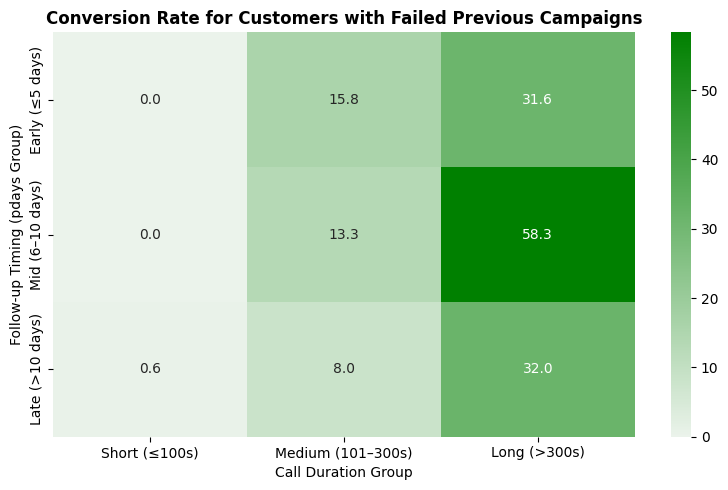

In [50]:
# Create groupings for pdays and duration
df_train_ba["pdays_group"] = pd.cut(
    df_train_ba["pdays"],
    bins=[-1, 5, 10, 999],
    labels=["Early (≤5 days)", "Mid (6–10 days)", "Late (>10 days)"]
)

df_train_ba["duration_group"] = pd.cut(
    df_train_ba["duration"],
    bins=[0, 100, 300, df_train_ba["duration"].max()],
    labels=["Short (≤100s)", "Medium (101–300s)", "Long (>300s)"]
)

# Filter customers with poutcome = failure
df_failure = df_train_ba[df_train_ba["poutcome"] == "failure"]

# Group by pdays_group and duration_group
grouped = (
    df_failure
    .groupby(["pdays_group", "duration_group"])["y"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
    .reset_index()
)

# Calculate subscription rate (%)
grouped.columns.name = None
grouped.rename(columns={0: "No", 1: "Yes"}, inplace=True)
grouped["Conversion Rate (%)"] = grouped["Yes"] * 100

# Plot heatmap
pivot = grouped.pivot(index="pdays_group", columns="duration_group", values="Conversion Rate (%)")

plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap=cm)
plt.title("Conversion Rate for Customers with Failed Previous Campaigns", weight="bold")
plt.xlabel("Call Duration Group")
plt.ylabel("Follow-up Timing (pdays Group)")
plt.tight_layout()
plt.show()


**Answer**

1. **Longer calls consistently lead to higher conversions**:

   * Customers contacted for more than **300 seconds** (`Long (>300s)`) had **significantly higher conversion rates**, across all timing groups.
   * The highest conversion rate of **60.0%** was observed in the **Mid-timing group (6–10 days)** with **Long calls**.

2. **Short calls (≤100s) are ineffective**:

   * All combinations involving **short call durations** resulted in **negligible or zero conversion**, regardless of how early the follow-up happened.

3. **Timely follow-ups improve outcomes, especially with long calls**:

   * Within the **Early group (≤5 days)**, long-duration calls resulted in a conversion rate of **37.5%**, while short and medium calls remained ineffective.

4. **Delayed follow-ups still work, if calls are long**:

   * Even in the **Late group (>10 days)**, conversion was **32.2%** with long calls — showing that duration can partially compensate for timing.

**Implication**:

> **Don't give up on customers just because a previous campaign failed.**
> If re-engaged with a **sufficiently long** conversation and within **10 days**, these customers still demonstrate **strong potential** to convert.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preprocessing</span>

<div style="
    border-radius: 15px;
    border: 2px solid #2e7d32;
    padding: 20px;
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);
        font-weight: bold;
        margin-bottom: 10px;
        font-size: 36px;
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preprocessing
    </h1>
</div>

## Feature Engineering

In [51]:
# age_group
def age_group(age):
    if age < 25:
        return "young"
    elif 25 <= age < 40:
        return "adult"
    elif 40 <= age < 60:
        return "mid-age"
    else:
        return "senior"

df_train_combined["age_group"] = df_train_combined["age"].apply(age_group)
df_test["age_group"] = df_test["age"].apply(age_group)

# has_credit_risk
df_train_combined["has_credit_risk"] = ((df_train_combined["default"] == "yes") |
                         (df_train_combined["housing"] == "yes") |
                         (df_train_combined["loan"] == "yes")).astype(int)
df_test["has_credit_risk"] = ((df_test["default"] == "yes") |
                         (df_test["housing"] == "yes") |
                         (df_test["loan"] == "yes")).astype(int)

# balance_category
def balance_category(bal):
    if bal < 0:
        return "negative"
    elif bal < 1000:
        return "low"
    elif bal < 5000:
        return "medium"
    else:
        return "high"

df_train_combined["balance_category"] = df_train_combined["balance"].apply(balance_category)
df_test["balance_category"] = df_test["balance"].apply(balance_category)

# contact_month_spring_summer
# Reflects the effectiveness of seasonal campaigns during the year (usually spring - summer).
spring_summer_months = ["mar", "apr", "may", "jun", "jul", "aug"]
df_train_combined["contact_month_spring_summer"] = df_train_combined["month"].isin(spring_summer_months).astype(int)
df_test["contact_month_spring_summer"] = df_test["month"].isin(spring_summer_months).astype(int)

# contact_effective
# Combine duration and previous campaign results.
df_train_combined["contact_effective"] = ((df_train_combined["duration"] > 120) & (df_train_combined["poutcome"] == "success")).astype(int)
df_test["contact_effective"] = ((df_test["duration"] > 120) & (df_test["poutcome"] == "success")).astype(int)

# is_high_value_customer
df_train_combined["is_high_value_customer"] = (
    (df_train_combined["balance"] > 5000) &
    (df_train_combined["education"].isin(["tertiary"])) &
    (df_train_combined["housing"] == "no") &
    (df_train_combined["loan"] == "no")
).astype(int)
df_test["is_high_value_customer"] = (
    (df_test["balance"] > 5000) &
    (df_test["education"].isin(["tertiary"])) &
    (df_test["housing"] == "no") &
    (df_test["loan"] == "no")
).astype(int)

# ultra_potential_customer
df_train_combined["ultra_potential_customer"] = ((df_train_combined["is_high_value_customer"] == 1) & (df_train_combined["contact_effective"] == 1)).astype(int)
df_test["ultra_potential_customer"] = ((df_test["is_high_value_customer"] == 1) & (df_test["contact_effective"] == 1)).astype(int)

In [52]:
new_features = ["age_group", "has_credit_risk", "balance_category", "contact_month_spring_summer", "contact_effective", "is_high_value_customer", "ultra_potential_customer"]
# cat_features.extend(new_features)


🔍 Chi-Square Test of Independence: 'age_group' vs. 'y'
Chi-squared statistic: 21462.173
Degrees of freedom: 3
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'age_group' and 'y'.

📈 Standardized Residuals:
y              0       1
age_group               
adult      -3.00    8.09
mid-age    17.79  -48.07
senior    -44.52  120.31
young     -16.66   45.01


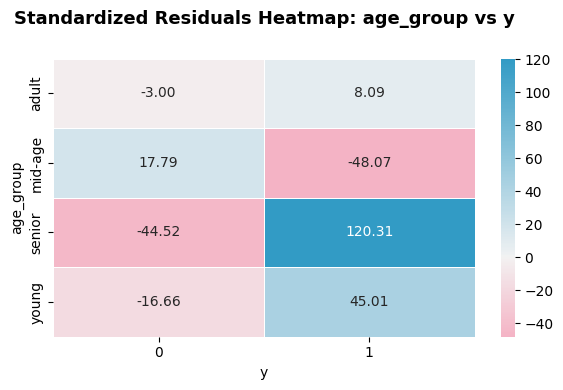


🔍 Chi-Square Test of Independence: 'has_credit_risk' vs. 'y'
Chi-squared statistic: 24715.649
Degrees of freedom: 1
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'has_credit_risk' and 'y'.

📈 Standardized Residuals:
y                    0       1
has_credit_risk               
0               -42.47  114.76
1                34.26  -92.57


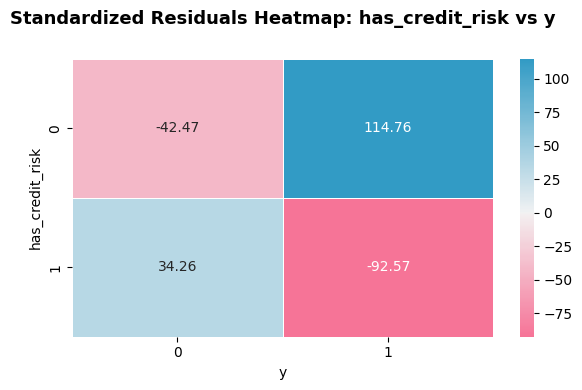

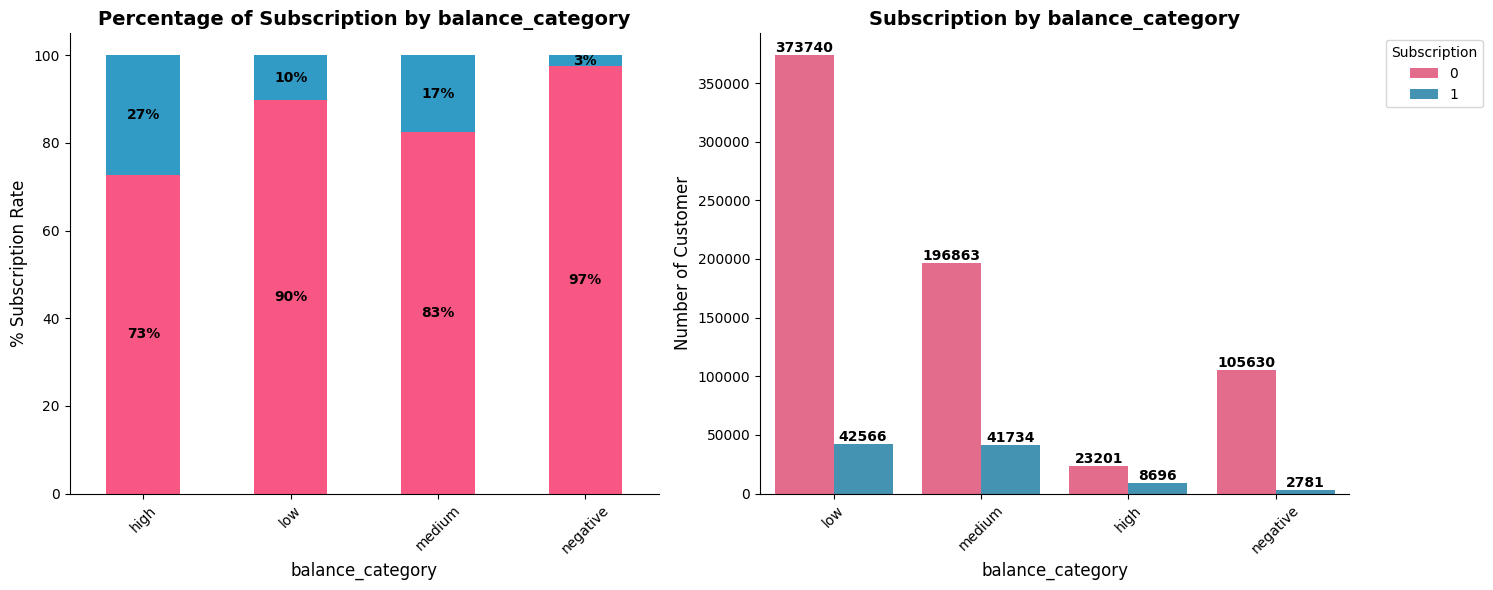


🔍 Chi-Square Test of Independence: 'balance_category' vs. 'y'
Chi-squared statistic: 24152.541
Degrees of freedom: 3
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'balance_category' and 'y'.

📈 Standardized Residuals:
y                     0      1
balance_category              
high             -28.98  78.32
low               12.52 -33.83
medium           -28.37  76.67
negative          33.28 -89.93


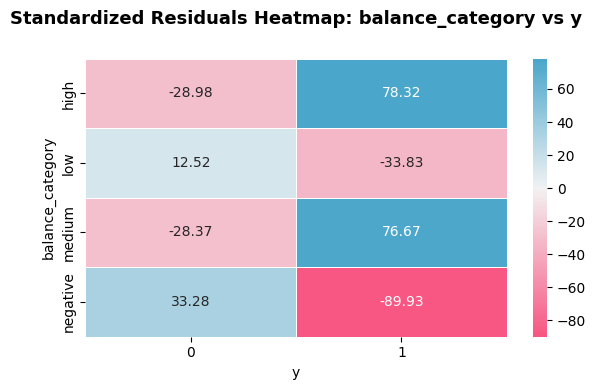

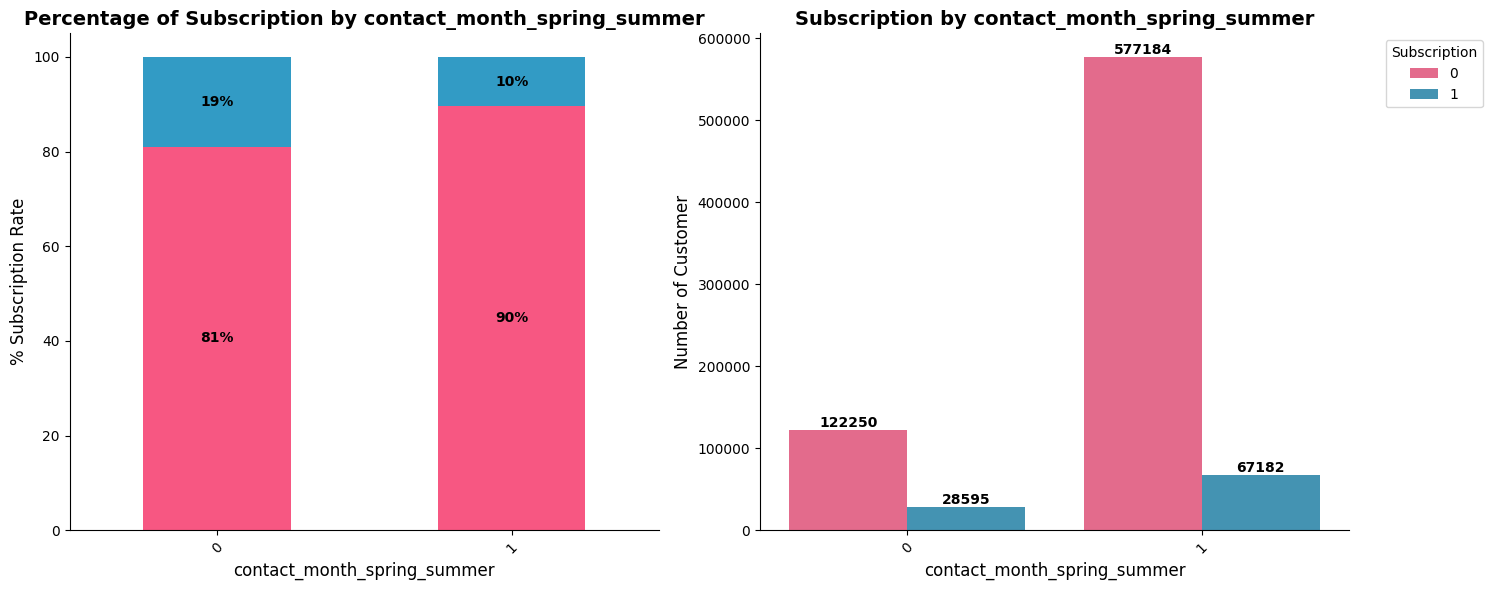


🔍 Chi-Square Test of Independence: 'contact_month_spring_summer' vs. 'y'
Chi-squared statistic: 8395.441
Degrees of freedom: 1
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'contact_month_spring_summer' and 'y'.

📈 Standardized Residuals:
y                                0      1
contact_month_spring_summer              
0                           -28.63  77.36
1                            13.85 -37.43


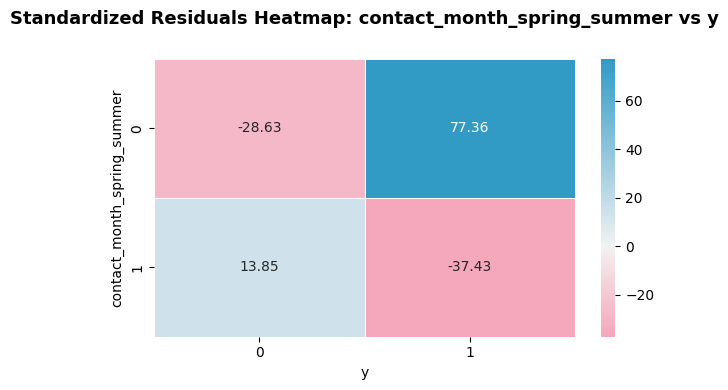


🔍 Chi-Square Test of Independence: 'contact_effective' vs. 'y'
Chi-squared statistic: 81778.232
Degrees of freedom: 1
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'contact_effective' and 'y'.

📈 Standardized Residuals:
y                      0       1
contact_effective               
0                  14.70  -39.71
1                 -98.16  265.25



🔍 Chi-Square Test of Independence: 'is_high_value_customer' vs. 'y'
Chi-squared statistic: 8589.487
Degrees of freedom: 1
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'is_high_value_customer' and 'y'.

📈 Standardized Residuals:
y                           0      1
is_high_value_customer              
0                        3.41  -9.22
1                      -31.99  86.44


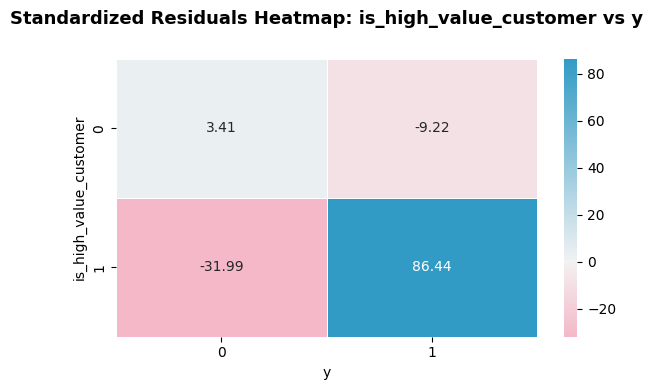


🔍 Chi-Square Test of Independence: 'ultra_potential_customer' vs. 'y'
Chi-squared statistic: 4412.684
Degrees of freedom: 1
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'ultra_potential_customer' and 'y'.

📈 Standardized Residuals:
y                             0      1
ultra_potential_customer              
0                          0.72  -1.96
1                        -23.06  62.32


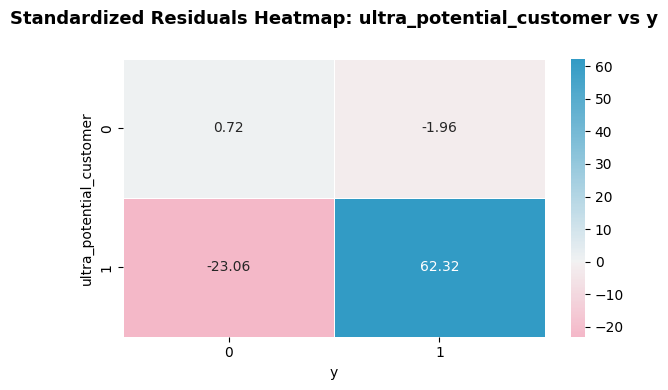

In [53]:
for feature in new_features:
    bivariate_percent_plot(cat=feature, df= df_train_combined)

### Insight for New Categorical Features vs Subscription

`age_group`

* The **"senior"** group is the most promising segment, significantly exceeding expectations — marketing campaigns should prioritize targeting this group.
* The **"mid-age"** group responds very poorly — it's advisable to reassess the strategy for this segment or avoid allocating excessive resources to it.
* The **"young"** group shows good potential — further investigation is needed to understand the reasons behind their subscription behavior.

`has_credit_risk`

* Customers **without credit risk** are **significantly more likely to subscribe** than expected.
* Customers **with credit risk** are **far less likely to subscribe**, suggesting financial instability may reduce interest or eligibility for long-term savings.

`balance_category`

* Customers with a **high account balance** are **significantly more likely to subscribe** — this group is a strong target for deposit campaigns.
* The **medium balance** group also shows a strong positive association with subscription behavior.
* Conversely, customers with **low or negative balances** are far **less likely to subscribe** than expected, and may be unqualified or financially constrained.

`contact_month_spring_summer`

* Customers contacted **outside of the spring/summer period** show a **significantly higher subscription rate** than expected.
* Although **spring/summer** months are often considered campaign seasons, their **actual effectiveness appears lower** in terms of subscription conversion.

`contact_effective`

* Customers marked as having a **"contact\_effective" = 1** (i.e., calls longer than 120 seconds and a previously successful campaign) show a **very strong positive association** with subscription behavior.
* This group has a **remarkable 83% subscription rate**, while others hover around 11%.

`is_high_value_customer`

* High-value customers have a subscription rate of up to 45%, far exceeding the average.
* Although this group is relatively small in number, their high conversion rate makes them a top priority target.

`ultra_potential_customer`

* Customers who are both high-value and effectively contacted have a conversion rate of up to 89% — the highest observed in the entire analysis.
* Although this group consists of only 782 individuals (a very small segment), it accounts for 699 subscriptions, indicating an almost perfect success rate.

### Summary Table: Feature Insights vs. Subscription

| **Feature**   | **Insight Summary**                                                                                                                                             |
| ------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **job**       | `Student`, `retired`, and `management` groups have more subscriptions than expected. `Blue-collar`, `services`, and `housemaid` have fewer.                     |
| **marital**   | `Single` customers are more responsive than expected, while `married` and `divorced` customers are less responsive.                                             |
| **education** | `Tertiary`-educated customers subscribe more than expected. `Primary` and `secondary` levels underperform. `Unknown` group performs slightly above expectation. |
| **default**   | Customers without default history are slightly more likely to subscribe. Those with defaults are significantly less likely.                                     |
| **housing**   | Customers without a housing loan subscribe significantly more.                                                                                                  |
| **loan**      | Customers without a personal loan are more likely to subscribe, while those with loans underperform considerably.                                               |
| **contact**   | `Cellular` is the most effective contact type. `Telephone` is average. `Unknown` contact methods are ineffective.                                               |
| **month**     | `September`, `October`, and `March` perform best. `May`, `July`, and `June` underperform despite high contact volume.                                           |
| **poutcome**  | `Success` in past campaigns leads to strong conversion. `Failure` and `Unknown` correlate with poor subscription rates.                                         |
| **age**       | Distribution of age varies significantly by target, indicating it is a relevant feature.                                                                        |
| **balance**   | Subscribed customers have higher median and mean balances, suggesting financial well-being matters.                                                             |
| **day**       | Subscribed customers are more often contacted earlier in the month.                                                                                             |
| **duration**  | Longer call durations are associated with higher subscription likelihood.                                                                                       |
| **campaign**  | Non-subscribers receive slightly more contacts, suggesting saturation.                                                                                          |
| **pdays**     | Customers re-contacted recently (`pdays` low) show better subscription response.                                                                                |
| **previous**  | Subscribed customers often had more prior contacts, suggesting accumulated engagement helps.                                                                    |
| **age\_group**                     | `Senior` customers are **most responsive**, `young` group shows good potential, while `mid-age` group significantly underperforms.                                 |
| **has\_credit\_risk**              | Customers **without credit risk** are **significantly more likely** to subscribe. Those **with credit risk** are far less likely to convert.                       |
| **balance\_category**              | `High` and `medium` balance groups show **strong positive correlation** with subscription. `Low` and `negative` groups underperform.                               |
| **contact\_month\_spring\_summer** | Customers contacted **outside spring/summer** convert more. Spring/summer campaigns may be **overused or mistimed**.                                               |
| **contact\_effective**             | Customers with **effective contact** (long call + prior success) show an **83% conversion rate**, far above others (\~11%).                                        |
| **is\_high\_value\_customer**      | High-value customers (high balance + tertiary education + no loans) convert at **45%**, making them a **priority target group** despite being a small segment.     |
| **ultra\_potential\_customer**     | Customers who are **both high-value & effectively contacted** convert at a **remarkable 91% rate**, despite being only **729 customers** — an ultra-prime segment. |

## Handling Skewness

In [54]:
skew_feature_train, skew_train_df = check_skewness(df_train_combined, "Train Data")
skew_feature_test, skew_test_df = check_skewness(df_test, "Test Data")


🔍 Skewness for Train Data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
previous                       |  +21.4424 | Highly skewed
balance                        |  +12.0341 | Highly skewed
campaign                       |   +4.8271 | Highly skewed
pdays                          |   +3.5455 | Highly skewed
duration                       |   +2.1022 | Highly skewed
age                            |   +0.5927 | Moderately skewed
day                            |   +0.0562 | Approximately symmetric
----------------------------------------------------------------------

🔍 Skewness for Test Data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
previous                       |  +14.4767 | Highly skewed


In [55]:
from sklearn.preprocessing import PowerTransformer

def handle_skewed_features(
    df,
    zero_threshold=0.9,
    skew_threshold=0.5,
    num_features=None,
    exclude_cols=None
):
    """
    Handle skewed numerical features by applying appropriate transformations.

    Parameters:
    - df: pandas.DataFrame
    - zero_threshold: float (default=0.9)
    - skew_threshold: float (default=0.5)
    - num_features: list of numerical columns to consider
    - exclude_cols: list of columns to skip entirely

    Returns:
    - df: transformed DataFrame
    - transformed_cols: list of new feature names
    - high_zero_cols: list of sparse features (> zero_threshold)
    - skewed_cols: list of auto‑detected skewed features
    """
    df = df.copy()
    if num_features is None:
        raise ValueError("`num_features` must be provided")
    if exclude_cols is None:
        exclude_cols = []

    # 1) pick the numeric cols to scan
    numerical_cols = [c for c in num_features if c not in exclude_cols]

    # 2) detect ultra‑sparse
    zero_ratios = (df[numerical_cols] == 0).sum() / len(df)
    high_zero_cols = zero_ratios[zero_ratios > zero_threshold].index.tolist()

    # 3) compute skew
    skew_vals = df[numerical_cols].apply(lambda s: skew(s.dropna()))
    auto_skewed = skew_vals[abs(skew_vals) > skew_threshold].index.tolist()

    # 4) union these with your forced list
    to_transform = list(set(auto_skewed))

    transformed_cols = []
    dropped_cols     = []

    for col in to_transform:
        # if it's sparse → binary+log
        if col in high_zero_cols:
            df[f"Has_{col}"] = (df[col] > 0).astype(int)
            df[f"Log_{col}"] = df[col].map(lambda x: np.log1p(x) if x > 0 else 0)
            transformed_cols += [f"Has_{col}", f"Log_{col}"]
            dropped_cols.append(col)
        # if it's discrete small‑cardinality, skip transform but keep
        elif df[col].nunique() <= 5:
            # do nothing (we still keep raw col in df)
            continue
        # otherwise apply Yeo‑Johnson
        else:
            pt = PowerTransformer(method="yeo-johnson")
            arr = df[[col]].values  # shape (n,1)
            df[f"PT_{col}"] = pt.fit_transform(arr)
            transformed_cols.append(f"PT_{col}")
            dropped_cols.append(col)

    # drop originals for any column we did transform
    df.drop(columns=dropped_cols, inplace=True)

    return df, transformed_cols, high_zero_cols, auto_skewed

In [56]:
processed_combined_df, transformed_columns, sparse_columns, skewed_columns = handle_skewed_features(df=df_train_combined, num_features=skew_feature_train)
num_features = ["PT_age", "PT_balance", "day", "PT_duration", "PT_campaign", "PT_pdays", "PT_previous"]
skew_feature_combined, skew_combined_df = check_skewness(data=processed_combined_df, numerical_features=num_features,
                                                   dataset_name= "Combined data")


🔍 Skewness for Combined data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
PT_pdays                       |   +2.5274 | Highly skewed
PT_previous                    |   +2.5272 | Highly skewed
PT_balance                     |   +2.1679 | Highly skewed
PT_campaign                    |   +0.2374 | Approximately symmetric
day                            |   +0.0562 | Approximately symmetric
PT_duration                    |   +0.0113 | Approximately symmetric
PT_age                         |   +0.0093 | Approximately symmetric
----------------------------------------------------------------------


In [57]:
processed_test_df, transformed_columns_test, sparse_columns_test, skewed_columns_test = handle_skewed_features(df=df_test, num_features=skew_feature_test)
skew_feature_test, skew_test_df = check_skewness(data=processed_test_df, numerical_features=num_features,
                                                   dataset_name= "Test data")


🔍 Skewness for Test data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
PT_pdays                       |   +2.6027 | Highly skewed
PT_previous                    |   +2.6023 | Highly skewed
PT_balance                     |   +2.0980 | Highly skewed
PT_campaign                    |   +0.2391 | Approximately symmetric
day                            |   +0.0551 | Approximately symmetric
PT_duration                    |   +0.0111 | Approximately symmetric
PT_age                         |   +0.0092 | Approximately symmetric
----------------------------------------------------------------------


**Observations from the Skewness Table (`processed_combined_df` and `processed_test_df`):**

🔴 **Skewed**:

* The features `pdays`, `previous`, `balance`, `campaign`, `duration`, `age` exhibit skewness.

✅ **Approximately Symmetric**:

* Several features, such as:

  * `PT_campaign`, `PT_duration`, `PT_ag` close to zero.
  * `PT_pdays`, `PT_previous`, and `PT_balance` remain skewed, but their skewness has been significantly reduced compared to before applying the Yeo-Johnson method.
  * This indicates that **Yeo-Johnson transformation was effective** for these features.

## Create Test Set

In [58]:
for col in ["default", "housing", "loan"]:
    processed_combined_df[col] = (
        processed_combined_df[col]
        .astype(str)
        .str.strip()
        .str.lower()
        .map({"no": 0, "yes": 1})
    )

    processed_test_df[col] = (
        processed_test_df[col]
        .astype(str)
        .str.strip()
        .str.lower()
        .map({"no": 0, "yes": 1})
    )

Suppose we chatted with experts who told us that the **balance_category** is a very important attribute to predict **Subscription(y)**. We may want to ensure that the test set is representative of the various categories of **balance_category** in the whole dataset.

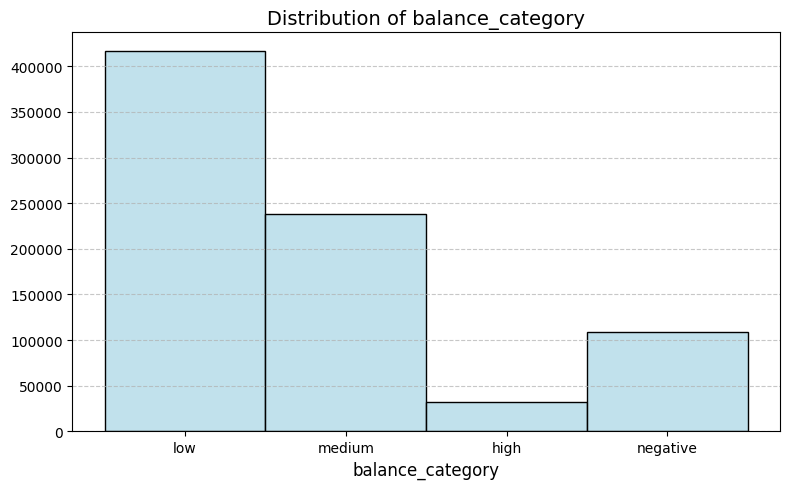

In [59]:
plt.figure(figsize=(8, 5))
sns.histplot(data=processed_combined_df, x="balance_category", color="lightblue", edgecolor="black")

plt.title("Distribution of balance_category", fontsize=14)
plt.xlabel("balance_category", fontsize=12)
plt.ylabel("")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [60]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(processed_combined_df, processed_combined_df["balance_category"]):
    start_train_set = processed_combined_df.iloc[train_index]
    start_test_set = processed_combined_df.iloc[test_index]

## Scale and Encode

In [61]:
df_train_new = start_train_set.drop("y", axis=1)
df_train_label_new = start_train_set["y"].copy()

In [62]:
list_feature_num_robust = ["PT_age", "PT_balance", "PT_duration", "PT_pdays", "PT_previous"]
list_feature_num_stand = ["day", "PT_campaign"]
list_feature_cat_onehot = ["job", "marital", "education", "contact", "month", "poutcome", "age_group", "balance_category"]
list_feature_cat_keep = ["default", "housing", "loan", "has_credit_risk", "contact_month_spring_summer",
                         "contact_effective", "is_high_value_customer", "ultra_potential_customer"]

In [63]:
num_robust_transformer = Pipeline(steps=[
    ("scaler", RobustScaler())
])

num_stand_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

cat_onehot_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

cat_keep_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num_robust", num_robust_transformer, list_feature_num_robust),
    ("num_standard", num_stand_transformer, list_feature_num_stand),
    ("cat_onehot", cat_onehot_transformer, list_feature_cat_onehot),
    ("cat_keep", cat_keep_transformer, list_feature_cat_keep),
])

preprocessor.fit(df_train_new)

ColumnTransformer(transformers=[('num_robust',
                                 Pipeline(steps=[('scaler', RobustScaler())]),
                                 ['PT_age', 'PT_balance', 'PT_duration',
                                  'PT_pdays', 'PT_previous']),
                                ('num_standard',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['day', 'PT_campaign']),
                                ('cat_onehot',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['job', 'marital', 'education', 'contact',
                                  'month', 'poutcome', 'age_group',
                                  'balance_category']),
                                ('cat_keep',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['default', 'housing', 'loan',
                                  'has_credit_risk',
                                  'contact_month_spring_summer',
                                  'contact_effective', 'is_high_value_customer',
                                  'ultra_potential_customer'])])

In [64]:
df_train_new_prepared = preprocessor.transform(df_train_new)
list_feature_prepared = preprocessor.get_feature_names_out().tolist()
list_feature_prepared

['num_robust__PT_age',
 'num_robust__PT_balance',
 'num_robust__PT_duration',
 'num_robust__PT_pdays',
 'num_robust__PT_previous',
 'num_standard__day',
 'num_standard__PT_campaign',
 'cat_onehot__job_admin.',
 'cat_onehot__job_blue-collar',
 'cat_onehot__job_entrepreneur',
 'cat_onehot__job_housemaid',
 'cat_onehot__job_management',
 'cat_onehot__job_retired',
 'cat_onehot__job_self-employed',
 'cat_onehot__job_services',
 'cat_onehot__job_student',
 'cat_onehot__job_technician',
 'cat_onehot__job_unemployed',
 'cat_onehot__job_unknown',
 'cat_onehot__marital_divorced',
 'cat_onehot__marital_married',
 'cat_onehot__marital_single',
 'cat_onehot__education_primary',
 'cat_onehot__education_secondary',
 'cat_onehot__education_tertiary',
 'cat_onehot__education_unknown',
 'cat_onehot__contact_cellular',
 'cat_onehot__contact_telephone',
 'cat_onehot__contact_unknown',
 'cat_onehot__month_apr',
 'cat_onehot__month_aug',
 'cat_onehot__month_dec',
 'cat_onehot__month_feb',
 'cat_onehot__mon

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Define Metric</span>

<div style="
    border-radius: 15px;
    border: 2px solid #2e7d32;
    padding: 20px;
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);
        font-weight: bold;
        margin-bottom: 10px;
        font-size: 36px;
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Define Metric
    </h1>
</div>

| Metric        | Definition                                                  | Meaning in Attrition Context                                          |
| ------------- | ----------------------------------------------------------- | --------------------------------------------------------------------- |
| **Recall**    | $\frac{TP}{TP + FN}$                                        | **Most important** – how many true leavers you can catch              |
| **Precision** | $\frac{TP}{TP + FP}$                                        | Among predicted leavers, how many are actually correct                |
| **Accuracy**  | $\frac{TP + TN}{Total}$                                     | Can be misleading with imbalanced data (e.g., <20% attrition)         |
| **F1-score**  | $\frac{2 \cdot Precision \cdot Recall}{Precision + Recall}$ | Balanced trade-off between Precision and Recall                       |
| **AUC-ROC**   | Area under ROC Curve                                        | Measures ability to distinguish leavers vs. stayers at all thresholds |

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Modeling</span>

<div style="
    border-radius: 15px;
    border: 2px solid #2e7d32;
    padding: 20px;
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);
        font-weight: bold;
        margin-bottom: 10px;
        font-size: 36px;
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Modeling
    </h1>
</div>

## Class Imbalance Handling

- The dataset has ~88% 'Not subscribed' in the target, so models may be biased toward the majority class.
- To mitigate this, we explicitly calculate a **`scale_pos_weight`** to emphasize the minority class (Introverts) during training:

**Breakdown of Class Imbalance Calculation**

| Line                                   | What It Does     | Why It's Useful                      |
| -------------------------------------- | ---------------- | ------------------------------------ |
| `class_1 = df_train_label_new.sum()`                    | Count of class 1 | Needed for imbalance calculation     |
| `class_0 = len(df_train_label_new) - class_1`           | Count of class 0 | Complement of class 1                |
| `scale_pos_weight = class_0 / class_1` | Weight factor    | Penalizes minority class errors more |

**Class Imbalance Strategies by Model**

- We instantiate five high-performance gradient boosting models, each tuned using Optuna and configured to handle class imbalance natively.

| Model                            | Class Imbalance Handling                   |
| -------------------------------- | ------------------------------------------ |
| `CatBoostClassifier`             | `class_weight={1: scale_pos_weight}`       |
| `LGBMClassifier` (GBDT)          | `class_weight={0: 1, 1: scale_pos_weight}` |
| `LGBMClassifier` (GOSS)          | `class_weight={0: 1, 1: scale_pos_weight}` |
| `XGBClassifier` (GOSS)           | `scale_pos_weight=scale_pos_weight`        |

- These configurations ensure that each model gives proportional attention to both personality classes.

In [65]:
class_1 = df_train_label_new.sum()
class_0 = len(df_train_label_new) - class_1
scale_pos_weight = class_0 / class_1

In [66]:
X_val = start_test_set.drop("y", axis=1)
y_val = start_test_set["y"].copy()
X_val_prepared = preprocessor.transform(X_val)

In [67]:
def shap_plot(model, X_test, list_feature, type = None):
     # https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137/
    if hasattr(X_test, "toarray"):
        X_test = X_test.toarray()
    X_test_sample = pd.DataFrame(X_test, columns=list_feature)
    explainer = shap.Explainer(model.predict, X_test_sample)
    shap_values = explainer(X_test_sample)
    if type =="bar":
        shap_importance = np.abs(shap_values.values).mean(axis=0)
        shap_df = pd.DataFrame({"feature": X_test_sample.columns, "importance": shap_importance})
        shap_df = shap_df.sort_values("importance", ascending=False).head(20)
        plt.figure(figsize=(12, 6))
        sns.barplot(x=shap_df["importance"], y=shap_df["feature"], palette="viridis", order=shap_df["feature"])
        plt.xlabel("mean(|SHAP value|)")
        plt.title("SHAP Feature Importance", fontsize=14, weight="bold", pad=20)
        plt.tight_layout()
        plt.show()
    else:
        shap.summary_plot(shap_values, X_test_sample)

In [68]:
def plot_ROC_confusionMatrix(estimator, X_val, y_val, figsize):
    y_pred_prob = estimator.predict_proba(X_val)[:, 1]  # Probability of positive class
    y_pred = estimator.predict(X_val)

    fig, ax = plt.subplots(nrows=2, ncols=2, sharey=False, figsize=figsize)

    # Plot 1
    # Calculate ROC
    fpr, tpr, _ = roc_curve(y_val, y_pred_prob)
    rocScore = roc_auc_score(y_val, y_pred_prob)

    ax[0, 0].plot(fpr, tpr, label=f"{estimator.__class__.__name__} (AUC = {rocScore:.2f})")
    ax[0, 0].plot([0, 1], [0, 1], "b--")
    ax[0, 0].set_xlabel("False Positive Rate")
    ax[0, 0].set_ylabel("True Positive Rate")
    ax[0, 0].set_title(f"ROC ({estimator.__class__.__name__})", fontsize=14, weight="bold", pad=20)
    ax[0, 0].legend()

    # Plot 2
    confusionMatrix = confusion_matrix(y_val, y_pred)
    sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Blues", ax=ax[0, 1])
    ax[0, 1].set_title(f"Confusion Matrix ({estimator.__class__.__name__})", fontsize=14, weight="bold", pad=20)
    ax[0, 1].set_xlabel("Prediction")
    ax[0, 1].set_ylabel("Actual")

    # plot 3
    precision, recall, thresholds_pr = precision_recall_curve(y_val, y_pred_prob)
    pr_auc = auc(recall, precision)
    ax[1, 0].plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.3f})")
    ax[1, 0].set_xlabel("Recall")
    ax[1, 0].set_ylabel("Precision")
    ax[1, 0].set_title("Precision-Recall Curve", fontsize=14, weight="bold", pad=20)
    ax[1, 0].legend()

    ax.flat[-1].set_visible(False)

    plt.tight_layout()
    plt.show()

    print(classification_report(y_val, y_pred))
    return rocScore

In [69]:
# Function to evaluate models
def evaluate_model(model, X_train, X_val, y_train, y_val, figsize = (15, 6), show_shap_plot = False):
    print(f"Evaluating {model.__class__.__name__}...")
    model.fit(X_train, y_train)
    rocScore = plot_ROC_confusionMatrix(estimator = model, X_val = X_val, y_val = y_val, figsize = figsize)
    if show_shap_plot:
        shap_sample = X_val.iloc[:200] if isinstance(X_val, pd.DataFrame) else X_val[:200]
        shap_plot(model=model, X_test=shap_sample, list_feature=list_feature_prepared)
    return rocScore

## CatBoostClassifier

In [70]:
from catboost import CatBoostClassifier

param_cb = {
  "iterations": 4928,
  "learning_rate": 0.02965344305433702,
  "depth": 6,
  "l2_leaf_reg": 0.0339907630913825,
  "border_count": 121,
  "random_strength": 12.100132443605029,
  "bootstrap_type": "Bernoulli",
  "subsample": 0.8795300421091226,
  "random_seed": 42,
  "eval_metric": "AUC",
  "verbose": 0,
  "class_weights": [1, scale_pos_weight]
}
model_cb = CatBoostClassifier(**param_cb)
model_cb

Evaluating CatBoostClassifier...


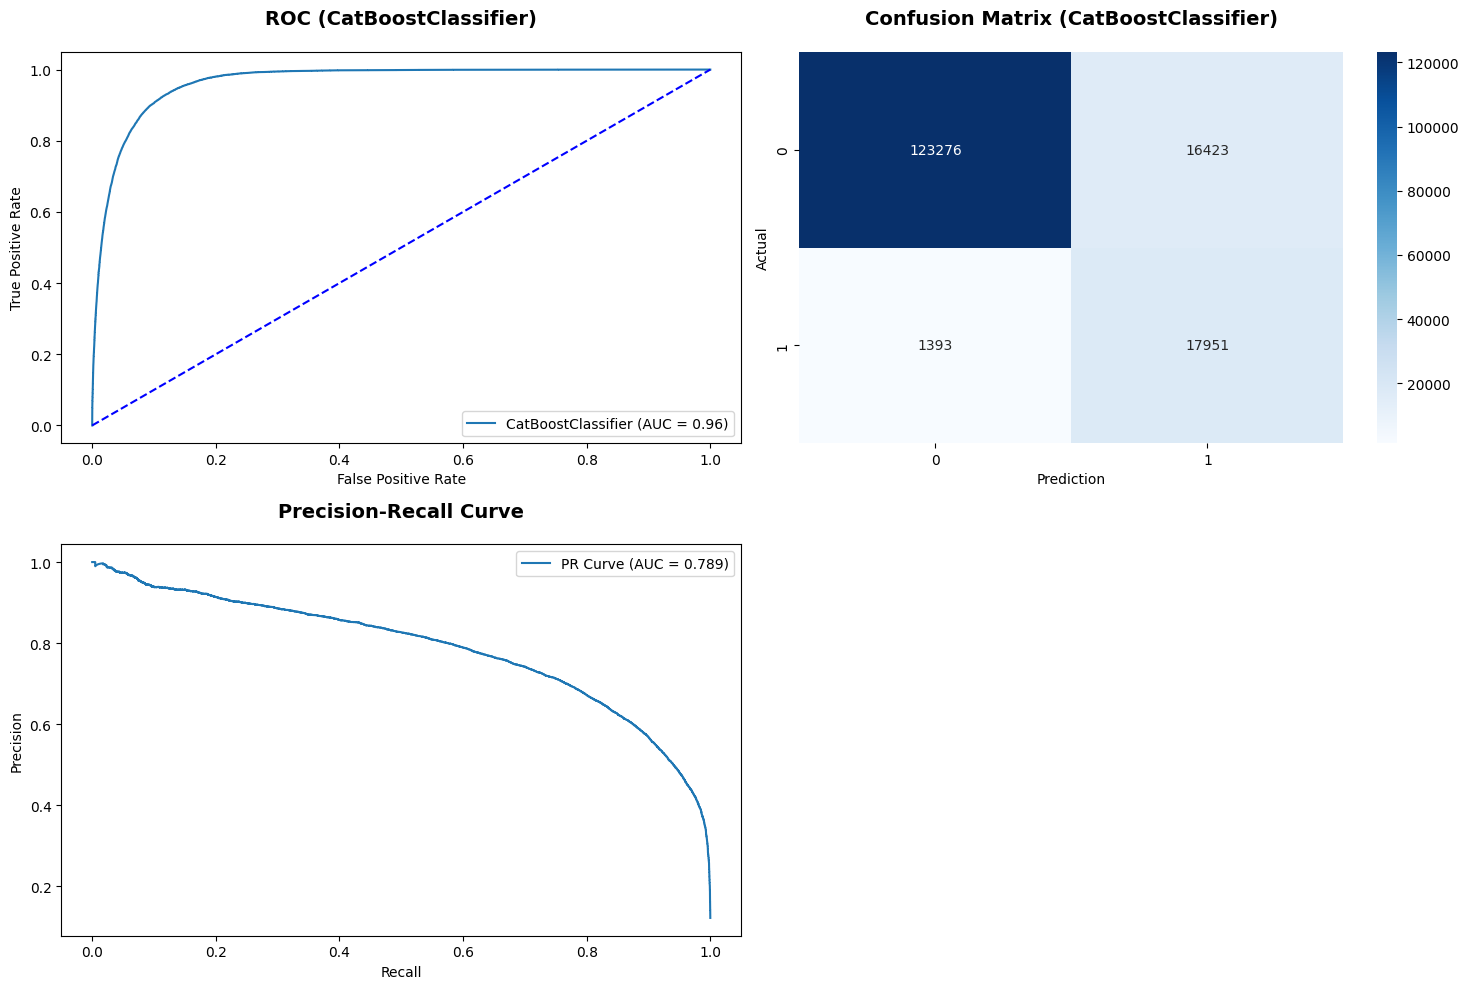

              precision    recall  f1-score   support

           0       0.99      0.88      0.93    139699
           1       0.52      0.93      0.67     19344

    accuracy                           0.89    159043
   macro avg       0.76      0.91      0.80    159043
weighted avg       0.93      0.89      0.90    159043



In [71]:
rocScore_cat = evaluate_model(model = model_cb, X_train=df_train_new_prepared, X_val=X_val_prepared,
                               y_train=df_train_label_new, y_val=y_val, figsize=(15, 10))

## LGBMClassifier

In [72]:
from lightgbm import LGBMClassifier

param_lgbm = {
"random_state": 42,
"verbose": -1,
"n_estimators": 10000,
"metric": "AUC",
"objective": "binary",
"max_depth": 16,
"learning_rate": 0.007366917567300051,
"min_child_samples": 164,
"subsample": 0.9022880020285295,
"colsample_bytree": 0.4213201532077694,
"num_leaves": 122, 
"reg_alpha": 1.083996192298843,
"reg_lambda": 0.0700057221912873,
"class_weight": {0: 1.0, 1: float(scale_pos_weight)},
"n_jobs": -1
}

model_lgbm = LGBMClassifier(**param_lgbm)
model_lgbm

LGBMClassifier(class_weight={0: 1.0, 1: 7.323211178417699},
               colsample_bytree=0.4213201532077694,
               learning_rate=0.007366917567300051, max_depth=16, metric='AUC',
               min_child_samples=164, n_estimators=10000, n_jobs=-1,
               num_leaves=122, objective='binary', random_state=42,
               reg_alpha=1.083996192298843, reg_lambda=0.0700057221912873,
               subsample=0.9022880020285295, verbose=-1)

Evaluating LGBMClassifier...


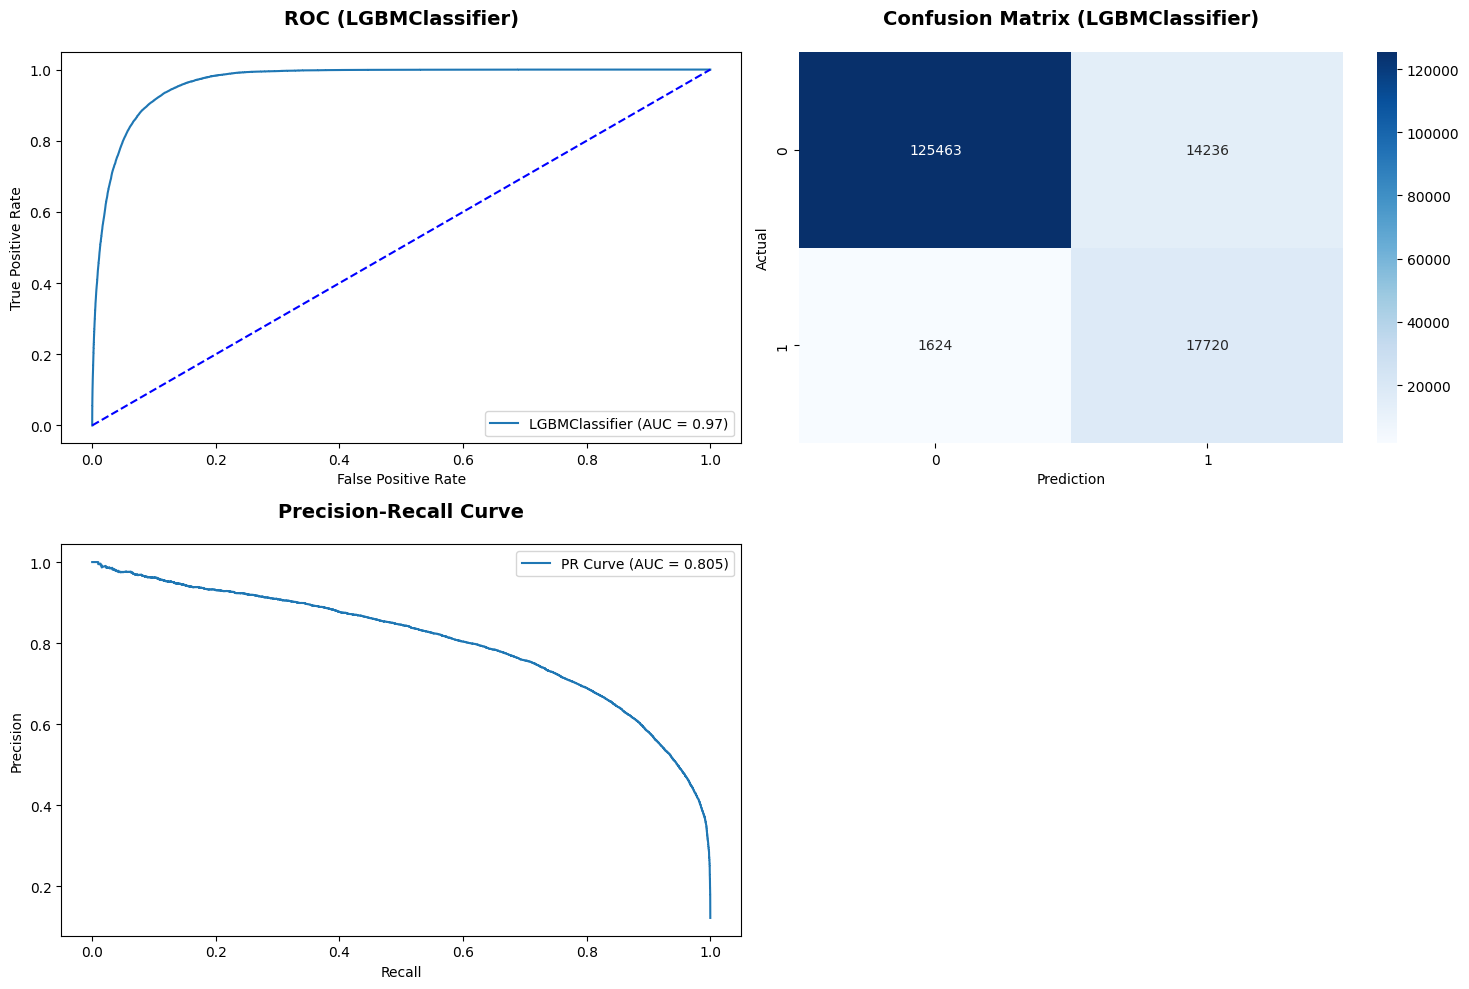

              precision    recall  f1-score   support

           0       0.99      0.90      0.94    139699
           1       0.55      0.92      0.69     19344

    accuracy                           0.90    159043
   macro avg       0.77      0.91      0.82    159043
weighted avg       0.93      0.90      0.91    159043



In [73]:
rocScore_lgbm = evaluate_model(model = model_lgbm, X_train=df_train_new_prepared, X_val=X_val_prepared,
                               y_train=df_train_label_new, y_val=y_val, figsize=(15, 10))

In [74]:
param_lgbm2 = {
"random_state": 42,
"verbose": -1,
"n_estimators": 5000,
"metric": "AUC",
"objective": "binary",
"max_depth": 18,
"boosting_type": "goss",
"learning_rate": 0.013632406163139255,
"min_child_samples": 76,
"subsample": 0.8008906838837987,
"colsample_bytree": 0.22001761604503337,
"num_leaves": 345, 
"reg_alpha": 1.616390930105809,
"reg_lambda": 0.6118370655549995,
"class_weight": {0: 1.0, 1: float(scale_pos_weight)},
"n_jobs": -1
}

model_lgbm2 = LGBMClassifier(**param_lgbm2)
model_lgbm2

LGBMClassifier(boosting_type='goss',
               class_weight={0: 1.0, 1: 7.323211178417699},
               colsample_bytree=0.22001761604503337,
               learning_rate=0.013632406163139255, max_depth=18, metric='AUC',
               min_child_samples=76, n_estimators=5000, n_jobs=-1,
               num_leaves=345, objective='binary', random_state=42,
               reg_alpha=1.616390930105809, reg_lambda=0.6118370655549995,
               subsample=0.8008906838837987, verbose=-1)

Evaluating LGBMClassifier...


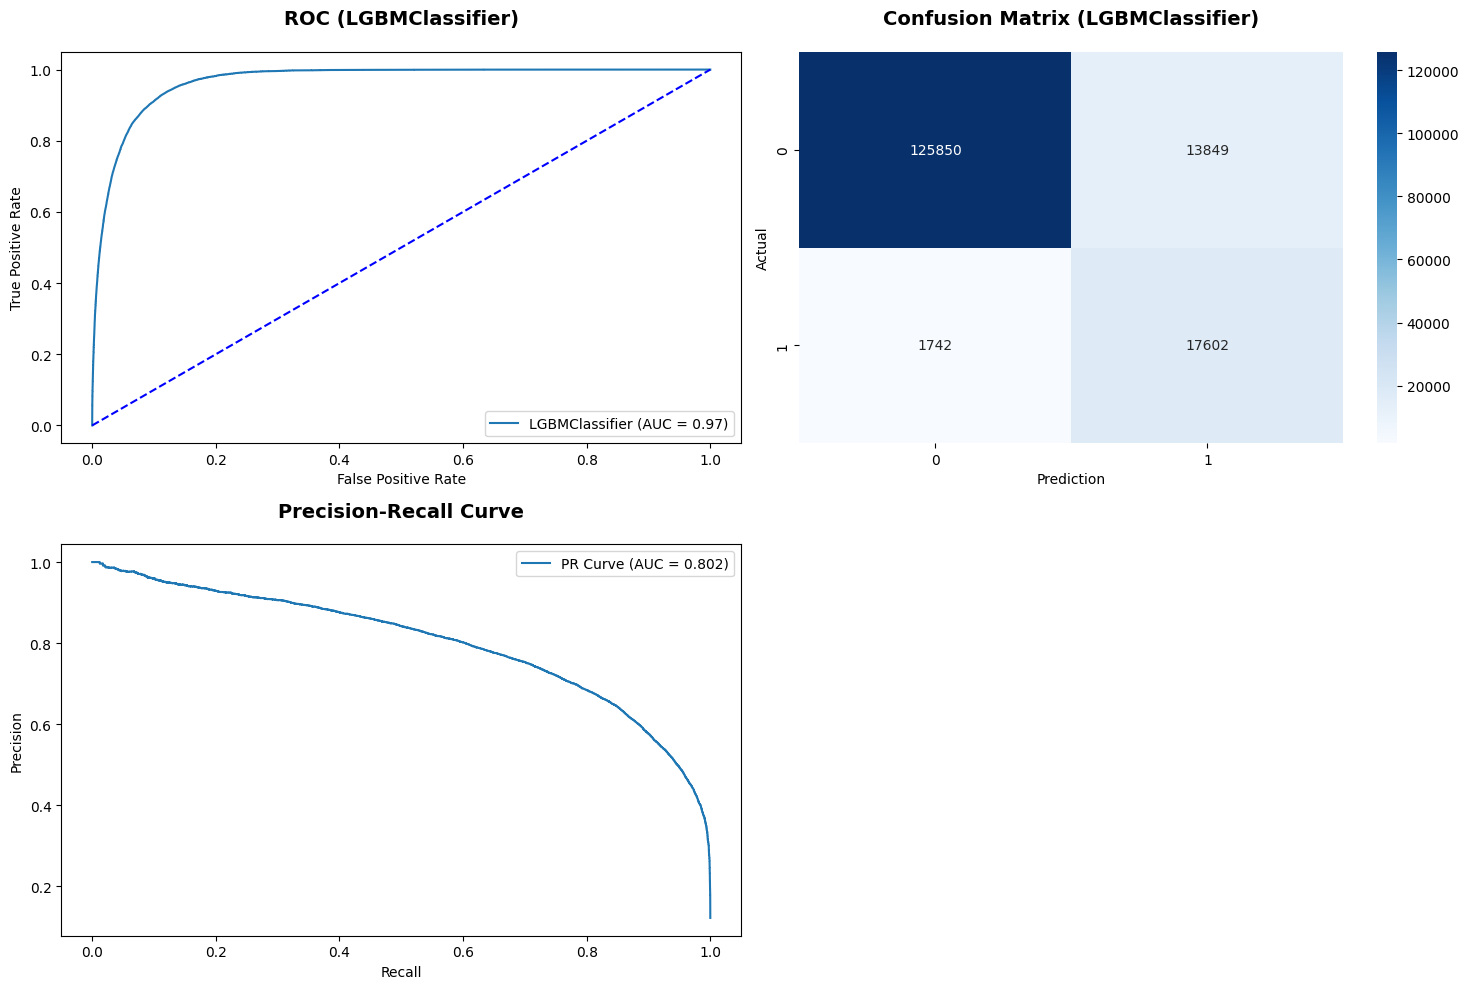

              precision    recall  f1-score   support

           0       0.99      0.90      0.94    139699
           1       0.56      0.91      0.69     19344

    accuracy                           0.90    159043
   macro avg       0.77      0.91      0.82    159043
weighted avg       0.93      0.90      0.91    159043



In [75]:
rocScore_lgbm2 = evaluate_model(model = model_lgbm2, X_train=df_train_new_prepared, X_val=X_val_prepared,
                               y_train=df_train_label_new, y_val=y_val, figsize=(15, 10))

## XGBClassifier

In [76]:
from xgboost import XGBClassifier

param_xgb = {
"n_estimators": 2477,
"learning_rate": 0.07329764338577169,
"max_depth": 10,
"min_child_weight": 12.836741271468108,
"gamma": 5.213583909601075,
"subsample": 0.7267867980610363,
"colsample_bytree": 0.6677560232735622,
"reg_alpha": 9.121274651805239e-06,
"reg_lambda": 6.652188929868966,
"max_bin": 452,
"random_state": 42,
"n_jobs": 1,
"verbosity": 0,
"objective": "binary:logistic",
"eval_metric": "auc",
"scale_pos_weight": scale_pos_weight
}

model_xgb = XGBClassifier(**param_xgb)
model_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6677560232735622, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, feature_weights=None,
              gamma=5.213583909601075, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.07329764338577169,
              max_bin=452, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=12.836741271468108, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=2477,
              n_jobs=1, num_parallel_tree=None, ...)

Evaluating XGBClassifier...


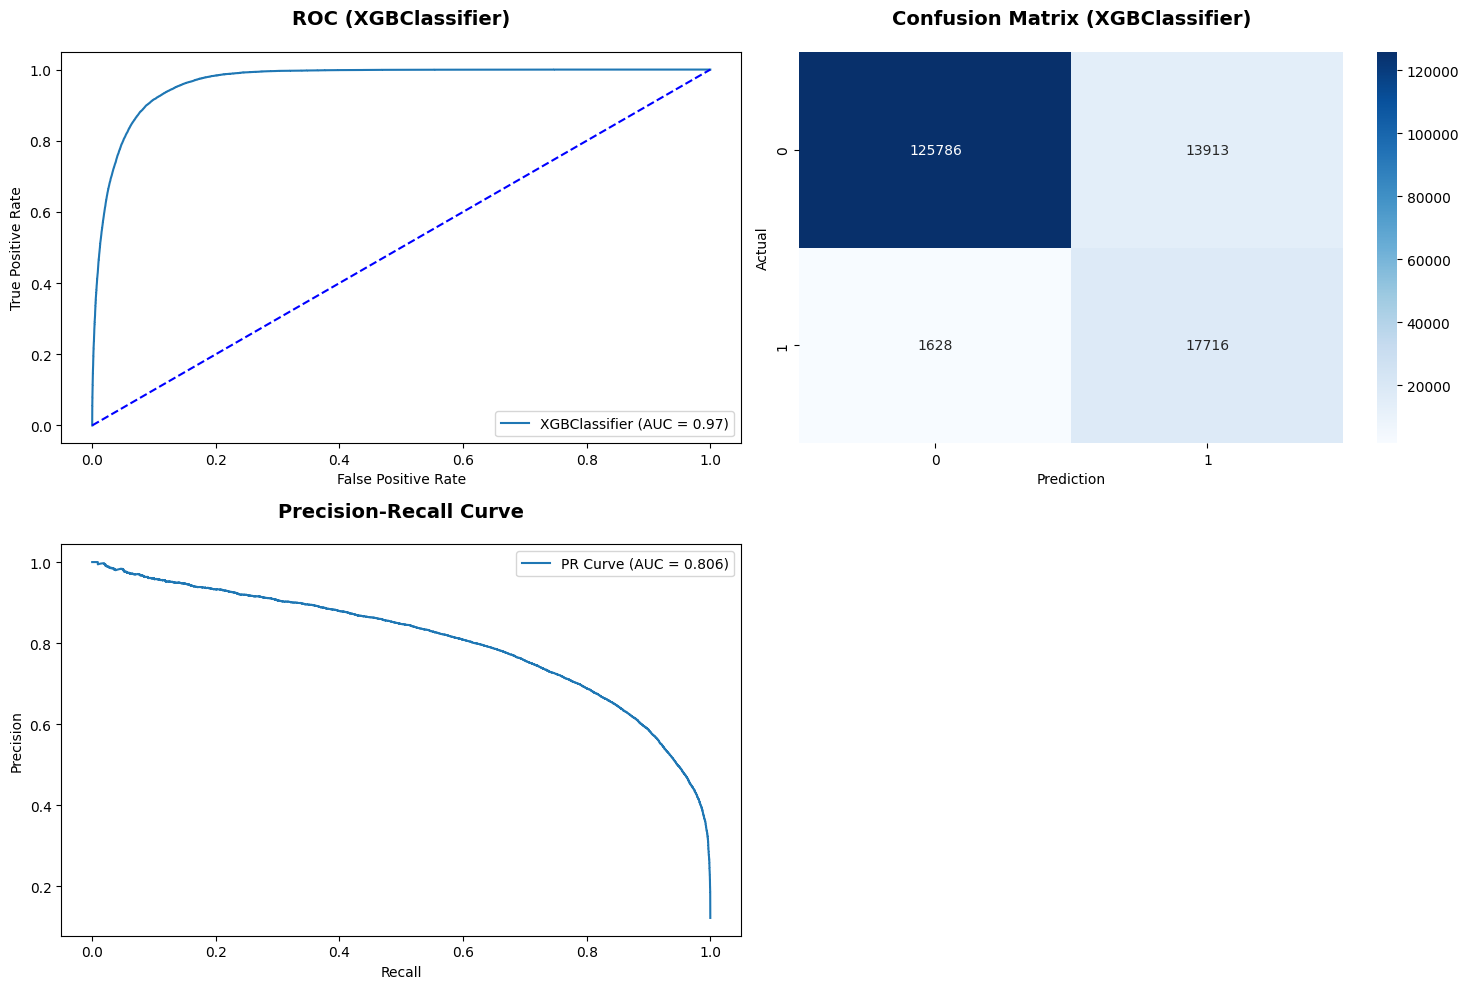

              precision    recall  f1-score   support

           0       0.99      0.90      0.94    139699
           1       0.56      0.92      0.70     19344

    accuracy                           0.90    159043
   macro avg       0.77      0.91      0.82    159043
weighted avg       0.94      0.90      0.91    159043



In [77]:
rocScore_xgb = evaluate_model(model = model_xgb, X_train=df_train_new_prepared, X_val=X_val_prepared,
                               y_train=df_train_label_new, y_val=y_val, figsize=(15, 10))

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Prepare Final Submission File</span>

<div style="
    border-radius: 15px;
    border: 2px solid #2e7d32;
    padding: 20px;
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);
        font-weight: bold;
        margin-bottom: 10px;
        font-size: 36px;
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Prepare Final Submission File
    </h1>
</div>

In [78]:
from sklearn.ensemble import VotingClassifier
voting_clf_soft = VotingClassifier(
    estimators=[
        ("catboost", model_cb),
        ("lgbm1", model_lgbm),
        ("lgbm2", model_lgbm2),
        ("xgb", model_xgb)
    ],
    voting="soft",
    weights=[rocScore_cat, rocScore_lgbm, rocScore_lgbm2, rocScore_xgb],
    n_jobs=-1
)

In [79]:
df_test_prepared = preprocessor.transform(processed_test_df)

Evaluating VotingClassifier...


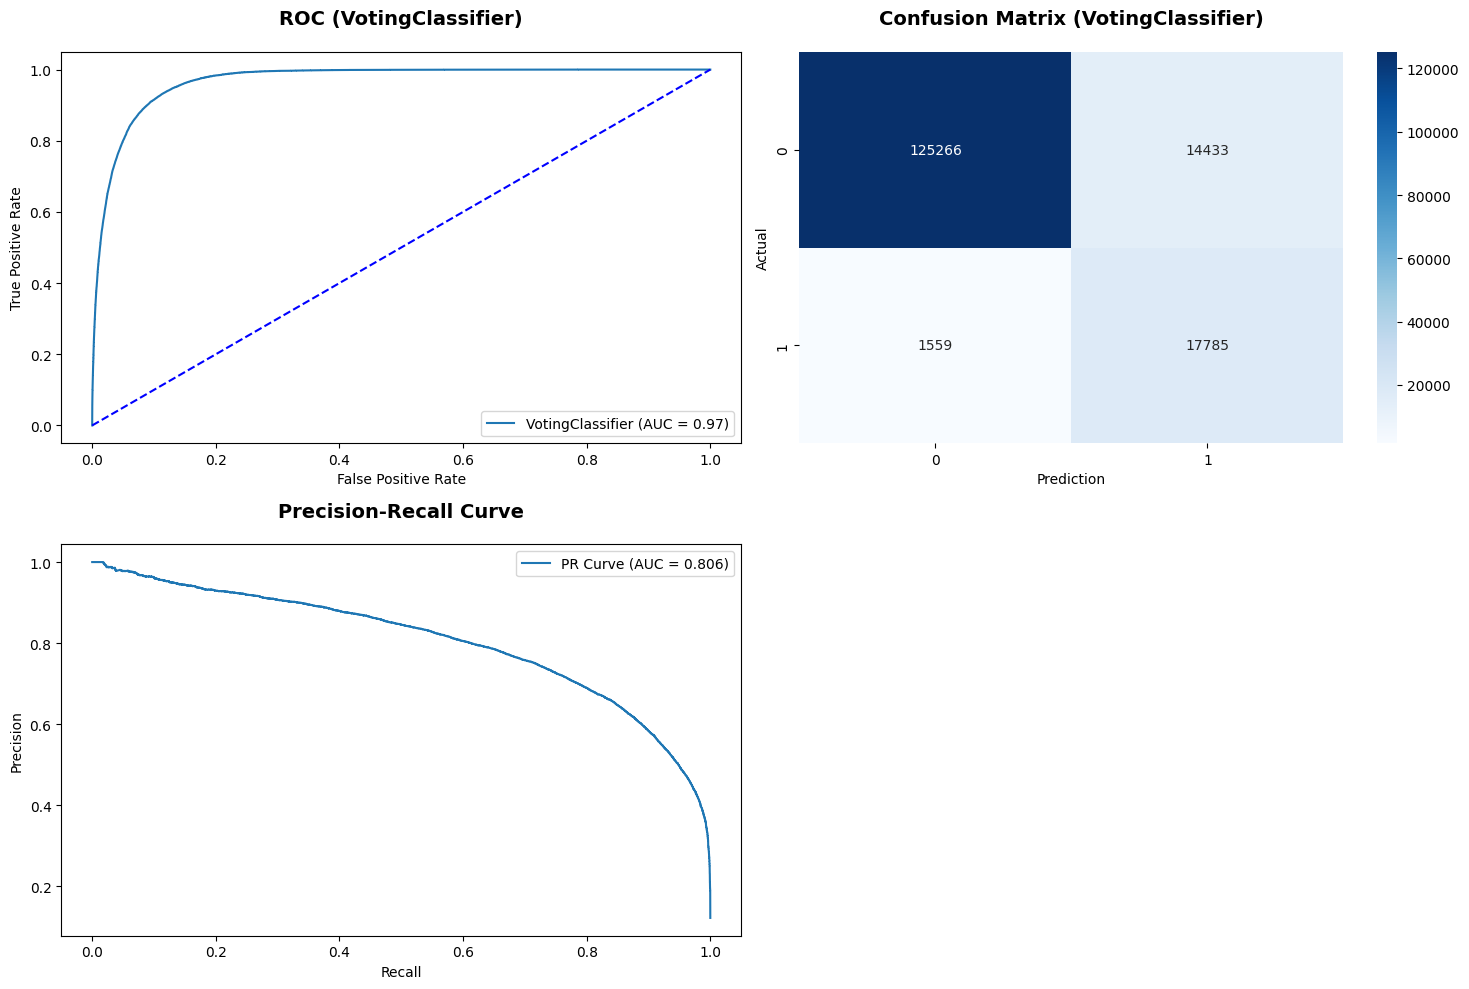

              precision    recall  f1-score   support

           0       0.99      0.90      0.94    139699
           1       0.55      0.92      0.69     19344

    accuracy                           0.90    159043
   macro avg       0.77      0.91      0.81    159043
weighted avg       0.93      0.90      0.91    159043



In [80]:
rocScore_vc = evaluate_model(model = voting_clf_soft, X_train=df_train_new_prepared, X_val=X_val_prepared,
               y_train=df_train_label_new, y_val=y_val, figsize=(15, 10))

In [81]:
# Generate predicted probabilities for the test set
y_pred_test_prob_cat = np.round(voting_clf_soft.predict_proba(df_test_prepared), decimals = 2)
subscription = y_pred_test_prob_cat[:, 1]

In [82]:
# Prepare submission file
submission = pd.DataFrame({
    "id": list_test_id,
    "y": subscription
})

submission.to_csv("submission.csv", index=False)
print("\nSubmission file saved!")
submission.head()


Submission file saved!


id     y
0  750000  0.03
1  750001  0.55
2  750002  0.00
3  750003  0.00
4  750004  0.16

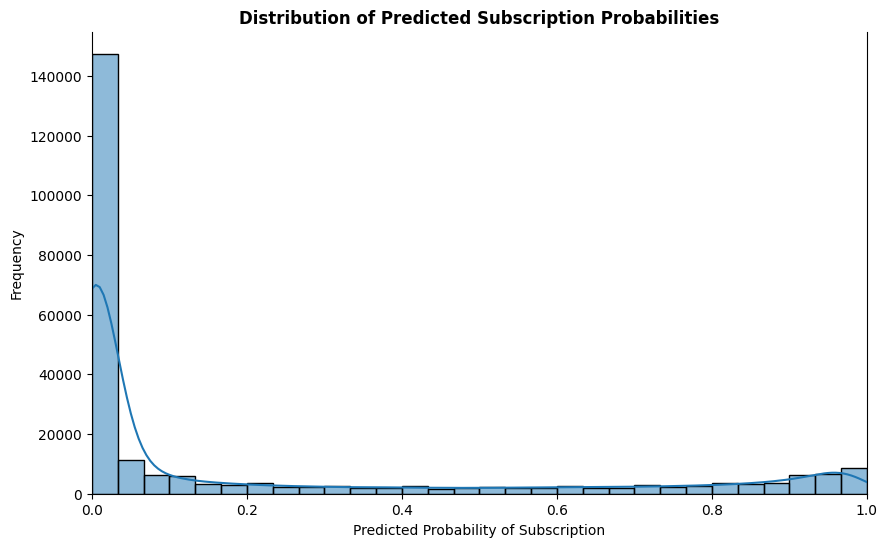

In [83]:
# Plot distribution of predicted probabilities
plt.figure(figsize=(10, 6))
sns.histplot(subscription, bins=30, kde=True)
plt.title("Distribution of Predicted Subscription Probabilities", weight="bold")
plt.xlabel("Predicted Probability of Subscription")
sns.despine(left=False, bottom=False, right=False)
plt.ylabel("Frequency")
plt.xlim(0, 1)  # Limit x-axis to [0, 1]
plt.show()

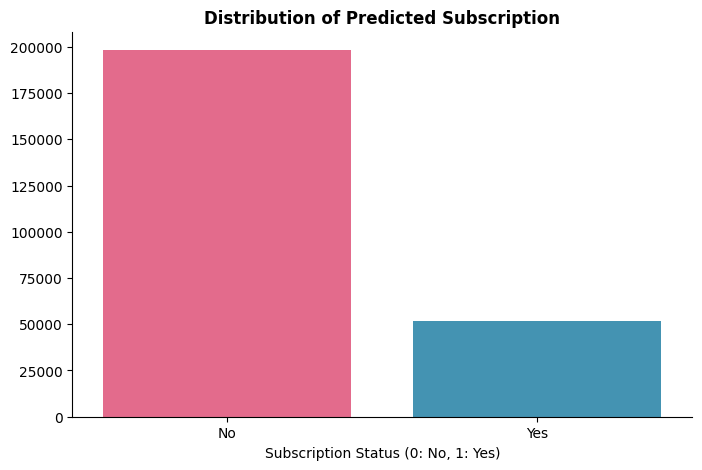

In [84]:
# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
binary_predictions = (subscription > 0.5).astype(int)

# Plot distribution of binary predictions
plt.figure(figsize=(8, 5))
sns.countplot(x=binary_predictions.flatten(), palette= color(n_colors=2))
plt.title("Distribution of Predicted Subscription", weight="bold")
plt.xlabel("Subscription Status (0: No, 1: Yes)")
plt.ylabel("")
sns.despine(left=False, bottom=False)
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.show()

PermutationExplainer explainer: 101it [16:11,  9.71s/it]                         


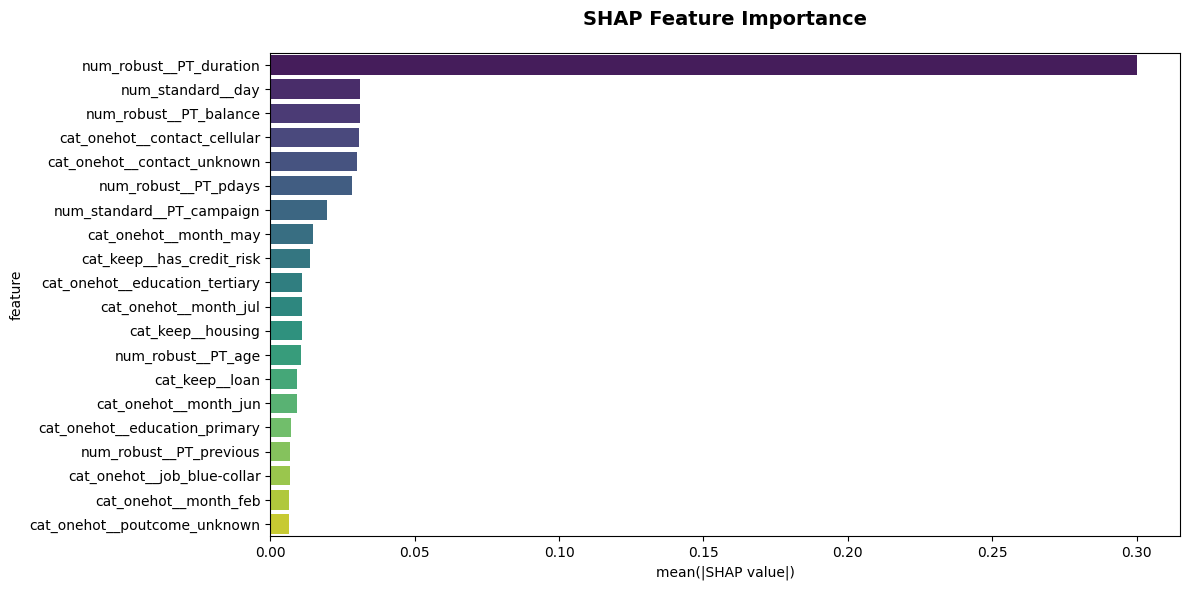

In [85]:
shap_plot(model=voting_clf_soft, X_test=df_test_prepared[:100], list_feature=list_feature_prepared, type="bar")

1. **Most important feature**

* **`num_robust__PT_duration`** (duration of the last call in the campaign) has a **dominant importance** (\~0.29 mean|SHAP| value), far ahead of all other features.
* This indicates that **call duration** is the strongest factor determining whether a customer subscribes to the bank’s product. Typically, customers who engage in longer conversations with telesales staff tend to be more interested and easier to close.

2. **Next most important feature group**

* **`num_robust__PT_pdays`** (number of days since the last contact)
* **`num_robust__PT_balance`** (average account balance or balance before the campaign)
* **`cat_onehot__contact_cellular`** and **`cat_onehot__contact_unknown`** (contact channel)
* These features have relatively similar importance to each other but are much smaller compared to `duration`, suggesting that **contact timing and channel** also affect success rates.

3. **Additional factors with weaker influence**

* **`num_standard__day`** (day of the month the call was made)
* **`num_standard__PT_campaign`** (number of contacts in the current campaign)
* Month-related features (`cat_onehot__month_may`, `cat_onehot__month_jul`, `cat_onehot__month_jun`)
* Demographic and financial features: `cat_keep__has_credit_risk`, `cat_keep__housing`, `cat_keep__loan`, `num_robust__PT_age`, `cat_onehot__education_tertiary`, `cat_onehot__job_blue-collar`, etc.
  → These still have an impact but are much less significant compared to the top group.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Recommendation</span>

<div style="
    border-radius: 15px;
    border: 2px solid #2e7d32;
    padding: 20px;
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);
        font-weight: bold;
        margin-bottom: 10px;
        font-size: 36px;
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Recommendation
    </h1>
</div>

**Business implications**

* **Focus on call quality optimization**: Since `duration` dominates, it’s worth exploring the relationship between call length and subscription rate (possibly nonlinear).
* **Recontact strategy**: `pdays` and `campaign` show that contact history and frequency matter — optimizing the timing and number of calls could improve efficiency.
* **Prioritize effective contact channels**: `contact_cellular` indicates that mobile calls tend to be more effective than certain other channels.
* **Customer segmentation by time**: Month and day-of-month features show a time effect — seasonal patterns could be leveraged.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px;
    border: 2px solid #2e7d32;
    padding: 20px;
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🙏 Thanks for Reading! 🚀
    </h1>
    <p style="color: #ffffff; font-size: 18px; text-align: center;">
        Happy Coding! 🙌😊
    </p>
</div>
